In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

We retrieved functional domain annotation. E-value column denotes a confidence score, similar to BLAST E-scores. E-values are dependent on the size of the database, hence the in-house developed bit score is used, which is not dependent on database size. Entries are grouped together in clans. 

In [3]:
pfam = pd.read_csv("9606.tsv", sep="\t")
print(pfam.shape[0])
pfam.rename({"seq id": "ACC_ID"}, axis=1, inplace=True)
pfam.head(10)

113100


ACC_ID  allignment start  allignment end  envelope start  envelope end  \
0  A0A024QZ33                 5             123               4           123   
1  A0A024QZ33               239             416             238           416   
2  A0A024QZ42                25              83              22            86   
3  A0A024QZP7                 4             287               4           287   
4  A0A024QZW4                48             339              48           339   
5  A0A024QZX5                11             380              10           380   
6  A0A024R0K5                40             140              38           141   
7  A0A024R0K5               240             318             239           318   
8  A0A024R0K5               418             496             417           496   
9  A0A024R0K5               596             674             595           674   

   hmm acc   hmm name         type  hmm start  hmm end  hmm length  bit score  \
0  PF09745    NSRP1_N  Coiled-coil          2      121         121      124.8   
1  PF20427     NRP1_C       Domain          2      178         178      249.7   
2  PF13499  EF-hand_7       Domain          4       68          71       42.2   
3  PF00069    Pkinase       Domain          1      264         264      257.7   
4  PF08449        UAA       Family          1      307         307      315.4   
5  PF00079     Serpin       Domain          2      370         370      434.6   
6  PF07686      V-set       Domain          3      108         109       49.8   
7  PF13895       Ig_2       Domain          2       79          79       65.2   
8  PF13895       Ig_2       Domain          2       79          79       61.4   
9  PF13895       Ig_2       Domain          2       79          79       41.9   

    E-value     clan  
0   6.1e-33  No_clan  
1   4.9e-71  No_clan  
2   2.8e-07   CL0220  
3   3.7e-73   CL0016  
4   1.2e-90   CL0184  
5  1.2e-126  No_clan  
6   1.1e-09   CL0011  
7   1.7e-14   CL0011  
8   2.6e-13   CL0011  
9   3.2e-07   CL0011

In [4]:
pfam_sub = pfam[["ACC_ID", "hmm start", "hmm end", "hmm name", "type", "clan", "E-value"]]
pfam_sub["E-value"] = pfam_sub["E-value"].str.replace("E", "e")
pfam_sub["E-value"] = pfam_sub["E-value"].str.replace(",", ".")
pfam_sub["E-value"] = pfam_sub["E-value"].astype("float")
pfam_sub.head()

C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/3889640521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfam_sub["E-value"] = pfam_sub["E-value"].str.replace("E", "e")
C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/3889640521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfam_sub["E-value"] = pfam_sub["E-value"].str.replace(",", ".")
C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/3889640521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

ACC_ID  hmm start  hmm end   hmm name         type     clan  \
0  A0A024QZ33          2      121    NSRP1_N  Coiled-coil  No_clan   
1  A0A024QZ33          2      178     NRP1_C       Domain  No_clan   
2  A0A024QZ42          4       68  EF-hand_7       Domain   CL0220   
3  A0A024QZP7          1      264    Pkinase       Domain   CL0016   
4  A0A024QZW4          1      307        UAA       Family   CL0184   

        E-value  
0  6.100000e-33  
1  4.900000e-71  
2  2.800000e-07  
3  3.700000e-73  
4  1.200000e-90

In [5]:
print(pfam_sub[pfam_sub["E-value"]<=1].shape[0])
pfam_sub[pfam_sub["E-value"]<=1].head()

106522


ACC_ID  hmm start  hmm end   hmm name         type     clan  \
0  A0A024QZ33          2      121    NSRP1_N  Coiled-coil  No_clan   
1  A0A024QZ33          2      178     NRP1_C       Domain  No_clan   
2  A0A024QZ42          4       68  EF-hand_7       Domain   CL0220   
3  A0A024QZP7          1      264    Pkinase       Domain   CL0016   
4  A0A024QZW4          1      307        UAA       Family   CL0184   

        E-value  
0  6.100000e-33  
1  4.900000e-71  
2  2.800000e-07  
3  3.700000e-73  
4  1.200000e-90

In [6]:
pfam_sub["ACC_ID"].nunique()

55331

In [7]:
data_site= pd.read_csv("site_data", sep="\t")
print(data_site.shape[0])
data_site.drop(["Total"], axis=1, inplace=True)
data_site.head()

23903


ACC_ID  UP_POS           tissue modres  Adipose tissue  B-cells  Blood  \
0  A0A075B6H7      30             Lung      T               0        0      0   
1  A0A075B6S5      52  Menstrual fluid      S               0        0      0   
2  A0A087WXM9     223           Testis      S               0        0      0   
3  A0A0B4J2D5     124             PBMC      S               0        0      0   
4  A0A0B4J2D5     145             PBMC      T               0        0      0   

   Bone  Brain  Breast  ...  Skin  Small intestine  Synovial tissue  T-cells  \
0     0      0       0  ...     0                0                0        0   
1     0      0       0  ...     0                0                0        0   
2     0      0       0  ...     0                0                0        0   
3     0      0       0  ...     0                0                0        0   
4     0      0       0  ...     0                0                0        0   

   Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  
0       0      0               0       0                0      0  
1       0      0               0       0                0      0  
2       1      0               0       0                0      0  
3       0      0               0       0                0      0  
4       0      0               0       0                0      0  

[5 rows x 45 columns]

In [8]:
tspec_proteins1 = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
tspec_proteins = pd.merge(tspec_proteins1["ACC_ID"], data_site, how="left")
print(tspec_proteins["ACC_ID"].nunique())
tspec_proteins.head()

2029


ACC_ID  UP_POS           tissue modres  Adipose tissue  B-cells  Blood  \
0  A0A075B6H7      30             Lung      T               0        0      0   
1  A0A075B6S5      52  Menstrual fluid      S               0        0      0   
2  A0A087WXM9     223           Testis      S               0        0      0   
3  A0A0B4J2D5     124             PBMC      S               0        0      0   
4  A0A0B4J2D5     145             PBMC      T               0        0      0   

   Bone  Brain  Breast  ...  Skin  Small intestine  Synovial tissue  T-cells  \
0     0      0       0  ...     0                0                0        0   
1     0      0       0  ...     0                0                0        0   
2     0      0       0  ...     0                0                0        0   
3     0      0       0  ...     0                0                0        0   
4     0      0       0  ...     0                0                0        0   

   Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  
0       0      0               0       0                0      0  
1       0      0               0       0                0      0  
2       1      0               0       0                0      0  
3       0      0               0       0                0      0  
4       0      0               0       0                0      0  

[5 rows x 45 columns]

In [9]:
taspec_proteins1 = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
taspec_proteins = pd.merge(taspec_proteins1["ACC_ID"], data_site, how="left")
print(taspec_proteins["ACC_ID"].nunique())
taspec_proteins.head()

2074


ACC_ID  UP_POS                                             tissue  \
0  A0A0C4DH36     108                                   Lung,Blood,Blood   
1      A0AVK6      68                                  Colon,Colon,Colon   
2      A0AVK6      71                Blood,Colon,Colon,Colon,Colon,Colon   
3      A0AVK6     102          Blood,Blood,Colon,Colon,Colon,Colon,Colon   
4      A0JLT2     192  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

  modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Skin  \
0      T               0        0      1     0      0       0  ...     0   
1      S               0        0      0     0      0       0  ...     0   
2      S               0        0      1     0      0       0  ...     0   
3      S               0        0      1     0      0       0  ...     0   
4      T               0        0      0     0      0       0  ...     0   

   Small intestine  Synovial tissue  T-cells  Testis  Tooth  Umbilical cord  \
0                0                0        0       0      0               0   
1                0                0        0       0      0               0   
2                0                0        0       0      0               0   
3                0                0        0       0      0               0   
4                0                0        0       0      0               0   

   Ureter  Urinary bladder  Urine  
0       0                0      0  
1       0                0      0  
2       0                0      0  
3       0                0      0  
4       0                0      0  

[5 rows x 45 columns]

In [10]:
gen_proteins1 = pd.read_csv("1.1 general P proteins", sep="\t")
gen_proteins = pd.merge(gen_proteins1["ACC_ID"], data_site, how="left")
print(gen_proteins["ACC_ID"].nunique())
gen_proteins.head()

1752


ACC_ID  UP_POS                                             tissue  \
0  A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1      A0FGR8     736  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
2      A0FGR8     737                                              Colon   
3      A0FGR8     738  Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...   
4      A0FGR8     739  Liver,Blood,Blood,Colon,Lymph node,Lymph node,...   

  modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Skin  \
0      S               0        0      1     0      1       0  ...     0   
1      S               0        0      0     0      0       0  ...     0   
2      S               0        0      0     0      0       0  ...     0   
3      S               0        0      1     0      0       0  ...     0   
4      S               0        0      1     0      0       0  ...     0   

   Small intestine  Synovial tissue  T-cells  Testis  Tooth  Umbilical cord  \
0                0                0        0       0      0               0   
1                0                0        0       0      0               0   
2                0                0        0       0      0               0   
3                0                0        0       1      0               0   
4                0                0        0       0      0               0   

   Ureter  Urinary bladder  Urine  
0       0                0      0  
1       0                0      0  
2       0                0      0  
3       0                0      0  
4       0                0      0  

[5 rows x 45 columns]

Per category of proteins, we have added the P-sites identified on that protein. We will only consider Pfam annotation in which a P-site occurs. This is the case for only a minority of the proteins and sites.

In [11]:
tspec_proteins_pfam = pd.merge(tspec_proteins, pfam_sub, how="inner")
print(tspec_proteins.shape[0])
print(tspec_proteins["ACC_ID"].nunique())
tspec_proteins_pfam = tspec_proteins_pfam.loc[(tspec_proteins_pfam["UP_POS"]>=tspec_proteins_pfam["hmm start"])&
                                             (tspec_proteins_pfam["UP_POS"]<=tspec_proteins_pfam["hmm end"]),:]
tspec_proteins_pfam = tspec_proteins_pfam[tspec_proteins_pfam["E-value"]<=1]
print(tspec_proteins_pfam.shape[0])
print(tspec_proteins_pfam["ACC_ID"].nunique())
tspec_proteins_pfam.head()

2794
2029
1251
726


ACC_ID  UP_POS             tissue modres  Adipose tissue  B-cells  \
0  A0A075B6H7      30               Lung      T               0        0   
1  A0A075B6S5      52    Menstrual fluid      S               0        0   
2  A0A0B4J2D9      52  Blood,Blood,Blood      S               0        0   
4  A0A0C4DH24      75    Skeletal muscle      S               0        0   
5  A0A0C4DH67      50              Blood      S               0        0   

   Blood  Bone  Brain  Breast  ...  Umbilical cord  Ureter  Urinary bladder  \
0      0     0      0       0  ...               0       0                0   
1      0     0      0       0  ...               0       0                0   
2      1     0      0       0  ...               0       0                0   
4      0     0      0       0  ...               0       0                0   
5      1     0      0       0  ...               0       0                0   

   Urine  hmm start  hmm end  hmm name    type    clan       E-value  
0      0          1       91     V-set  Domain  CL0011  1.100000e-13  
1      0          1       92     V-set  Domain  CL0011  2.200000e-13  
2      0          1       92     V-set  Domain  CL0011  7.100000e-13  
4      0          2       91     V-set  Domain  CL0011  1.200000e-11  
5      0          1       91     V-set  Domain  CL0011  1.100000e-11  

[5 rows x 51 columns]

We have also retrieved annotation from QuickGO, which allows us to easily add what the GO identifier means. QuickGO has annotation for 18 779 proteins. We summarise this information on the protein level, meaning that for a certain protein, all GO terms are present on oneline.

In [12]:
taspec_proteins_pfam = pd.merge(taspec_proteins, pfam_sub, how="inner")
print(taspec_proteins.shape[0])
print(taspec_proteins["ACC_ID"].nunique())
taspec_proteins_pfam = taspec_proteins_pfam.loc[(taspec_proteins_pfam["UP_POS"]>=taspec_proteins_pfam["hmm start"])&
                                             (taspec_proteins_pfam["UP_POS"]<=taspec_proteins_pfam["hmm end"]),:]
taspec_proteins_pfam = taspec_proteins_pfam[taspec_proteins_pfam["E-value"]<=1]
print(taspec_proteins_pfam.shape[0])
print(taspec_proteins_pfam["ACC_ID"].nunique())
taspec_proteins_pfam.head()

7371
2074
2636
910


ACC_ID  UP_POS                                             tissue modres  \
11  A0M8Q6      10                                     Lung,Lung,Lung      T   
12  A0M8Q6      31  Nasal polyps, Palatine tonsils, Parotid gland,...      S   
17  A1KXE4     185                                              Colon      T   
19  A1L170      18                                         Lymph node      S   
20  A1L170     222                                  Colon,Colon,Colon      S   

    Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Umbilical cord  \
11               0        0      0     0      0       0  ...               0   
12               0        0      0     0      0       0  ...               0   
17               0        0      0     0      0       0  ...               0   
19               0        0      0     0      0       0  ...               0   
20               0        0      0     0      0       0  ...               0   

    Ureter  Urinary bladder  Urine  hmm start  hmm end  hmm name    type  \
11       0                0      0          1       85    C1-set  Domain   
12       0                0      0          1       85    C1-set  Domain   
17       0                0      0        100      243     TCRP1  Family   
19       0                0      0          1      273   DUF4628  Family   
20       0                0      0          1      273   DUF4628  Family   

       clan        E-value  
11   CL0011   2.100000e-27  
12   CL0011   2.100000e-27  
17  No_clan   3.100000e-81  
19  No_clan  1.900000e-120  
20  No_clan  1.900000e-120  

[5 rows x 51 columns]

In [13]:
gen_proteins_pfam = pd.merge(gen_proteins, pfam_sub, how="inner")
print(gen_proteins.shape[0])
print(gen_proteins["ACC_ID"].nunique())
gen_proteins_pfam = gen_proteins_pfam.loc[(gen_proteins_pfam["UP_POS"]>=gen_proteins_pfam["hmm start"])&
                                             (gen_proteins_pfam["UP_POS"]<=gen_proteins_pfam["hmm end"]),:]
gen_proteins_pfam = gen_proteins_pfam[gen_proteins_pfam["E-value"]<=1]
print(gen_proteins_pfam.shape[0])
print(gen_proteins_pfam["ACC_ID"].nunique())
gen_proteins_pfam.head()

13738
1752
5542
938


ACC_ID  UP_POS                                             tissue  \
0   A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
74      A5PKW4      68  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
75      A5PKW4      68  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
76      A5PKW4      86  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
77      A5PKW4      86  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   

   modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0       S               0        0      1     0      1       0  ...   
74      T               0        0      1     0      1       0  ...   
75      T               0        0      1     0      1       0  ...   
76      S               0        0      1     0      1       0  ...   
77      S               0        0      1     0      1       0  ...   

    Umbilical cord  Ureter  Urinary bladder  Urine  hmm start  hmm end  \
0                0       0                0      0          9       91   
74               0       0                0      0         32      182   
75               0       0                0      0          1      101   
76               0       0                0      0         32      182   
77               0       0                0      0          1      101   

    hmm name    type     clan       E-value  
0      V-set  Domain   CL0011  7.200000e-07  
74      Sec7  Domain  No_clan  1.800000e-38  
75        PH  Domain   CL0266  2.600000e-08  
76      Sec7  Domain  No_clan  1.800000e-38  
77        PH  Domain   CL0266  2.600000e-08  

[5 rows x 51 columns]

# 1. Domains associated with the three different kind of proteins

We'll now have a look at the different types of functional domains associated with the three different kinds of proteins, by merely investigating the most frequently identified domains.

In [14]:
tspec_proteins_pfam["hmm name"].value_counts()

Pkinase          24
Filament         23
zf-C2H2          19
Crystall         19
V-set            17
                 ..
Ribophorin_II     1
Na_K-ATPase       1
Integrin_beta     1
DUF1180           1
zf_C2H2_ZHX       1
Name: hmm name, Length: 625, dtype: int64

In [15]:
taspec_proteins_pfam["hmm name"].value_counts()

Pkinase            91
Histone            45
Trypsin            31
DEAD               30
Serpin             29
                   ..
BACK                1
PI3K_P85_iSH2       1
BTB                 1
M-inducer_phosp     1
DZF                 1
Name: hmm name, Length: 836, dtype: int64

In [16]:
gen_proteins_pfam["hmm name"].value_counts()

Filament         233
Actin            204
Pkinase          183
Filamin          170
Plectin          104
                ... 
ATP-synt_ab_C      1
HSR                1
DUF3677            1
SAND               1
V-set              1
Name: hmm name, Length: 790, dtype: int64

In [17]:
tspec_proteins_pfam["type"].value_counts()

Domain         700
Family         449
Repeat          55
Coiled-coil     43
Disordered       4
Name: type, dtype: int64

In [18]:
taspec_proteins_pfam["type"].value_counts()

Domain         1441
Family          953
Repeat          115
Coiled-coil      70
Disordered       53
Motif             4
Name: type, dtype: int64

In [19]:
gen_proteins_pfam["type"].value_counts()

Domain         3062
Family         1761
Repeat          364
Coiled-coil     332
Disordered       18
Motif             5
Name: type, dtype: int64

The following clans can be distinguished (with their name and, if applicable, some explanation):
- CL0016: PKinase, proteins kinase superfamily
- CL0023: P-loop_NTPase, protein NTP hydrolase superfamily
- CL0011: Immunoglobulin superfamily
- CL0063: NADP_Rossmann, FAD/NAD(P) binding Rossmann superfamily

In [20]:
tspec_proteins_pfam["clan"].value_counts()

No_clan    423
CL0023      54
CL0011      36
CL0016      32
CL0020      30
          ... 
CL0330       1
CL0527       1
CL0129       1
CL0321       1
CL0423       1
Name: clan, Length: 179, dtype: int64

The following clans can be distinguished (with their name and, if applicable, some explanation):
- CL0023: P-loop_NTPase, protein NTP hydrolase superfamily
- CL0016: PKinase, proteins kinase superfamily
- CL0012: histone superfamily
- CL0011: Immunoglobulin superfamily

In [21]:
taspec_proteins_pfam["clan"].value_counts()

No_clan    1055
CL0023      165
CL0016      127
CL0266       56
CL0123       55
           ... 
CL0556        1
CL0396        1
CL0018        1
CL0625        1
CL0268        1
Name: clan, Length: 199, dtype: int64

The following clans can be distinguished (with their name and, if applicable, some explanation):
- CL0108: Actin_ATPase, Actin-like ATPase superfamily
- CL0023: P-loop_NTPase, protein NTP hydrolase superfamily
- CL0159: E-set, Ig-like fold superfamily (E-set)
- CL0016: PKinase, proteins kinase superfamily

In [22]:
gen_proteins_pfam["clan"].value_counts()

No_clan    2020
CL0108      273
CL0159      270
CL0023      250
CL0016      200
           ... 
CL0679        1
CL0649        1
CL0245        1
CL0487        1
CL0073        1
Name: clan, Length: 196, dtype: int64

In [23]:
tspec_proteins_pfam[tspec_proteins_pfam["clan"]=="No_clan"]["ACC_ID"].nunique()

300

In [24]:
taspec_proteins_pfam[taspec_proteins_pfam["clan"]=="No_clan"]["ACC_ID"].nunique()

403

In [25]:
gen_proteins_pfam[gen_proteins_pfam["clan"]=="No_clan"]["ACC_ID"].nunique()

402

# 2. Spread of domain annotation across tissues

We aim to investigate whether certain tissues are more associated with Pfam annotations than others. As the overal representation level of tissues can differ, some differences on proteins for which a P-site has been identified in a Pfam annotation are to be expected. We see that generaly, the trend of the overal representation level is followed.

In [26]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = tspec_proteins_pfam.loc[tspec_proteins_pfam[tissue]==1, :]["ACC_ID"].nunique()
    count_taspec = taspec_proteins_pfam.loc[taspec_proteins_pfam[tissue]==1, :]["ACC_ID"].nunique()
    count_gen = gen_proteins_pfam.loc[gen_proteins_pfam[tissue]==1, :]["ACC_ID"].nunique()
    count_total = count_tspec + count_taspec + count_gen
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues["Number of tissue-specific phosphorylated proteins"] = list_tspec
df_spread_tissues["Number of tissue aspecific phosphorylated proteins"] = list_taspec
df_spread_tissues["Number of pervasively phosphorylated proteins"] = list_gen
df_spread_tissues["Total"] = list_total
df_spread_tissues

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphorylated proteins  \
0                                                   0   
1                                                   1   
2                                                  80   
3                                                   1   
4                                                   8   
5                                                   3   
6                                                   0   
7                                                   1   
8                                                 174   
9                                                   3   
10                                                  0   
11                                                  0   
12                                                  0   
13                                                  2   
14                                                  0   
15                                                  0   
16                                                 21   
17                                                 80   
18                                                100   
19                                                  1   
20                                                  3   
21                                                  0   
22                                                  3   
23                                                  0   
24                                                  4   
25                                                  0   
26                                                  0   
27                                                 56   
28                                                  0   
29                                                 65   
30                                                 15   
31                                                 53   
32                                                 12   
33                                                  0   
34                                                  0   
35                                                 21   
36                                                  0   
37                                                  7   
38                                                  1   
39                                                  4   
40                                                  7   

    Number of tissue aspecific phosphorylated proteins  \
0                                                  18    
1                                                  10    
2                                                 306    
3        

<AxesSubplot:title={'center':'Number of proteins in each of the three categories having phosphosites in a functional domain'}, xlabel='Tissue'>

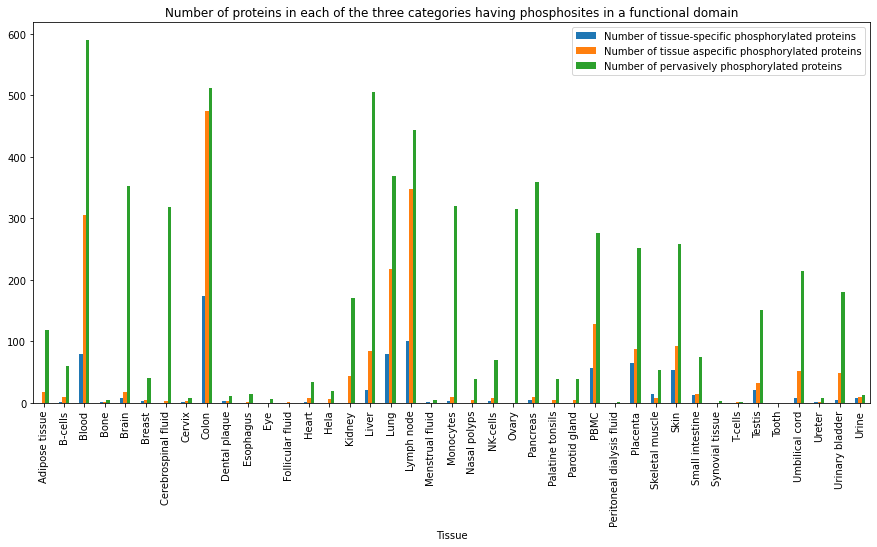

In [27]:
df_spread_tissues[["Tissue", "Number of tissue-specific phosphorylated proteins", "Number of tissue aspecific phosphorylated proteins", "Number of pervasively phosphorylated proteins"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of proteins in each of the three categories having phosphosites in a functional domain")
#plt.savefig("Pfam_Number of proteins having a phosphosite in a functional domain.png", format="png", bbox_inches="tight")

<AxesSubplot:title={'center':'Ratio of proteins in each of the three cateogires compared to total number of protein having phosphosites in fucntional domains'}, xlabel='Tissue'>

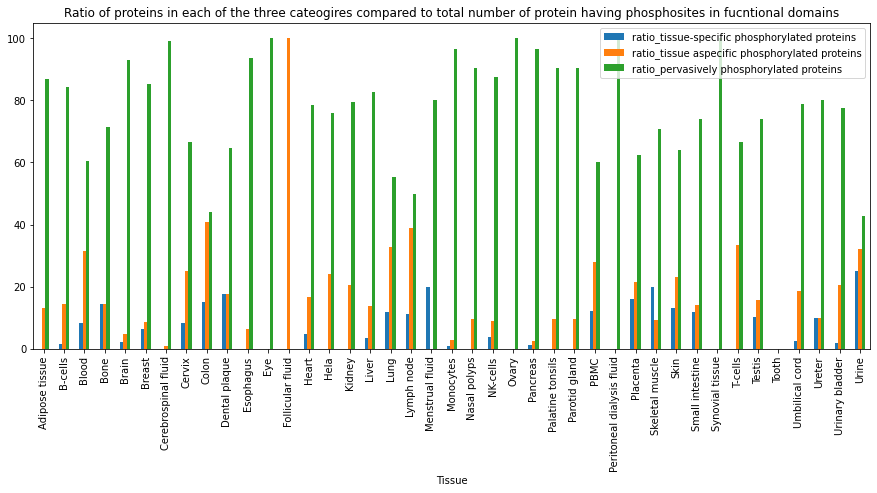

In [28]:
df_spread_tissues["ratio_tissue-specific phosphorylated proteins"] = df_spread_tissues["Number of tissue-specific phosphorylated proteins"]*100/df_spread_tissues["Total"]
df_spread_tissues["ratio_tissue aspecific phosphorylated proteins"] = df_spread_tissues["Number of tissue aspecific phosphorylated proteins"]*100/df_spread_tissues["Total"]
df_spread_tissues["ratio_pervasively phosphorylated proteins"] = df_spread_tissues["Number of pervasively phosphorylated proteins"]*100/df_spread_tissues["Total"]
df_spread_tissues[["Tissue", "ratio_tissue-specific phosphorylated proteins", "ratio_tissue aspecific phosphorylated proteins", "ratio_pervasively phosphorylated proteins"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Ratio of proteins in each of the three cateogires compared to total number of protein having phosphosites in fucntional domains")

In [29]:
missing_tspec = pd.merge(tspec_proteins, tspec_proteins_pfam, how="left", indicator=True, suffixes=["","_y"])
missing_tspec = missing_tspec[missing_tspec["_merge"]=="left_only"]
missing_tspec.head()

ACC_ID  UP_POS    tissue modres  Adipose tissue  B-cells  Blood  Bone  \
2   A0A087WXM9     223    Testis      S               0        0      0     0   
3   A0A0B4J2D5     124      PBMC      S               0        0      0     0   
4   A0A0B4J2D5     145      PBMC      T               0        0      0     0   
6   A0A0B4J2F2     435  Placenta      S               0        0      0     0   
13  A0A0U1RRK4      41    Testis      S               0        0      0     0   

    Brain  Breast  ...  Ureter  Urinary bladder  Urine  hmm start  hmm end  \
2       0       0  ...       0                0      0        NaN      NaN   
3       0       0  ...       0                0      0        NaN      NaN   
4       0       0  ...       0                0      0        NaN      NaN   
6       0       0  ...       0                0      0        NaN      NaN   
13      0       0  ...       0                0      0        NaN      NaN   

    hmm name  type  clan  E-value     _merge  
2        NaN   NaN   NaN      NaN  left_only  
3        NaN   NaN   NaN      NaN  left_only  
4        NaN   NaN   NaN      NaN  left_only  
6        NaN   NaN   NaN      NaN  left_only  
13       NaN   NaN   NaN      NaN  left_only  

[5 rows x 52 columns]

In [30]:
missing_taspec = pd.merge(taspec_proteins, taspec_proteins_pfam, how="left", indicator=True, suffixes=["","_y"])
missing_taspec = missing_taspec[missing_taspec["_merge"]=="left_only"]
missing_taspec.head()

ACC_ID  UP_POS                                             tissue  \
0  A0A0C4DH36     108                                   Lung,Blood,Blood   
1      A0AVK6      68                                  Colon,Colon,Colon   
2      A0AVK6      71                Blood,Colon,Colon,Colon,Colon,Colon   
3      A0AVK6     102          Blood,Blood,Colon,Colon,Colon,Colon,Colon   
4      A0JLT2     192  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

  modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Ureter  \
0      T               0        0      1     0      0       0  ...       0   
1      S               0        0      0     0      0       0  ...       0   
2      S               0        0      1     0      0       0  ...       0   
3      S               0        0      1     0      0       0  ...       0   
4      T               0        0      0     0      0       0  ...       0   

   Urinary bladder  Urine  hmm start  hmm end  hmm name  type  clan  E-value  \
0                0      0        NaN      NaN       NaN   NaN   NaN      NaN   
1                0      0        NaN      NaN       NaN   NaN   NaN      NaN   
2                0      0        NaN      NaN       NaN   NaN   NaN      NaN   
3                0      0        NaN      NaN       NaN   NaN   NaN      NaN   
4                0      0        NaN      NaN       NaN   NaN   NaN      NaN   

      _merge  
0  left_only  
1  left_only  
2  left_only  
3  left_only  
4  left_only  

[5 rows x 52 columns]

In [31]:
missing_gen = pd.merge(gen_proteins, gen_proteins_pfam, how="left", indicator=True, suffixes=["","_y"])
missing_gen = missing_gen[missing_gen["_merge"]=="left_only"]
missing_gen.head()

ACC_ID  UP_POS                                             tissue modres  \
1  A0FGR8     736  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S   
2  A0FGR8     737                                              Colon      S   
3  A0FGR8     738  Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...      S   
4  A0FGR8     739  Liver,Blood,Blood,Colon,Lymph node,Lymph node,...      S   
5  A0FGR8     743  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S   

   Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Ureter  \
1               0        0      0     0      0       0  ...       0   
2               0        0      0     0      0       0  ...       0   
3               0        0      1     0      0       0  ...       0   
4               0        0      1     0      0       0  ...       0   
5               0        0      0     0      0       0  ...       0   

   Urinary bladder  Urine  hmm start  hmm end  hmm name  type  clan  E-value  \
1                0      0        NaN      NaN       NaN   NaN   NaN      NaN   
2                0      0        NaN      NaN       NaN   NaN   NaN      NaN   
3                0      0        NaN      NaN       NaN   NaN   NaN      NaN   
4                0      0        NaN      NaN       NaN   NaN   NaN      NaN   
5                0      0        NaN      NaN       NaN   NaN   NaN      NaN   

      _merge  
1  left_only  
2  left_only  
3  left_only  
4  left_only  
5  left_only  

[5 rows x 52 columns]

In [32]:
data_protein = pd.read_csv("protein_data", sep="\t")
data_protein.head()

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0  A0A075B6H7               0        0      0     0      0       0   
1  A0A075B6S5               0        0      0     0      0       0   
2  A0A087WXM9               0        0      0     0      0       0   
3  A0A0B4J2D5               0        0      0     0      0       0   
4  A0A0B4J2D9               0        0      1     0      0       0   

   Cerebrospinal fluid  Cervix  Colon  ...  Small intestine  Synovial tissue  \
0                    0       0      0  ...                0                0   
1                    0       0      0  ...                0                0   
2                    0       0      0  ...                0                0   
3                    0       0      0  ...                0                0   
4                    0       0      0  ...                0                0   

   T-cells  Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  \
0        0       0      0               0       0                0      0   
1        0       0      0               0       0                0      0   
2        0       1      0               0       0                0      0   
3        0       0      0               0       0                0      0   
4        0       0      0               0       0                0      0   

   Total  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 43 columns]

In [33]:
df_spread_tissues_missing = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = missing_tspec.loc[missing_tspec[tissue]==1, :]["ACC_ID"].nunique()
    count_taspec = missing_taspec.loc[missing_taspec[tissue]==1, :]["ACC_ID"].nunique()
    count_gen = missing_gen.loc[missing_gen[tissue]==1, :]["ACC_ID"].nunique()
    count_total = data_protein.loc[data_protein[tissue]==1, :]["ACC_ID"].nunique()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues_missing["Number of tissue-specific phosphorylated proteins"] = list_tspec
df_spread_tissues_missing["Number of tissue aspecific phosphorylated proteins"] = list_taspec
df_spread_tissues_missing["Number of pervasively phosphorylated proteins"] = list_gen
df_spread_tissues_missing["Total"] = list_total
df_spread_tissues_missing

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphorylated proteins  \
0                                                   0   
1                                                   3   
2                                                 167   
3                                                   0   
4                                                  11   
5                                                   0   
6                                                   1   
7                                                   3   
8                                                 481   
9                                                   3   
10                                                  0   
11                                                  1   
12                                                  0   
13                                                  1   
14                                                  0   
15                                                  3   
16                                                 20   
17                                                153   
18                                                248   
19                                                  0   
20                                                  6   
21                                                  0   
22                                                  2   
23                                                  1   
24                                                  7   
25                                                  0   
26                                                  0   
27                                                 47   
28                                                  0   
29                                                 69   
30                                                 21   
31                                                 42   
32                                                 12   
33                                                  2   
34                                                  0   
35                                                 47   
36                                                  0   
37                                                  5   
38                                                  0   
39                                                  2   
40                                                 15   

    Number of tissue aspecific phosphorylated proteins  \
0                                                  23    
1                                                  17    
2                                                 727    
3        

<AxesSubplot:title={'center':'Number of proteins in each of the three categories for which no phosphosites were identified in a functional domain'}, xlabel='Tissue'>

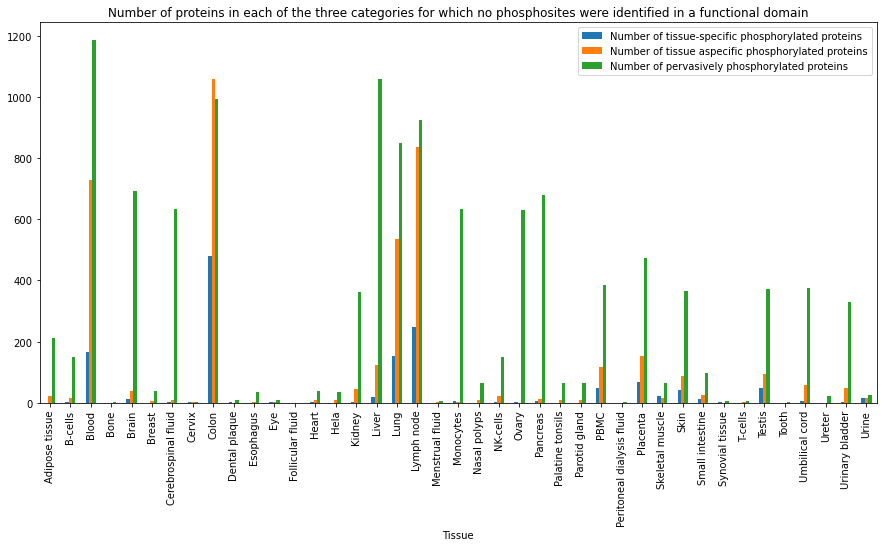

In [34]:
df_spread_tissues_missing[["Tissue", "Number of tissue-specific phosphorylated proteins", "Number of tissue aspecific phosphorylated proteins", "Number of pervasively phosphorylated proteins"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of proteins in each of the three categories for which no phosphosites were identified in a functional domain")

<AxesSubplot:xlabel='Tissue'>

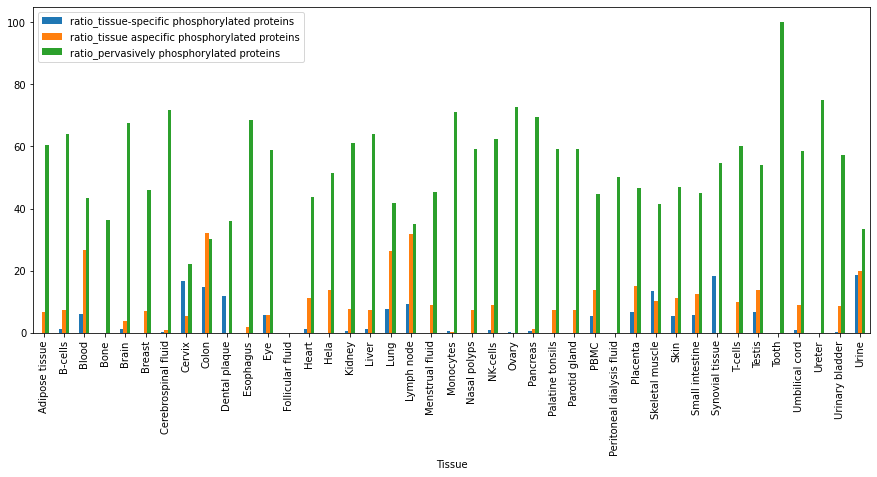

In [35]:
df_spread_tissues_missing["ratio_tissue-specific phosphorylated proteins"] = df_spread_tissues_missing["Number of tissue-specific phosphorylated proteins"]*100/df_spread_tissues_missing["Total"]
df_spread_tissues_missing["ratio_tissue aspecific phosphorylated proteins"] = df_spread_tissues_missing["Number of tissue aspecific phosphorylated proteins"]*100/df_spread_tissues_missing["Total"]
df_spread_tissues_missing["ratio_pervasively phosphorylated proteins"] = df_spread_tissues_missing["Number of pervasively phosphorylated proteins"]*100/df_spread_tissues_missing["Total"]
df_spread_tissues_missing[["Tissue", "ratio_tissue-specific phosphorylated proteins", "ratio_tissue aspecific phosphorylated proteins", "ratio_pervasively phosphorylated proteins"]].plot(kind="bar", x="Tissue", figsize=(15,6))

In [36]:
df_spread_tissues_missing

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphorylated proteins  \
0                                                   0   
1                                                   3   
2                                                 167   
3                                                   0   
4                                                  11   
5                                                   0   
6                                                   1   
7                                                   3   
8                                                 481   
9                                                   3   
10                                                  0   
11                                                  1   
12                                                  0   
13                                                  1   
14                                                  0   
15                                                  3   
16                                                 20   
17                                                153   
18                                                248   
19                                                  0   
20                                                  6   
21                                                  0   
22                                                  2   
23                                                  1   
24                                                  7   
25                                                  0   
26                                                  0   
27                                                 47   
28                                                  0   
29                                                 69   
30                                                 21   
31                                                 42   
32                                                 12   
33                                                  2   
34                                                  0   
35                                                 47   
36                                                  0   
37                                                  5   
38                                                  0   
39                                                  2   
40                                                 15   

    Number of tissue aspecific phosphorylated proteins  \
0                                                  23    
1                                                  17    
2                                                 727    
3        

We'll now calculate the ratio of annotated proteins compared to the number of proteins per category, per tissue. We've previously calulated for each tissue, how many proteins are associated with each of the three categories.

<AxesSubplot:title={'center':'ratio number of proteins with functional domain annotation/total amount of proteins in that category '}, xlabel='Tissue'>

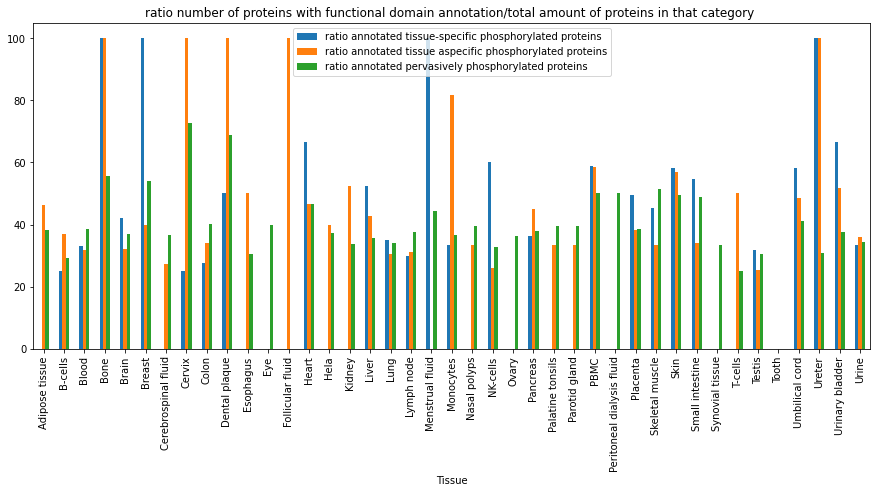

In [37]:
data_cat = pd.read_csv("number of three categories per tissue.tsv", sep="\t")
data_cat["ratio annotated tissue-specific phosphorylated proteins"] = df_spread_tissues["Number of tissue-specific phosphorylated proteins"]*100/data_cat["number of tissue-specific proteins"]
data_cat["ratio annotated tissue aspecific phosphorylated proteins"] = df_spread_tissues["Number of tissue aspecific phosphorylated proteins"]*100/data_cat["number of non tissue-specific proteins"]
data_cat["ratio annotated pervasively phosphorylated proteins"] = df_spread_tissues["Number of pervasively phosphorylated proteins"]*100/data_cat["number of generally expressed proteins"]
data_cat[["Tissue", "ratio annotated tissue-specific phosphorylated proteins", "ratio annotated tissue aspecific phosphorylated proteins", "ratio annotated pervasively phosphorylated proteins"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="ratio number of proteins with functional domain annotation/total amount of proteins in that category ")

In [38]:
print(data_cat["ratio annotated tissue-specific phosphorylated proteins"].describe())
print(data_cat["ratio annotated tissue aspecific phosphorylated proteins"].describe())
print(data_cat["ratio annotated pervasively phosphorylated proteins"].describe())

count     31.000000
mean      44.306586
std       29.563174
min        0.000000
25%       28.646775
50%       42.105263
75%       58.640351
max      100.000000
Name: ratio annotated tissue-specific phosphorylated proteins, dtype: float64
count     37.000000
mean      46.678214
std       25.687898
min        0.000000
25%       33.333333
50%       40.000000
75%       51.612903
max      100.000000
Name: ratio annotated tissue aspecific phosphorylated proteins, dtype: float64
count    40.000000
mean     39.851721
std      11.776619
min       0.000000
25%      34.232291
50%      38.106463
75%      44.953052
max      72.727273
Name: ratio annotated pervasively phosphorylated proteins, dtype: float64


# 3. Domain

We'll now take a closer look at the annotation types across the three categories of proteins. We'll follow this up by doing the same on the domain name level, followed by the clans. More non-tissue-specific phosphorylated proteins are associated with a domain, but the loss in the tissue-specific phosphorylated proteins was the worsed and the possible trend seems only minor.

<AxesSubplot:title={'center':'Number of proteins with a certain kind of domain'}, xlabel='Type'>

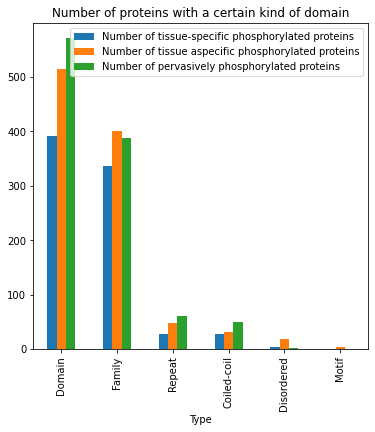

In [39]:
list_types = ["Domain", "Family", "Repeat", "Coiled-coil", "Disordered", "Motif"]
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    count_tspec = tspec_proteins_pfam.loc[tspec_proteins_pfam["type"]==element, :]["ACC_ID"].nunique()
    count_taspec = taspec_proteins_pfam.loc[taspec_proteins_pfam["type"]==element, :]["ACC_ID"].nunique()
    count_gen = gen_proteins_pfam.loc[gen_proteins_pfam["type"]==element, :]["ACC_ID"].nunique()
    list_counts_tspec.append(count_tspec)
    list_counts_taspec.append(count_taspec)
    list_counts_gen.append(count_gen)
df_types = pd.DataFrame({"Type": list_types, "Number of tissue-specific phosphorylated proteins": list_counts_tspec,
                        "Number of tissue aspecific phosphorylated proteins": list_counts_taspec,
                         "Number of pervasively phosphorylated proteins": list_counts_gen})
df_types.plot(kind="bar", x="Type", figsize=(6,6), title="Number of proteins with a certain kind of domain")

In [40]:
df_types_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    list_counts_tspec = []
    list_counts_taspec = []
    list_counts_gen = []
    for tissue in list_tissues_STY:
        count_tspec = tspec_proteins_pfam.loc[(tspec_proteins_pfam[tissue]==1)&(tspec_proteins_pfam["type"]==element), :]["ACC_ID"].nunique()
        count_taspec = taspec_proteins_pfam.loc[(taspec_proteins_pfam[tissue]==1)&(taspec_proteins_pfam["type"]==element), :]["ACC_ID"].nunique()
        count_gen = gen_proteins_pfam.loc[(gen_proteins_pfam[tissue]==1)&(gen_proteins_pfam["type"]==element), :]["ACC_ID"].nunique()
        list_counts_tspec.append(count_tspec)
        list_counts_taspec.append(count_taspec)
        list_counts_gen.append(count_gen)
    tspec_colname = element+"_tspec"
    taspec_colname = element+"_taspec"
    gen_colname = element+"_pervasive"
    df_types_tissue[tspec_colname] = list_counts_tspec
    df_types_tissue[taspec_colname] = list_counts_taspec
    df_types_tissue[gen_colname] = list_counts_gen
df_types_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0              Adipose tissue             0             13                77   
1                     B-cells             1              5                37   
2                       Blood            48            154               335   
3                        Bone             1              1                 3   
4                       Brain             5              7               193   
5                      Breast             3              4                23   
6         Cerebrospinal fluid             0              1               170   
7                      Cervix             0              0                 4   
8                       Colon            74            236               282   
9               Dental plaque             0              2                 3   
10                  Esophagus             0              1                 8   
11                        Eye             0              0                 2   
12           Follicular fluid             0              0                 0   
13                      Heart             1              6                21   
14                       Hela             0              5                11   
15                     Kidney             0             28               100   
16                      Liver            15             51               278   
17                       Lung            43            102               202   
18                 Lymph node            52            167               239   
19            Menstrual fluid             1              0                 4   
20                  Monocytes             2              8               169   
21               Nasal polyps             0              2                27   
22                   NK-cells             0              3                39   
23                      Ovary             0              0               164   
24                   Pancreas             4              6               196   
25           Palatine tonsils             0              2                27   
26              Parotid gland             0              2                27   
27                       PBMC            45             88               190   
28  Peritoneal dialysis fluid             0              0                 0   
29                   Placenta            35             54               140   
30            Skeletal muscle             8              5                29   
31                       Skin            26             65               166   
32            Small intestine             6              7                47   
33            Synovial tissue             0              0                 3   
34                    T-cells             0              1                 0   
35                     Testis             9             12                92   
36                      Tooth             0              0                 0   
37             Umbilical cord             4             29               140   
38                     Ureter             1              0                 6   
39            Urinary bladder             3             28               105   
40                      Urine             4              6                 8   

    Family_tspec  Family_taspec  Family_pervasive  Repeat_tspec  \
0              0              6                42             0   
1              1              4                22             0   
2             34            155               264             2   
3              0              0                 2             0   
4              3             10               153             0   
5              0              0                12             0   
6              0              2               145             0   
7              0              1                 4             0   
8             90            236               231          

We note that for the tissue-specific proteins in lung, there is a relatively high percentage of motifs. For skeletal muscel and skin in the same category, this is more the case for coiled-coils. Disordered regions are relateively highly represented in lymph node, for the tissue aspecific proteins. Coiled-coils and repeat regions seem more represented in the pervasively phosphoryalted proteins.

<AxesSubplot:title={'center':'Distribution of the type of domain across tissues for tissue-specific phosphorylated proteins'}, xlabel='Tissue'>

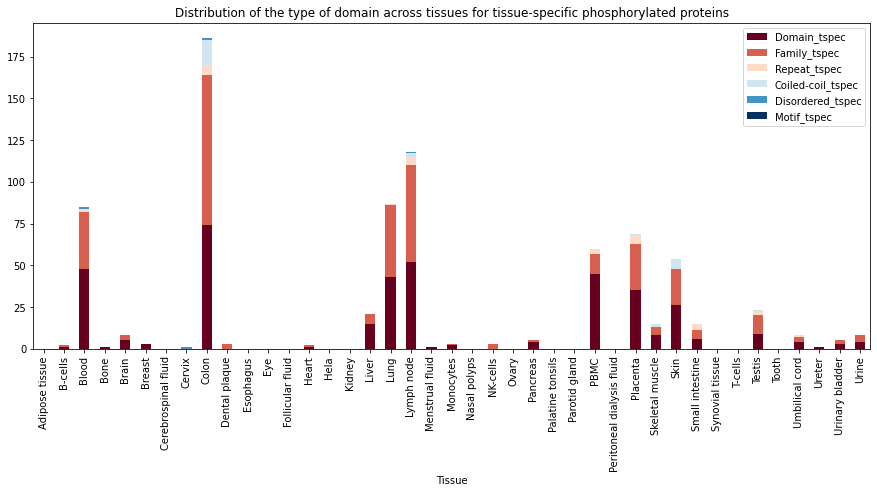

In [41]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("tspec"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu", title="Distribution of the type of domain across tissues for tissue-specific phosphorylated proteins")

<AxesSubplot:title={'center':'Distribution of the type of domain across tissues for tissue aspecific phosphorylated proteins'}, xlabel='Tissue'>

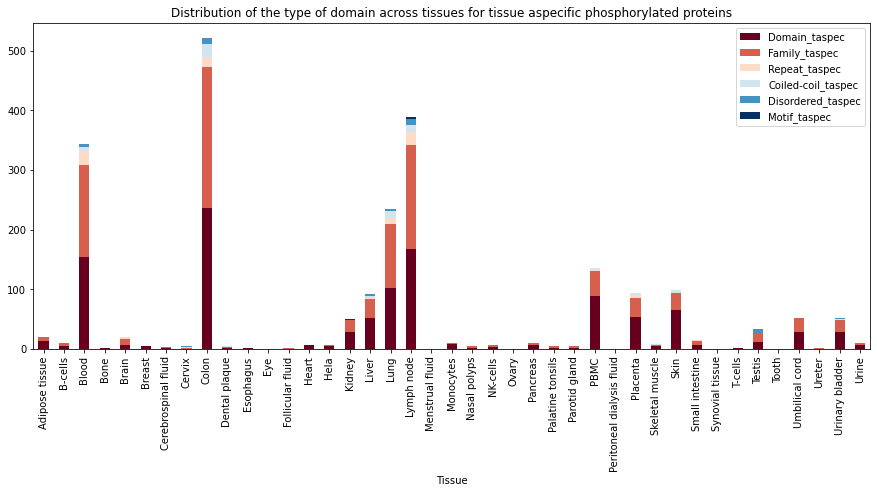

In [42]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("taspec"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu", title="Distribution of the type of domain across tissues for tissue aspecific phosphorylated proteins")

<AxesSubplot:title={'center':'Distribution of the type of domain across tissues for pervasively phosphorylated proteins'}, xlabel='Tissue'>

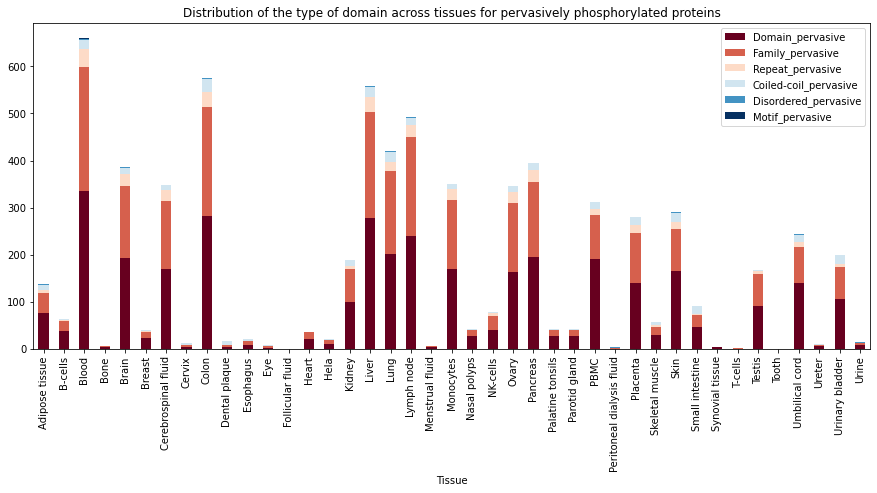

In [43]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("pervasive"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu", title="Distribution of the type of domain across tissues for pervasively phosphorylated proteins")

C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/1600454285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domain_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/1600454285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domain_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp

<AxesSubplot:title={'center':"Percentage proteins associated with 'Domain' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

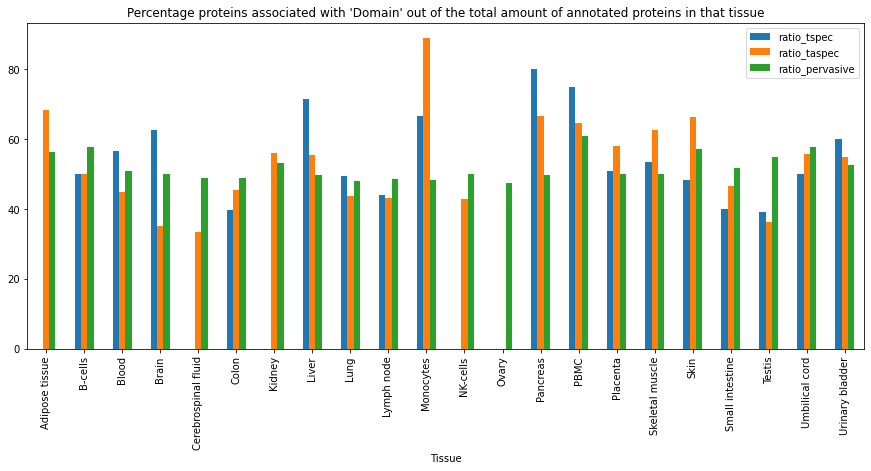

In [44]:
df_domain_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Domain")|df_types_tissue.columns.str.contains("Tissue"))]
df_domain_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_domain_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_domain_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_domain_tissue = df_domain_tissue[(df_domain_tissue["Total_tspec"]>=50)|(df_domain_tissue["Total_taspec"]>=50)|(df_domain_tissue["Total_pervasive"]>=50)]
df_domain_tissue["ratio_tspec"] = df_domain_tissue["Domain_tspec"]*100/df_domain_tissue["Total_tspec"]
df_domain_tissue["ratio_taspec"] = df_domain_tissue["Domain_taspec"]*100/df_domain_tissue["Total_taspec"]
df_domain_tissue["ratio_pervasive"] = df_domain_tissue["Domain_pervasive"]*100/df_domain_tissue["Total_pervasive"]

df_domain_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Domain' out of the total amount of annotated proteins in that tissue")

In [45]:
df_domain_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0        Adipose tissue             0             13                77   
1               B-cells             1              5                37   
2                 Blood            48            154               335   
4                 Brain             5              7               193   
6   Cerebrospinal fluid             0              1               170   
8                 Colon            74            236               282   
15               Kidney             0             28               100   
16                Liver            15             51               278   
17                 Lung            43            102               202   
18           Lymph node            52            167               239   
20            Monocytes             2              8               169   
22             NK-cells             0              3                39   
23                Ovary             0              0               164   
24             Pancreas             4              6               196   
27                 PBMC            45             88               190   
29             Placenta            35             54               140   
30      Skeletal muscle             8              5                29   
31                 Skin            26             65               166   
32      Small intestine             6              7                47   
35               Testis             9             12                92   
37       Umbilical cord             4             29               140   
39      Urinary bladder             3             28               105   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0            19              137          NaN     68.421053   
1             2            10               64    50.000000     50.000000   
2            85           344              660    56.470588     44.767442   
4             8            20              387    62.500000     35.000000   
6             0             3              349          NaN     33.333333   
8           186           521              576    39.784946     45.297505   
15            0            50              188          NaN     56.000000   
16           21            92              559    71.428571     55.434783   
17           87           234              421    49.425287     43.589744   
18          118           388              492    44.067797     43.041237   
20            3             9              351    66.666667     88.888889   
22            3             7               78     0.000000     42.857143   
23            0             0              346          NaN           NaN   
24            5             9              395    80.000000     66.666667   
27           60           136              312    75.000000     64.705882   
29           69            93              280    50.724638     58.064516   
30           15             8               58    53.333333     62.500000   
31           54            98              290    48.148148     66.326531   
32           15            15               91    40.000000     46.666667   
35           23            33              168    39.130435     36.363636   
37            8            52              243    50.000000     55.769231   
39            5            51              200    60.000000     54.901961   

    ratio_pervasive  
0         56.204380  
1         57.812500  
2         50.757576  
4         49.870801  
6         48.710602  
8         48.958333  
15        53.191489  
16        49.731664  
17        47.980998  
18        48.577236  
20        48.148148  
22        50.000000  
23        47.398844  
24        49.620253  
27        60.897436  
29        50.000000  
30        50.000000  
31        57.241379  
32        51.648352  
35        54.761905  
37        57.613169  
39        52.500000

C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/1427199085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/1427199085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp

<AxesSubplot:title={'center':"Percentage proteins associated with 'Family' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

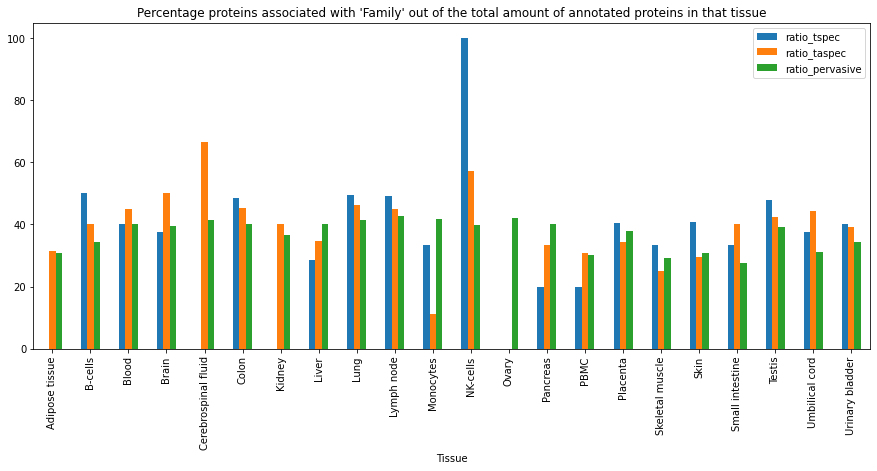

In [46]:
df_family_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Family")|df_types_tissue.columns.str.contains("Tissue"))]
df_family_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_family_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_family_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_family_tissue = df_family_tissue[(df_family_tissue["Total_tspec"]>=50)|(df_family_tissue["Total_taspec"]>=50)|(df_family_tissue["Total_pervasive"]>=50)]
df_family_tissue["ratio_tspec"] = df_family_tissue["Family_tspec"]*100/df_family_tissue["Total_tspec"]
df_family_tissue["ratio_taspec"] = df_family_tissue["Family_taspec"]*100/df_family_tissue["Total_taspec"]
df_family_tissue["ratio_pervasive"] = df_family_tissue["Family_pervasive"]*100/df_family_tissue["Total_pervasive"]

df_family_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Family' out of the total amount of annotated proteins in that tissue")

In [47]:
df_family_tissue

Tissue  Family_tspec  Family_taspec  Family_pervasive  \
0        Adipose tissue             0              6                42   
1               B-cells             1              4                22   
2                 Blood            34            155               264   
4                 Brain             3             10               153   
6   Cerebrospinal fluid             0              2               145   
8                 Colon            90            236               231   
15               Kidney             0             20                69   
16                Liver             6             32               225   
17                 Lung            43            108               175   
18           Lymph node            58            175               210   
20            Monocytes             1              1               147   
22             NK-cells             3              4                31   
23                Ovary             0              0               146   
24             Pancreas             1              3               158   
27                 PBMC            12             42                94   
29             Placenta            28             32               106   
30      Skeletal muscle             5              2                17   
31                 Skin            22             29                89   
32      Small intestine             5              6                25   
35               Testis            11             14                66   
37       Umbilical cord             3             23                76   
39      Urinary bladder             2             20                69   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0            19              137          NaN     31.578947   
1             2            10               64    50.000000     40.000000   
2            85           344              660    40.000000     45.058140   
4             8            20              387    37.500000     50.000000   
6             0             3              349          NaN     66.666667   
8           186           521              576    48.387097     45.297505   
15            0            50              188          NaN     40.000000   
16           21            92              559    28.571429     34.782609   
17           87           234              421    49.425287     46.153846   
18          118           388              492    49.152542     45.103093   
20            3             9              351    33.333333     11.111111   
22            3             7               78   100.000000     57.142857   
23            0             0              346          NaN           NaN   
24            5             9              395    20.000000     33.333333   
27           60           136              312    20.000000     30.882353   
29           69            93              280    40.579710     34.408602   
30           15             8               58    33.333333     25.000000   
31           54            98              290    40.740741     29.591837   
32           15            15               91    33.333333     40.000000   
35           23            33              168    47.826087     42.424242   
37            8            52              243    37.500000     44.230769   
39            5            51              200    40.000000     39.215686   

    ratio_pervasive  
0         30.656934  
1         34.375000  
2         40.000000  
4         39.534884  
6         41.547278  
8         40.104167  
15        36.702128  
16        40.250447  
17        41.567696  
18        42.682927  
20        41.880342  
22        39.743590  
23        42.196532  
24        40.000000  
27        30.128205  
29        37.857143  
30        29.310345  
31        30.689655  
32        27.472527  
35        39.285714  
37        31.275720  
39        34.500000

C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/4102886544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/4102886544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp

<AxesSubplot:title={'center':"Percentage proteins associated with 'Repeat' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

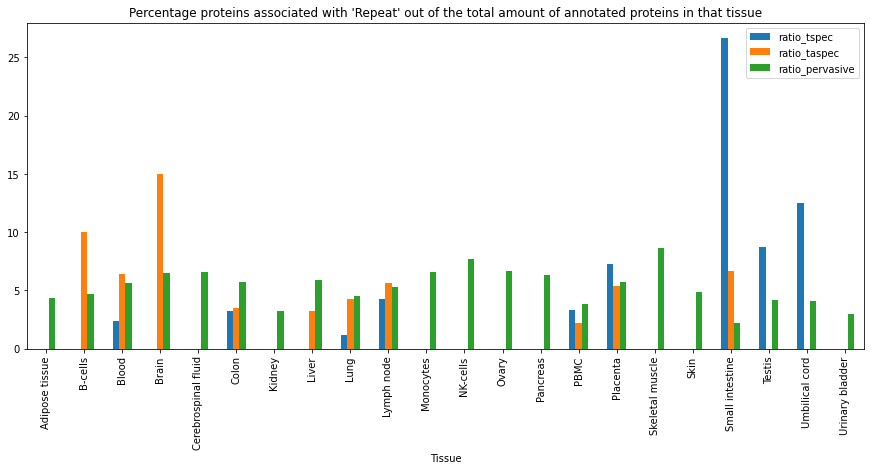

In [48]:
df_repeat_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Repeat")|df_types_tissue.columns.str.contains("Tissue"))]
df_repeat_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_repeat_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_repeat_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_repeat_tissue = df_repeat_tissue[(df_repeat_tissue["Total_tspec"]>=50)|(df_repeat_tissue["Total_taspec"]>=50)|(df_repeat_tissue["Total_pervasive"]>=50)]
df_repeat_tissue["ratio_tspec"] = df_repeat_tissue["Repeat_tspec"]*100/df_repeat_tissue["Total_tspec"]
df_repeat_tissue["ratio_taspec"] = df_repeat_tissue["Repeat_taspec"]*100/df_repeat_tissue["Total_taspec"]
df_repeat_tissue["ratio_pervasive"] = df_repeat_tissue["Repeat_pervasive"]*100/df_repeat_tissue["Total_pervasive"]

df_repeat_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Repeat' out of the total amount of annotated proteins in that tissue")

In [49]:
df_repeat_tissue

Tissue  Repeat_tspec  Repeat_taspec  Repeat_pervasive  \
0        Adipose tissue             0              0                 6   
1               B-cells             0              1                 3   
2                 Blood             2             22                37   
4                 Brain             0              3                25   
6   Cerebrospinal fluid             0              0                23   
8                 Colon             6             18                33   
15               Kidney             0              0                 6   
16                Liver             0              3                33   
17                 Lung             1             10                19   
18           Lymph node             5             22                26   
20            Monocytes             0              0                23   
22             NK-cells             0              0                 6   
23                Ovary             0              0                23   
24             Pancreas             0              0                25   
27                 PBMC             2              3                12   
29             Placenta             5              5                16   
30      Skeletal muscle             0              0                 5   
31                 Skin             0              0                14   
32      Small intestine             4              1                 2   
35               Testis             2              0                 7   
37       Umbilical cord             1              0                10   
39      Urinary bladder             0              0                 6   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0            19              137          NaN      0.000000   
1             2            10               64     0.000000     10.000000   
2            85           344              660     2.352941      6.395349   
4             8            20              387     0.000000     15.000000   
6             0             3              349          NaN      0.000000   
8           186           521              576     3.225806      3.454894   
15            0            50              188          NaN      0.000000   
16           21            92              559     0.000000      3.260870   
17           87           234              421     1.149425      4.273504   
18          118           388              492     4.237288      5.670103   
20            3             9              351     0.000000      0.000000   
22            3             7               78     0.000000      0.000000   
23            0             0              346          NaN           NaN   
24            5             9              395     0.000000      0.000000   
27           60           136              312     3.333333      2.205882   
29           69            93              280     7.246377      5.376344   
30           15             8               58     0.000000      0.000000   
31           54            98              290     0.000000      0.000000   
32           15            15               91    26.666667      6.666667   
35           23            33              168     8.695652      0.000000   
37            8            52              243    12.500000      0.000000   
39            5            51              200     0.000000      0.000000   

    ratio_pervasive  
0          4.379562  
1          4.687500  
2          5.606061  
4          6.459948  
6          6.590258  
8          5.729167  
15         3.191489  
16         5.903399  
17         4.513064  
18         5.284553  
20         6.552707  
22         7.692308  
23         6.647399  
24         6.329114  
27         3.846154  
29         5.714286  
30         8.620690  
31         4.827586  
32         2.197802  
35         4.166667  
37         4.115226  
39         3.000000

C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/3556606590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coiled_coil_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/3556606590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coiled_coil_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\

<AxesSubplot:title={'center':"Percentage proteins associated with 'Coiled-coil' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

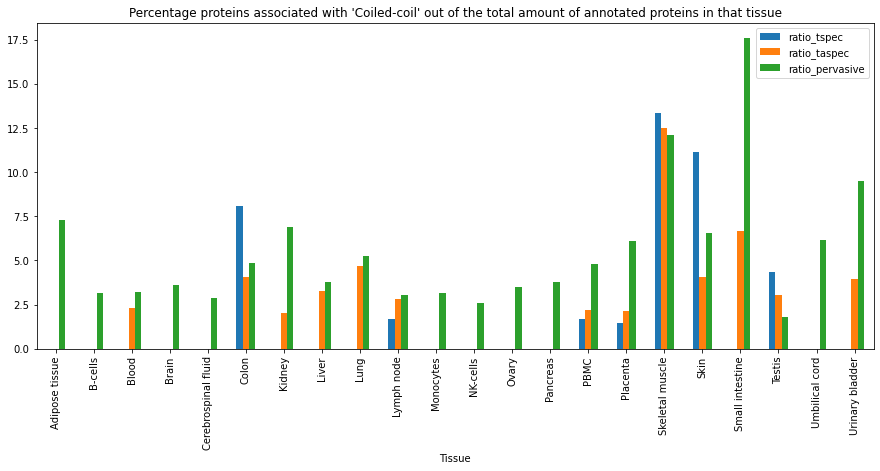

In [50]:
df_coiled_coil_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Coiled-coil")|df_types_tissue.columns.str.contains("Tissue"))]
df_coiled_coil_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_coiled_coil_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_coiled_coil_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_coiled_coil_tissue = df_coiled_coil_tissue[(df_coiled_coil_tissue["Total_tspec"]>=50)|(df_coiled_coil_tissue["Total_taspec"]>=50)|(df_coiled_coil_tissue["Total_pervasive"]>=50)]
df_coiled_coil_tissue["ratio_tspec"] = df_coiled_coil_tissue["Coiled-coil_tspec"]*100/df_coiled_coil_tissue["Total_tspec"]
df_coiled_coil_tissue["ratio_taspec"] = df_coiled_coil_tissue["Coiled-coil_taspec"]*100/df_coiled_coil_tissue["Total_taspec"]
df_coiled_coil_tissue["ratio_pervasive"] = df_coiled_coil_tissue["Coiled-coil_pervasive"]*100/df_coiled_coil_tissue["Total_pervasive"]

df_coiled_coil_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Coiled-coil' out of the total amount of annotated proteins in that tissue")

In [51]:
df_coiled_coil_tissue

Tissue  Coiled-coil_tspec  Coiled-coil_taspec  \
0        Adipose tissue                  0                   0   
1               B-cells                  0                   0   
2                 Blood                  0                   8   
4                 Brain                  0                   0   
6   Cerebrospinal fluid                  0                   0   
8                 Colon                 15                  21   
15               Kidney                  0                   1   
16                Liver                  0                   3   
17                 Lung                  0                  11   
18           Lymph node                  2                  11   
20            Monocytes                  0                   0   
22             NK-cells                  0                   0   
23                Ovary                  0                   0   
24             Pancreas                  0                   0   
27                 PBMC                  1                   3   
29             Placenta                  1                   2   
30      Skeletal muscle                  2                   1   
31                 Skin                  6                   4   
32      Small intestine                  0                   1   
35               Testis                  1                   1   
37       Umbilical cord                  0                   0   
39      Urinary bladder                  0                   2   

    Coiled-coil_pervasive  Total_tspec  Total_taspec  Total_pervasive  \
0                      10            0            19              137   
1                       2            2            10               64   
2                      21           85           344              660   
4                      14            8            20              387   
6                      10            0             3              349   
8                      28          186           521              576   
15                     13            0            50              188   
16                     21           21            92              559   
17                     22           87           234              421   
18                     15          118           388              492   
20                     11            3             9              351   
22                      2            3             7               78   
23                     12            0             0              346   
24                     15            5             9              395   
27                     15           60           136              312   
29                     17           69            93              280   
30                      7           15             8               58   
31                     19           54            98              290   
32                     16           15            15               91   
35                      3           23            33              168   
37                     15            8            52              243   
39                     19            5            51              200   

    ratio_tspec  ratio_taspec  ratio_pervasive  
0           NaN      0.000000         7.299270  
1      0.000000      0.000000         3.125000  
2      0.000000      2.325581         3.181818  
4      0.000000      0.000000         3.617571  
6           NaN      0.000000         2.865330  
8      8.064516      4.030710         4.861111  
15          NaN      2.000000         6.914894  
16     0.000000      3.260870         3.756708  
17     0.000000      4.700855         5.225653  
18     1.694915      2.835052         3.048780  
20     0.000000      0.000000         3.133903  
22     0.000000      0.000000         2.564103  
23          NaN           NaN         3.468208  
24     0.000000      0.000000         3.797468  
27     1.666667      2.205882         4.807692  
29     1.449275      2.150538     

C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/1339115317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disordered_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/1339115317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disordered_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Lo

<AxesSubplot:title={'center':"Percentage proteins associated with 'Disordered' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

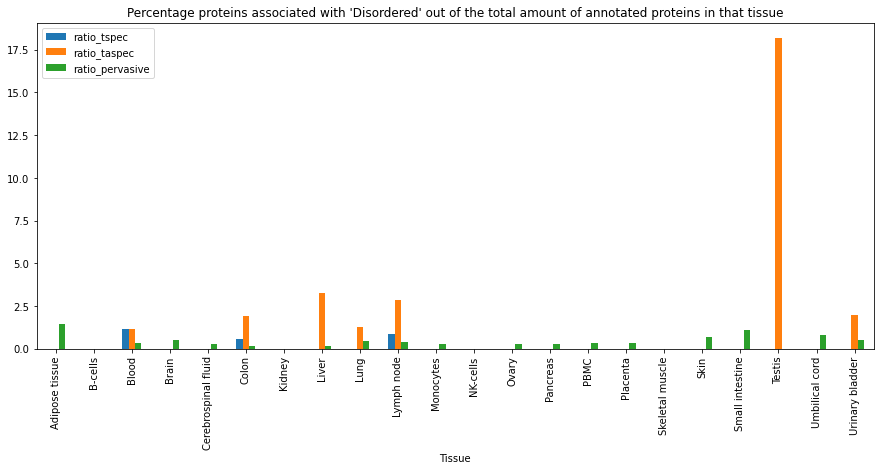

In [52]:
df_disordered_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Disordered")|df_types_tissue.columns.str.contains("Tissue"))]
df_disordered_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_disordered_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_disordered_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_disordered_tissue = df_disordered_tissue[(df_disordered_tissue["Total_tspec"]>=50)|(df_disordered_tissue["Total_taspec"]>=50)|(df_disordered_tissue["Total_pervasive"]>=50)]
df_disordered_tissue["ratio_tspec"] = df_disordered_tissue["Disordered_tspec"]*100/df_disordered_tissue["Total_tspec"]
df_disordered_tissue["ratio_taspec"] = df_disordered_tissue["Disordered_taspec"]*100/df_disordered_tissue["Total_taspec"]
df_disordered_tissue["ratio_pervasive"] = df_disordered_tissue["Disordered_pervasive"]*100/df_disordered_tissue["Total_pervasive"]

df_disordered_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Disordered' out of the total amount of annotated proteins in that tissue")

In [53]:
df_disordered_tissue

Tissue  Disordered_tspec  Disordered_taspec  \
0        Adipose tissue                 0                  0   
1               B-cells                 0                  0   
2                 Blood                 1                  4   
4                 Brain                 0                  0   
6   Cerebrospinal fluid                 0                  0   
8                 Colon                 1                 10   
15               Kidney                 0                  0   
16                Liver                 0                  3   
17                 Lung                 0                  3   
18           Lymph node                 1                 11   
20            Monocytes                 0                  0   
22             NK-cells                 0                  0   
23                Ovary                 0                  0   
24             Pancreas                 0                  0   
27                 PBMC                 0                  0   
29             Placenta                 0                  0   
30      Skeletal muscle                 0                  0   
31                 Skin                 0                  0   
32      Small intestine                 0                  0   
35               Testis                 0                  6   
37       Umbilical cord                 0                  0   
39      Urinary bladder                 0                  1   

    Disordered_pervasive  Total_tspec  Total_taspec  Total_pervasive  \
0                      2            0            19              137   
1                      0            2            10               64   
2                      2           85           344              660   
4                      2            8            20              387   
6                      1            0             3              349   
8                      1          186           521              576   
15                     0            0            50              188   
16                     1           21            92              559   
17                     2           87           234              421   
18                     2          118           388              492   
20                     1            3             9              351   
22                     0            3             7               78   
23                     1            0             0              346   
24                     1            5             9              395   
27                     1           60           136              312   
29                     1           69            93              280   
30                     0           15             8               58   
31                     2           54            98              290   
32                     1           15            15               91   
35                     0           23            33              168   
37                     2            8            52              243   
39                     1            5            51              200   

    ratio_tspec  ratio_taspec  ratio_pervasive  
0           NaN      0.000000         1.459854  
1      0.000000      0.000000         0.000000  
2      1.176471      1.162791         0.303030  
4      0.000000      0.000000         0.516796  
6           NaN      0.000000         0.286533  
8      0.537634      1.919386         0.173611  
15          NaN      0.000000         0.000000  
16     0.000000      3.260870         0.178891  
17     0.000000      1.282051         0.475059  
18     0.847458      2.835052         0.406504  
20     0.000000      0.000000         0.284900  
22     0.000000      0.000000         0.000000  
23          NaN           NaN         0.289017  
24     0.000000      0.000000         0.253165  
27     0.000000      0.000000         0.320513  
29     0.000000      0.000000         0.357143  
30     0.000000      0.000000         0.000000  
31   

C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/2677423619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\18/ipykernel_21480/2677423619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\1

<AxesSubplot:title={'center':"Percentage proteins associated with 'Motif' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

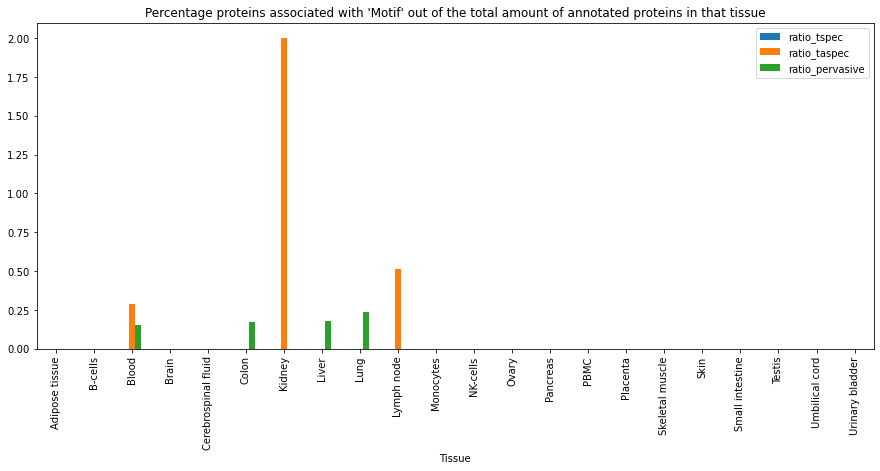

In [54]:
df_motif_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Motif")|df_types_tissue.columns.str.contains("Tissue"))]
df_motif_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_motif_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_motif_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_motif_tissue = df_motif_tissue[(df_motif_tissue["Total_tspec"]>=50)|(df_motif_tissue["Total_taspec"]>=50)|(df_motif_tissue["Total_pervasive"]>=50)]
df_motif_tissue["ratio_tspec"] = df_motif_tissue["Motif_tspec"]*100/df_motif_tissue["Total_tspec"]
df_motif_tissue["ratio_taspec"] = df_motif_tissue["Motif_taspec"]*100/df_motif_tissue["Total_taspec"]
df_motif_tissue["ratio_pervasive"] = df_motif_tissue["Motif_pervasive"]*100/df_motif_tissue["Total_pervasive"]

df_motif_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Motif' out of the total amount of annotated proteins in that tissue")

In [55]:
df_motif_tissue

Tissue  Motif_tspec  Motif_taspec  Motif_pervasive  \
0        Adipose tissue            0             0                0   
1               B-cells            0             0                0   
2                 Blood            0             1                1   
4                 Brain            0             0                0   
6   Cerebrospinal fluid            0             0                0   
8                 Colon            0             0                1   
15               Kidney            0             1                0   
16                Liver            0             0                1   
17                 Lung            0             0                1   
18           Lymph node            0             2                0   
20            Monocytes            0             0                0   
22             NK-cells            0             0                0   
23                Ovary            0             0                0   
24             Pancreas            0             0                0   
27                 PBMC            0             0                0   
29             Placenta            0             0                0   
30      Skeletal muscle            0             0                0   
31                 Skin            0             0                0   
32      Small intestine            0             0                0   
35               Testis            0             0                0   
37       Umbilical cord            0             0                0   
39      Urinary bladder            0             0                0   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0            19              137          NaN      0.000000   
1             2            10               64          0.0      0.000000   
2            85           344              660          0.0      0.290698   
4             8            20              387          0.0      0.000000   
6             0             3              349          NaN      0.000000   
8           186           521              576          0.0      0.000000   
15            0            50              188          NaN      2.000000   
16           21            92              559          0.0      0.000000   
17           87           234              421          0.0      0.000000   
18          118           388              492          0.0      0.515464   
20            3             9              351          0.0      0.000000   
22            3             7               78          0.0      0.000000   
23            0             0              346          NaN           NaN   
24            5             9              395          0.0      0.000000   
27           60           136              312          0.0      0.000000   
29           69            93              280          0.0      0.000000   
30           15             8               58          0.0      0.000000   
31           54            98              290          0.0      0.000000   
32           15            15               91          0.0      0.000000   
35           23            33              168          0.0      0.000000   
37            8            52              243          0.0      0.000000   
39            5            51              200          0.0      0.000000   

    ratio_pervasive  
0          0.000000  
1          0.000000  
2          0.151515  
4          0.000000  
6          0.000000  
8          0.173611  
15         0.000000  
16         0.178891  
17         0.237530  
18         0.000000  
20         0.000000  
22         0.000000  
23         0.000000  
24         0.000000  
27         0.000000  
29         0.000000  
30         0.000000  
31         0.000000  
32         0.000000  
35         0.000000  
37         0.000000  
39         0.000000

# 4. Domain names

We'll proceed with the same kind of analysis, now for the domain names.

In [56]:
tspec_proteins_pfam_hmm_name = tspec_proteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
tspec_proteins_pfam_hmm_name.rename(columns ={"ACC_ID": "number of tissue-specific phosphorylated proteins"}, inplace=True, )
tspec_proteins_pfam_hmm_name.set_index("hmm name", inplace=True)
taspec_proteins_pfam_hmm_name = taspec_proteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
taspec_proteins_pfam_hmm_name.rename(columns ={"ACC_ID": "number of tissue aspecific phosphorylated proteins"}, inplace=True)
taspec_proteins_pfam_hmm_name.set_index("hmm name", inplace=True)
gen_proteins_pfam_hmm_name = gen_proteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
gen_proteins_pfam_hmm_name.rename(columns ={"ACC_ID": "number of pervasively phosphorylated proteins"}, inplace=True)
gen_proteins_pfam_hmm_name.set_index("hmm name", inplace=True)

pfam_hmm_name = pd.concat([tspec_proteins_pfam_hmm_name, taspec_proteins_pfam_hmm_name, gen_proteins_pfam_hmm_name], axis=1)

In [57]:
pfam_hmm_name[(pfam_hmm_name["number of tissue-specific phosphorylated proteins"]>4)|
             (pfam_hmm_name["number of tissue aspecific phosphorylated proteins"]>4)|
             (pfam_hmm_name["number of pervasively phosphorylated proteins"]>4)]

number of tissue-specific phosphorylated proteins  \
hmm name                                                           
14-3-3                                                       1.0   
7tm_1                                                        6.0   
AAA                                                          2.0   
AMP-binding                                                  2.0   
Actin                                                        2.0   
...                                                          ...   
BAR                                                          NaN   
Filament_head                                                NaN   
KH_1                                                         NaN   
Ldh_1_C                                                      NaN   
Tubulin_C                                                    NaN   

               number of tissue aspecific phosphorylated proteins  \
hmm name                                                            
14-3-3                                                       NaN    
7tm_1                                                        1.0    
AAA                                                          5.0    
AMP-binding                                                  5.0    
Actin                                                        5.0    
...                                                          ...    
BAR                                                          NaN    
Filament_head                                                NaN    
KH_1                                                         NaN    
Ldh_1_C                                                      NaN    
Tubulin_C                                                    NaN    

               number of pervasively phosphorylated proteins  
hmm name                                                      
14-3-3                                                   6.0  
7tm_1                                                    NaN  
AAA                                                      3.0  
AMP-binding                                              2.0  
Actin                                                    9.0  
...                                                      ...  
BAR                                                      5.0  
Filament_head                                            5.0  
KH_1                                                     5.0  
Ldh_1_C                                                  5.0  
Tubulin_C                                               16.0  

[62 rows x 3 columns]

While histone domains are more associated with tissue aspecific phosphorylated proteins and pervasively phosphorylated proteins, the reverse goes for histone_H2A_C domains.
- The RRM_1 domain is abundant and is an RNA recognition motif.
- V-set domains are domains resembling the variable domain of antibodies, also found in - amongst others - tyrosine proteins kinase receptors.
- C1-set domains are classical Ig-like domains resembling the antibody constant domain, almost exclusively found in molecules involved in the immune system.
- The CH-domain is a family of actine binding domains that is also involved in signal transduction.
- GAGE families have unknown function but are associated with cancers.
- Histone H2A-C represents the C-terminal domain of histone H2A.
Generally, domains are associated with either a high amount of non-tissue-specific phosphorylated proteins, or a high amount of tissue-specific phosphorylated proteins, and only rarely a combination thereof.

<AxesSubplot:title={'center':'Number of proteins in each of the three categories having phosphosites in a domain'}, xlabel='hmm name'>

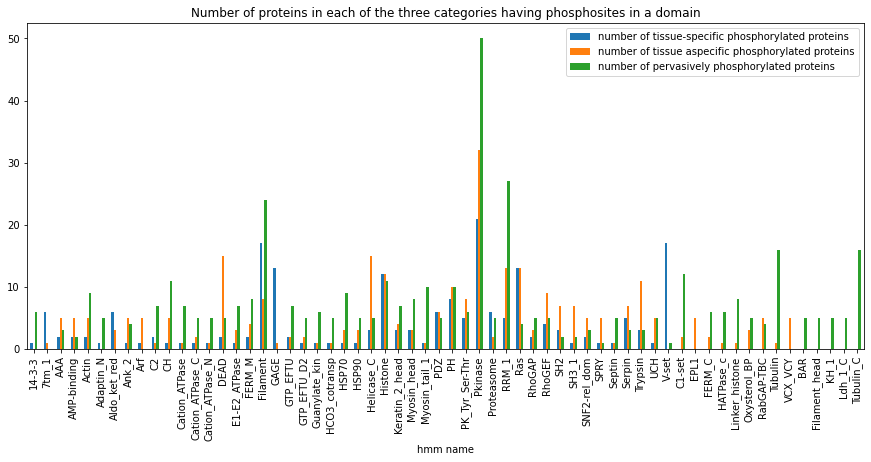

In [58]:
pfam_hmm_name[(pfam_hmm_name["number of tissue-specific phosphorylated proteins"]>4)|
             (pfam_hmm_name["number of tissue aspecific phosphorylated proteins"]>4)|
             (pfam_hmm_name["number of pervasively phosphorylated proteins"]>4)].plot(kind="bar", figsize=(15,6), title="Number of proteins in each of the three categories having phosphosites in a domain")

In [59]:
tspec_proteins_pfam[tspec_proteins_pfam["hmm name"]=="C1-set"]

Empty DataFrame
Columns: [ACC_ID, UP_POS, tissue, modres, Adipose tissue, B-cells, Blood, Bone, Brain, Breast, Cerebrospinal fluid, Cervix, Colon, Dental plaque, Esophagus, Eye, Follicular fluid, Heart, Hela, Kidney, Liver, Lung, Lymph node, Menstrual fluid, Monocytes, Nasal polyps, NK-cells, Ovary, Pancreas, Palatine tonsils, Parotid gland, PBMC, Peritoneal dialysis fluid, Placenta, Skeletal muscle, Skin, Small intestine, Synovial tissue, T-cells, Testis, Tooth, Umbilical cord, Ureter, Urinary bladder, Urine, hmm start, hmm end, hmm name, type, clan, E-value]
Index: []

[0 rows x 51 columns]

In [60]:
taspec_proteins_pfam[taspec_proteins_pfam["hmm name"]=="C1-set"]

ACC_ID  UP_POS                                             tissue  \
11    A0M8Q6      10                                     Lung,Lung,Lung   
12    A0M8Q6      31  Nasal polyps, Palatine tonsils, Parotid gland,...   
4665  P15814      61                     Adipose tissue, Umbilical cord   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
11        T               0        0      0     0      0       0  ...   
12        S               0        0      0     0      0       0  ...   
4665      S               1        0      0     0      0       0  ...   

      Umbilical cord  Ureter  Urinary bladder  Urine  hmm start  hmm end  \
11                 0       0                0      0          1       85   
12                 0       0                0      0          1       85   
4665               1       0                0      0          1       85   

      hmm name    type    clan       E-value  
11      C1-set  Domain  CL0011  2.100000e-27  
12      C1-set  Domain  CL0011  2.100000e-27  
4665    C1-set  Domain  CL0011  6.600000e-26  

[3 rows x 51 columns]

In [61]:
gen_proteins_pfam[gen_proteins_pfam["hmm name"]=="C1-set"]

ACC_ID  UP_POS                                             tissue  \
4555   P01834       7               Breast,Blood,Blood,Blood,Blood,Blood   
4556   P01834      20                Small intestine,Cerebrospinal fluid   
4557   P01834      24  Breast,Breast,PBMC,PBMC,Lung,Lung,Lung,Lung,Lu...   
4558   P01834      49  Dental plaque,Dental plaque,Lymph node,Lymph node   
4559   P01834      52     Placenta,Placenta,Placenta,Placenta,Lymph node   
...       ...     ...                                                ...   
8919   P0DOY3      47                        PBMC,PBMC,Blood,Blood,Blood   
8920   P0DOY3      84  Nasal polyps, Palatine tonsils, Parotid gland,...   
8921   P0DOY3      85                              Brain,Small intestine   
22917  P61769      46  PBMC,PBMC,PBMC,Cerebrospinal fluid,Adipose tis...   
22918  P61769      48                                          Monocytes   

      modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
4555       S               0        0      1     0      0       1  ...   
4556       S               0        0      0     0      0       0  ...   
4557       S               0        0      1     0      1       1  ...   
4558       S               0        0      0     0      0       0  ...   
4559       S               0        0      0     0      0       0  ...   
...      ...             ...      ...    ...   ...    ...     ...  ...   
8919       S               0        0      1     0      0       0  ...   
8920       S               0        0      1     0      0       0  ...   
8921       Y               0        0      0     0      1       0  ...   
22917      Y               1        0      0     0      0       0  ...   
22918      S               0        0      0     0      0       0  ...   

       Umbilical cord  Ureter  Urinary bladder  Urine  hmm start  hmm end  \
4555                0       0                0      0          1       86   
4556                0       0                0      0          1       86   
4557                0       0                0      0          1       86   
4558                0       0                0      0          1       86   
4559                0       0                0      0          1       86   
...               ...     ...              ...    ...        ...      ...   
8919                0       0                0      0          1       85   
8920                0       0                0      0          1       85   
8921                0       0                0      0          1       85   
22917               1       0                0      0          1       85   
22918               0       0                0      0          1       85   

       hmm name    type    clan       E-value  
4555     C1-set  Domain  CL0011  1.300000e-21  
4556     C1-set  Domain  CL0011  1.300000e-21  
4557     C1-set  Domain  CL0011  1.300000e-21  
4558     C1-set  Domain  CL0011  1.300000e-21  
4559     C1-set  Domain  CL0011  1.300000e-21  
...         ...     ...     ...           ...  
8919     C1-set  Domain  CL0011  2.500000e-28  
8920     C1-set  Domain  CL0011  2.500000e-28  
8921     C1-set  Domain  CL0011  2.500000e-28  
22917    C1-set  Domain  CL0011  5.800000e-19  
22918    C1-set  Domain  CL0011  5.800000e-19  

[65 rows x 51 columns]

# 5. Clans

We'll now have a look at the different clans.

In [62]:
tspec_proteins_pfam_clan = tspec_proteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
tspec_proteins_pfam_clan.rename(columns ={"ACC_ID": "number of tissue-specific phosphorylated proteins"}, inplace=True, )
tspec_proteins_pfam_clan.set_index("clan", inplace=True)
taspec_proteins_pfam_clan = taspec_proteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
taspec_proteins_pfam_clan.rename(columns ={"ACC_ID": "number of tissue aspecific phosphorylated proteins"}, inplace=True)
taspec_proteins_pfam_clan.set_index("clan", inplace=True)
gen_proteins_pfam_clan = gen_proteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
gen_proteins_pfam_clan.rename(columns ={"ACC_ID": "number of pervasively phosphorylated proteins"}, inplace=True)
gen_proteins_pfam_clan.set_index("clan", inplace=True)

pfam_clan = pd.concat([tspec_proteins_pfam_clan, taspec_proteins_pfam_clan, gen_proteins_pfam_clan], axis=1)
pfam_clan.head()

number of tissue-specific phosphorylated proteins  \
clan                                                        
CL0001                                                1.0   
CL0003                                                3.0   
CL0004                                                1.0   
CL0006                                                2.0   
CL0010                                                2.0   

        number of tissue aspecific phosphorylated proteins  \
clan                                                         
CL0001                                                1.0    
CL0003                                                4.0    
CL0004                                                7.0    
CL0006                                                2.0    
CL0010                                               11.0    

        number of pervasively phosphorylated proteins  
clan                                                   
CL0001                                            1.0  
CL0003                                            2.0  
CL0004                                            4.0  
CL0006                                            3.0  
CL0010                                            7.0

In [63]:
pfam_clan[(pfam_clan["number of tissue-specific phosphorylated proteins"]>4)|
             (pfam_clan["number of tissue aspecific phosphorylated proteins"]>4)|
             (pfam_clan["number of pervasively phosphorylated proteins"]>4)]

number of tissue-specific phosphorylated proteins  \
clan                                                        
CL0004                                                1.0   
CL0010                                                2.0   
CL0011                                               20.0   
CL0012                                               14.0   
CL0015                                                4.0   
...                                                   ...   
CL0497                                                NaN   
CL0007                                                NaN   
CL0341                                                NaN   
CL0422                                                NaN   
CL0442                                                NaN   

        number of tissue aspecific phosphorylated proteins  \
clan                                                         
CL0004                                                7.0    
CL0010                                               11.0    
CL0011                                                3.0    
CL0012                                               12.0    
CL0015                                                5.0    
...                                                   ...    
CL0497                                                2.0    
CL0007                                                NaN    
CL0341                                                NaN    
CL0422                                                NaN    
CL0442                                                NaN    

        number of pervasively phosphorylated proteins  
clan                                                   
CL0004                                            4.0  
CL0010                                            7.0  
CL0011                                           14.0  
CL0012                                           13.0  
CL0015                                            2.0  
...                                               ...  
CL0497                                            6.0  
CL0007                                            6.0  
CL0341                                            5.0  
CL0422                                            5.0  
CL0442                                           16.0  

[63 rows x 3 columns]

Interesting clans:
- CL0011: Immunoglobulin superfamily
- CL0016: PKinase
- CL0020: TPR-clan
- CL0023: P-loop_NTPase
- CL0063: NADP_Rossmann
- CL0108: Actin_ATPase
- CL0123: Helix-Turn-Helix clan
- CL0125: Peptidase clan CA
- CL0159: Ig-like fold superfamily (E-set)
- CL0220: EF_hand
- CL0221: RRM-like clan, RNA recognition motifs
- CL0442: Tubulin-C
- CL0566: Tubulin
- CL0661: GPCR autoproteolysis inducing

<AxesSubplot:title={'center':'Number of proteins in each of the three categories having phosphosites in a certain domain belonging to a certain clan'}, xlabel='clan'>

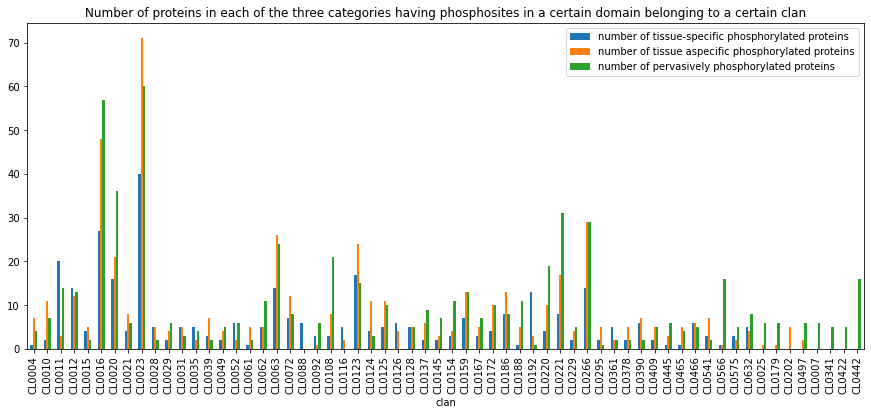

In [64]:
pfam_clan[((pfam_clan["number of tissue-specific phosphorylated proteins"]>4)|
             (pfam_clan["number of tissue aspecific phosphorylated proteins"]>4)|
             (pfam_clan["number of pervasively phosphorylated proteins"]>4))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), title="Number of proteins in each of the three categories having phosphosites in a certain domain belonging to a certain clan")

# 6. Looking at different tissues

## looking at Colon

We now repeat the same analysis for all of the tissues seperately, as well as for all tissues excluding colon (the largest tissue in terms of protein counts).

- CL0020: Tetratrico peptide repeat superfamily (involved in protein-protein interaction and multiprotein complexes (amongst others)
- CL0192: Family A G protein-coupled receptor-like superfamily
- CL0266: PH domain-like superfamily, bind short peptide motifs and involved in cellular signalling

<AxesSubplot:xlabel='clan'>

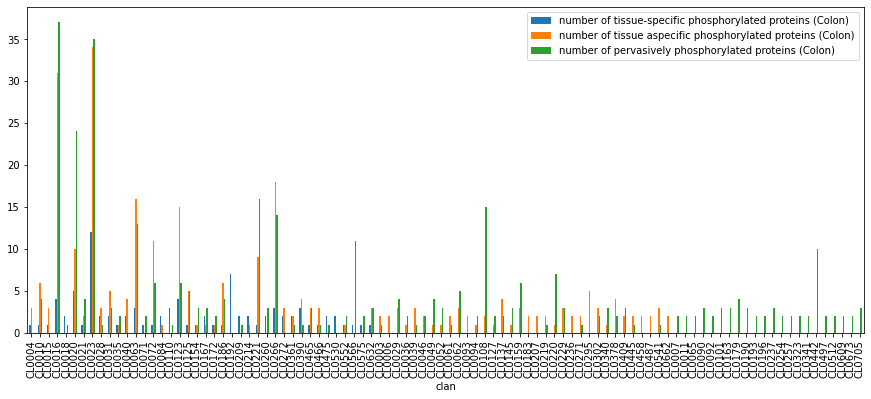

In [65]:
df_clan_tspec_colon = tspec_proteins_pfam.loc[tspec_proteins_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_colon.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_clan_tspec_colon.set_index(["clan"], inplace=True)
df_clan_taspec_colon = taspec_proteins_pfam.loc[taspec_proteins_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_colon.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_clan_taspec_colon.set_index(["clan"], inplace=True)
df_clan_gen_colon = gen_proteins_pfam.loc[gen_proteins_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_colon.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_clan_gen_colon.set_index(["clan"], inplace=True)
df_clan_all_colon = pd.concat([df_clan_tspec_colon, df_clan_taspec_colon, df_clan_gen_colon], axis=1)
df_clan_all_colon[((df_clan_all_colon["number of tissue-specific phosphorylated proteins (Colon)"]>1)|
                 (df_clan_all_colon["number of tissue aspecific phosphorylated proteins (Colon)"]>1)|
                 (df_clan_all_colon["number of pervasively phosphorylated proteins (Colon)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

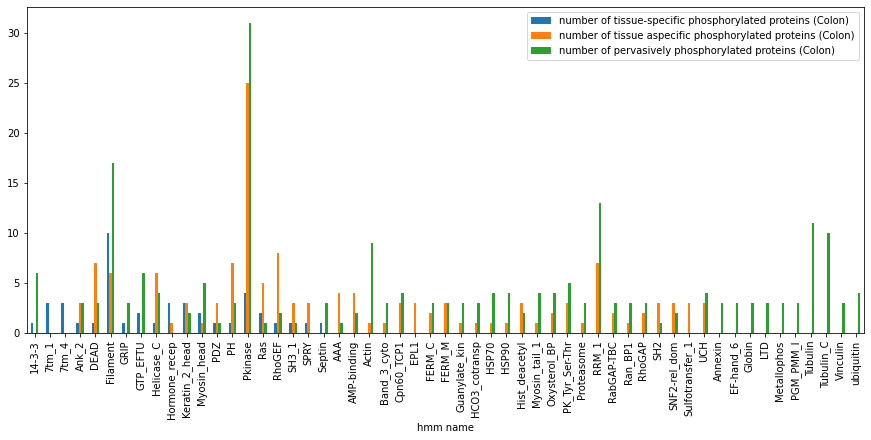

In [66]:
df_hmm_tspec_colon = tspec_proteins_pfam.loc[tspec_proteins_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_colon.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_tspec_colon.set_index(["hmm name"], inplace=True)
df_hmm_taspec_colon = taspec_proteins_pfam.loc[taspec_proteins_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_colon.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_taspec_colon.set_index(["hmm name"], inplace=True)
df_hmm_gen_colon = gen_proteins_pfam.loc[gen_proteins_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_colon.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_gen_colon.set_index(["hmm name"], inplace=True)
df_hmm_all_colon = pd.concat([df_hmm_tspec_colon, df_hmm_taspec_colon, df_hmm_gen_colon], axis=1)
df_hmm_all_colon[((df_hmm_all_colon["number of tissue-specific phosphorylated proteins (Colon)"]>2)|
                 (df_hmm_all_colon["number of tissue aspecific phosphorylated proteins (Colon)"]>2)|
                 (df_hmm_all_colon["number of pervasively phosphorylated proteins (Colon)"]>2))].plot(kind="bar", figsize=(15,6))

## looking at all other tissues

<AxesSubplot:xlabel='clan'>

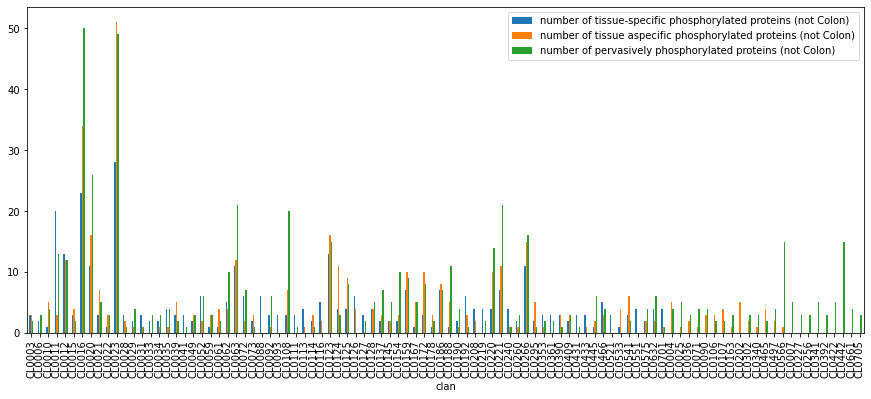

In [67]:
df_clan_tspec_noncolon = tspec_proteins_pfam.loc[tspec_proteins_pfam["Colon"]==0, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_noncolon.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (not Colon)"}, inplace=True, axis=1)
df_clan_tspec_noncolon.set_index(["clan"], inplace=True)
df_clan_taspec_noncolon = taspec_proteins_pfam.loc[taspec_proteins_pfam["Colon"]==0, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_noncolon.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (not Colon)"}, inplace=True, axis=1)
df_clan_taspec_noncolon.set_index(["clan"], inplace=True)
df_clan_gen_noncolon = gen_proteins_pfam.loc[gen_proteins_pfam["Colon"]==0, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_noncolon.rename({"ACC_ID": "number of pervasively phosphorylated proteins (not Colon)"}, inplace=True, axis=1)
df_clan_gen_noncolon.set_index(["clan"], inplace=True)
df_clan_all_noncolon = pd.concat([df_clan_tspec_noncolon, df_clan_taspec_noncolon, df_clan_gen_noncolon], axis=1)
df_clan_all_noncolon[((df_clan_all_noncolon["number of tissue-specific phosphorylated proteins (not Colon)"]>2)|
                 (df_clan_all_noncolon["number of tissue aspecific phosphorylated proteins (not Colon)"]>2)|
                 (df_clan_all_noncolon["number of pervasively phosphorylated proteins (not Colon)"]>2))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

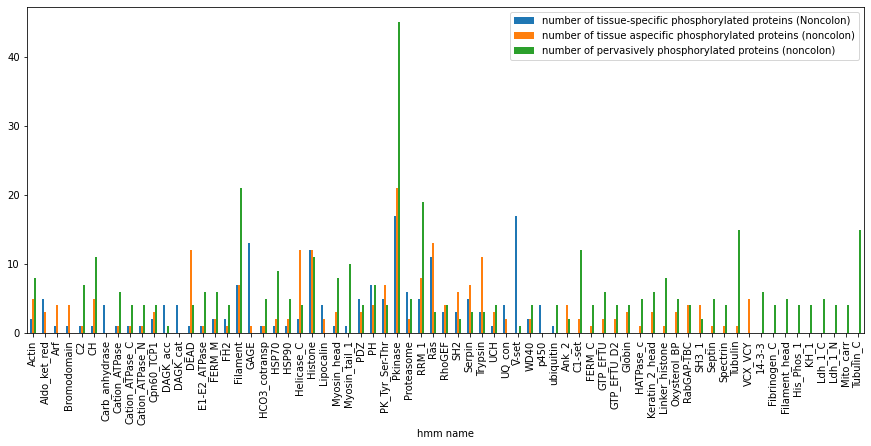

In [68]:
df_hmm_tspec_noncolon = tspec_proteins_pfam.loc[tspec_proteins_pfam["Colon"]==0, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_noncolon.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Noncolon)"}, inplace=True, axis=1)
df_hmm_tspec_noncolon.set_index(["hmm name"], inplace=True)
df_hmm_taspec_noncolon = taspec_proteins_pfam.loc[taspec_proteins_pfam["Colon"]==0, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_noncolon.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (noncolon)"}, inplace=True, axis=1)
df_hmm_taspec_noncolon.set_index(["hmm name"], inplace=True)
df_hmm_gen_noncolon = gen_proteins_pfam.loc[gen_proteins_pfam["Colon"]==0, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_noncolon.rename({"ACC_ID": "number of pervasively phosphorylated proteins (noncolon)"}, inplace=True, axis=1)
df_hmm_gen_noncolon.set_index(["hmm name"], inplace=True)
df_hmm_all_noncolon = pd.concat([df_hmm_tspec_noncolon, df_hmm_taspec_noncolon, df_hmm_gen_noncolon], axis=1)
df_hmm_all_noncolon[((df_hmm_all_noncolon["number of tissue-specific phosphorylated proteins (Noncolon)"]>3)|
                 (df_hmm_all_noncolon["number of tissue aspecific phosphorylated proteins (noncolon)"]>3)|
                 (df_hmm_all_noncolon["number of pervasively phosphorylated proteins (noncolon)"]>3))].plot(kind="bar", figsize=(15,6))

## Adipose tissue

<AxesSubplot:xlabel='clan'>

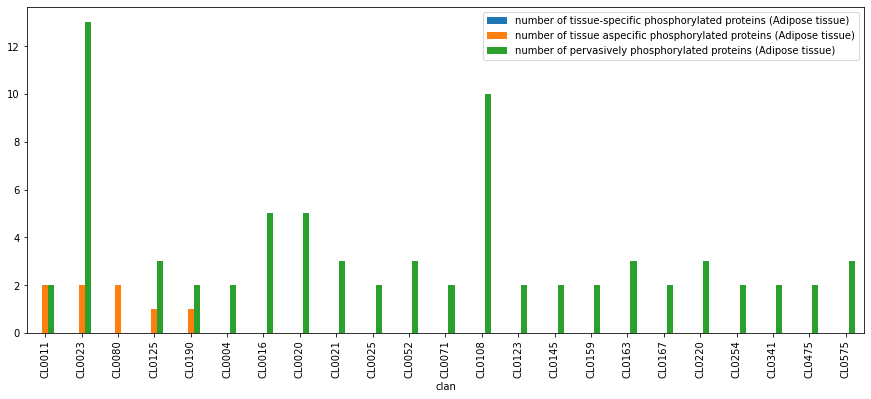

In [69]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Adipose tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Adipose tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Adipose tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Adipose tissue)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Adipose tissue)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Adipose tissue)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

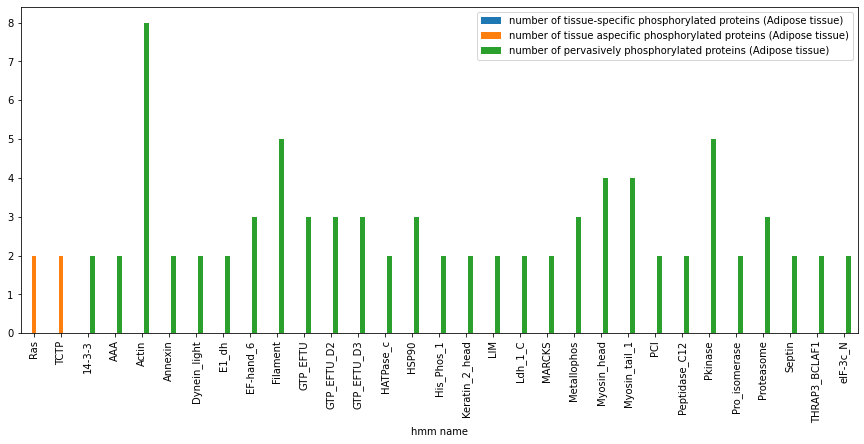

In [70]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Adipose tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Adipose tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Adipose tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Adipose tissue)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Adipose tissue)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Adipose tissue)"]>1))].plot(kind="bar", figsize=(15,6))

## B-cells

<AxesSubplot:xlabel='clan'>

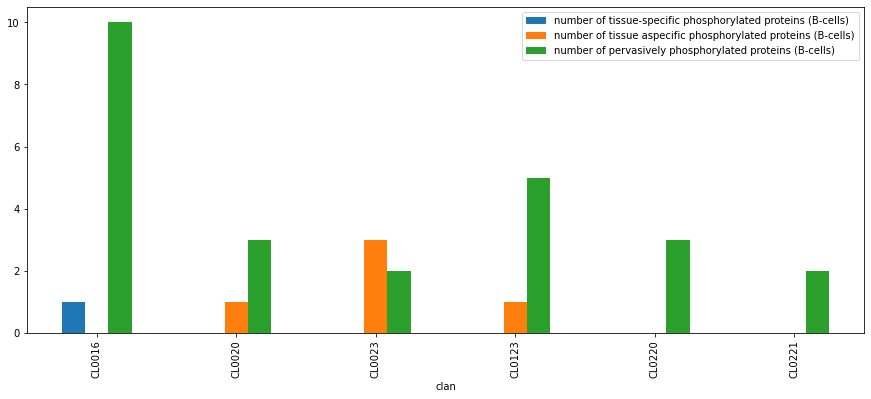

In [71]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["B-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (B-cells)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["B-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (B-cells)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["B-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (B-cells)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (B-cells)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (B-cells)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (B-cells)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

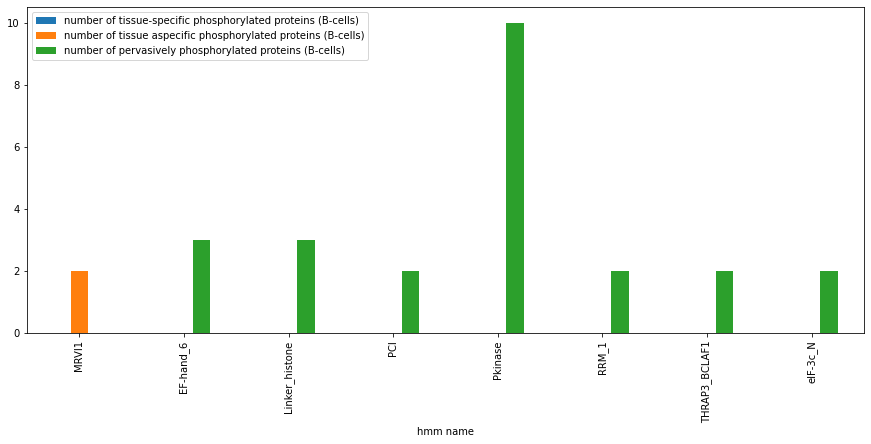

In [72]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["B-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (B-cells)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["B-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (B-cells)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["B-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (B-cells)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (B-cells)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (B-cells)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (B-cells)"]>1))].plot(kind="bar", figsize=(15,6))

## Blood

<AxesSubplot:xlabel='clan'>

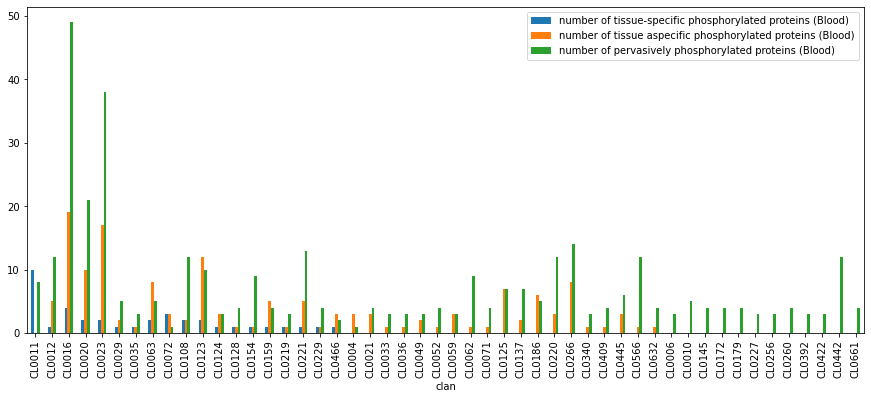

In [73]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Blood)"]>2)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Blood)"]>2)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Blood)"]>2))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

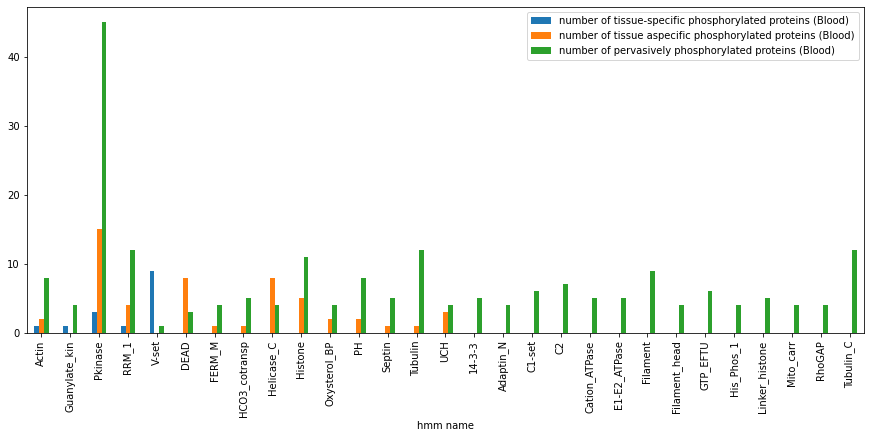

In [74]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Blood)"]>3)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Blood)"]>3)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Blood)"]>3))].plot(kind="bar", figsize=(15,6))

## Bone

<AxesSubplot:xlabel='clan'>

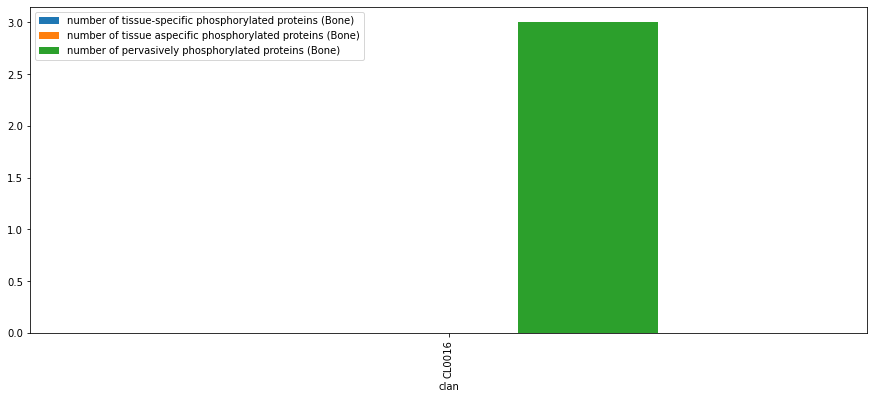

In [75]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Bone"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Bone)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Bone"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Bone)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Bone"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Bone)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Bone)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Bone)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Bone)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

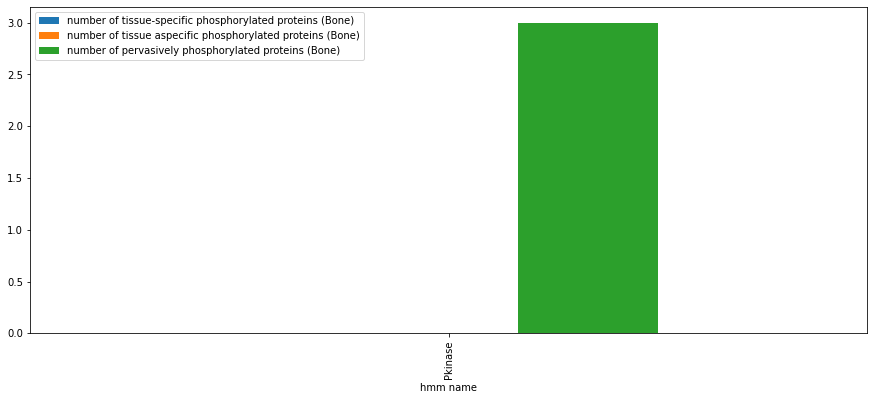

In [76]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Bone"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Bone)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Bone"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Bone)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Bone"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Bone)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Bone)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Bone)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Bone)"]>1))].plot(kind="bar", figsize=(15,6))

## Brain

<AxesSubplot:xlabel='clan'>

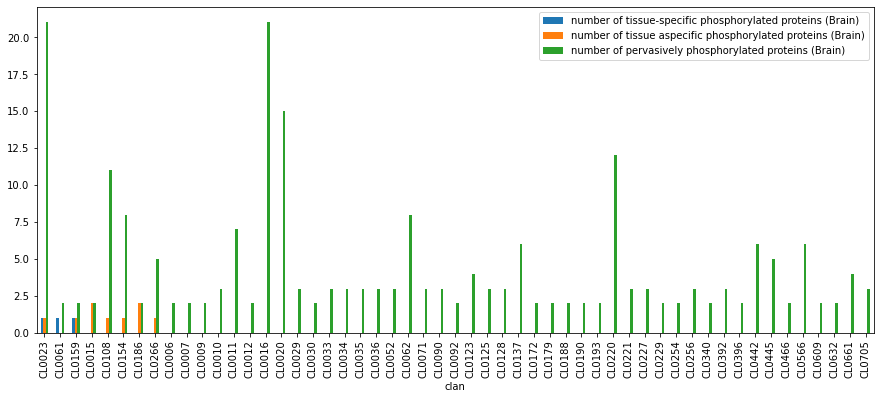

In [77]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Brain)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Brain)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Brain)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

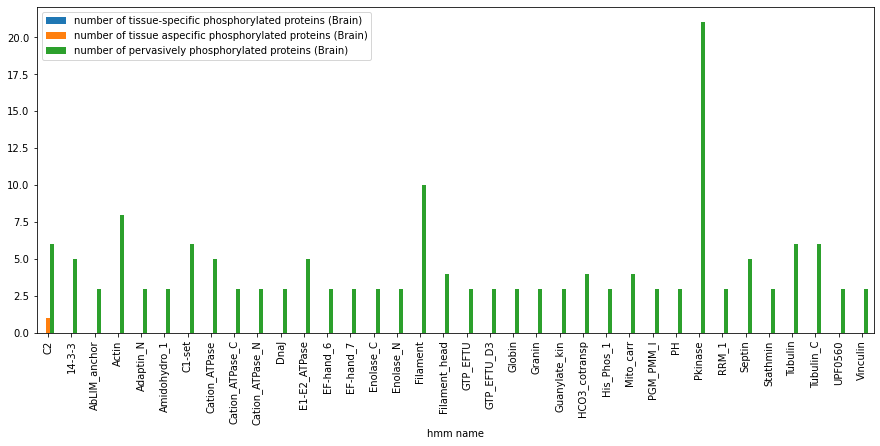

In [78]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Brain)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Brain)"]>2)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Brain)"]>2))].plot(kind="bar", figsize=(15,6))

## Breast

<AxesSubplot:xlabel='clan'>

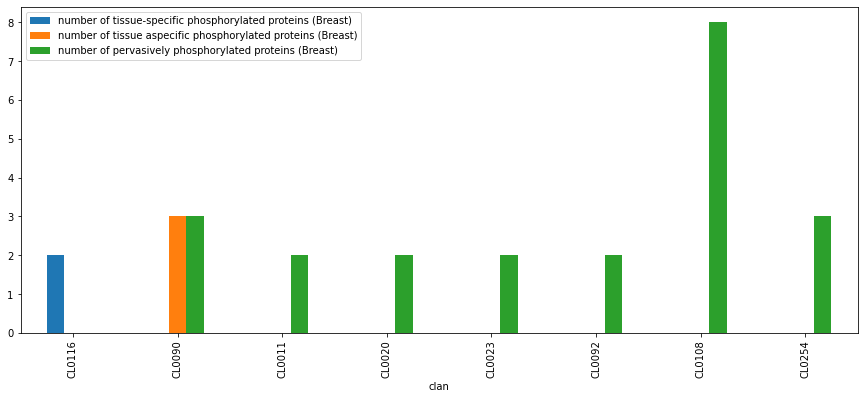

In [79]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Breast"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Breast)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Breast"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Breast)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Breast"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Breast)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Breast)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Breast)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Breast)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

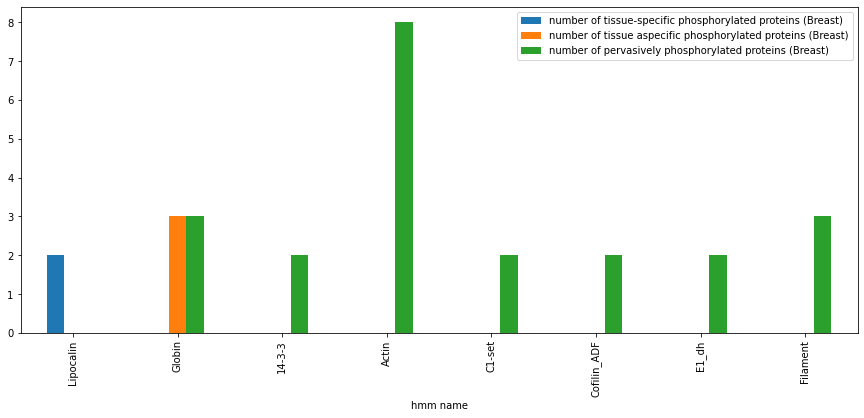

In [80]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Breast"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Breast)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Breast"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Breast)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Breast"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Breast)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Breast)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Breast)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Breast)"]>1))].plot(kind="bar", figsize=(15,6))

## Cerebrospinal fluid

<AxesSubplot:xlabel='clan'>

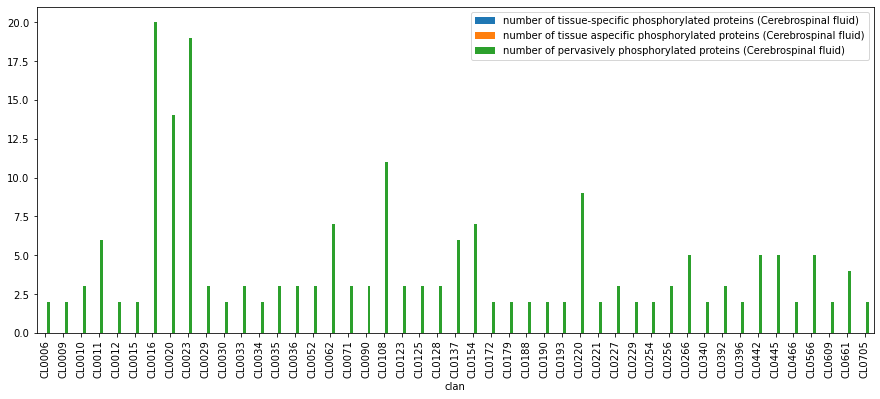

In [81]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Cerebrospinal fluid)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Cerebrospinal fluid)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

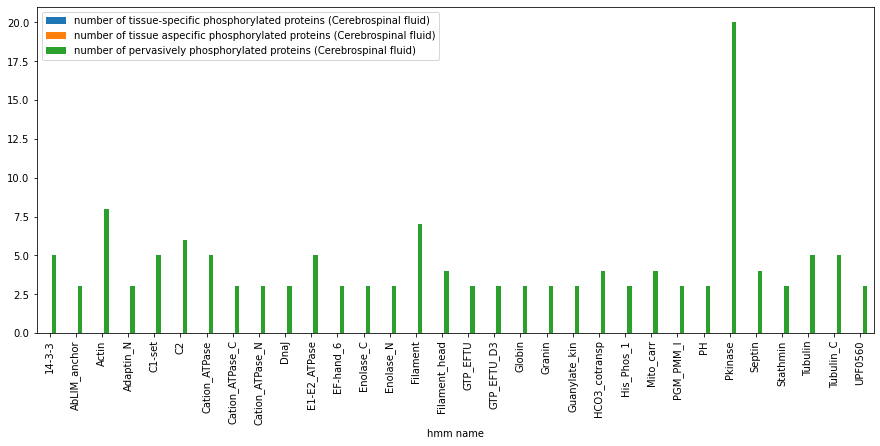

In [82]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Cerebrospinal fluid)"]>2)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Cerebrospinal fluid)"]>2))].plot(kind="bar", figsize=(15,6))

## Cervix

In [83]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Cervix"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Cervix)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Cervix"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Cervix)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Cervix"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Cervix)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue

number of tissue-specific phosphorylated proteins (Cervix)  \
clan                                                                  
No_clan                                                1.0            
CL0011                                                 NaN            
CL0179                                                 NaN            
CL0190                                                 NaN            
CL0282                                                 NaN            
CL0506                                                 NaN            

         number of tissue aspecific phosphorylated proteins (Cervix)  \
clan                                                                   
No_clan                                                3.0             
CL0011                                                 NaN             
CL0179                                                 NaN             
CL0190                                                 NaN             
CL0282                                                 NaN             
CL0506                                                 NaN             

         number of pervasively phosphorylated proteins (Cervix)  
clan                                                             
No_clan                                                  4       
CL0011                                                   1       
CL0179                                                   1       
CL0190                                                   1       
CL0282                                                   1       
CL0506                                                   1

<AxesSubplot:xlabel='hmm name'>

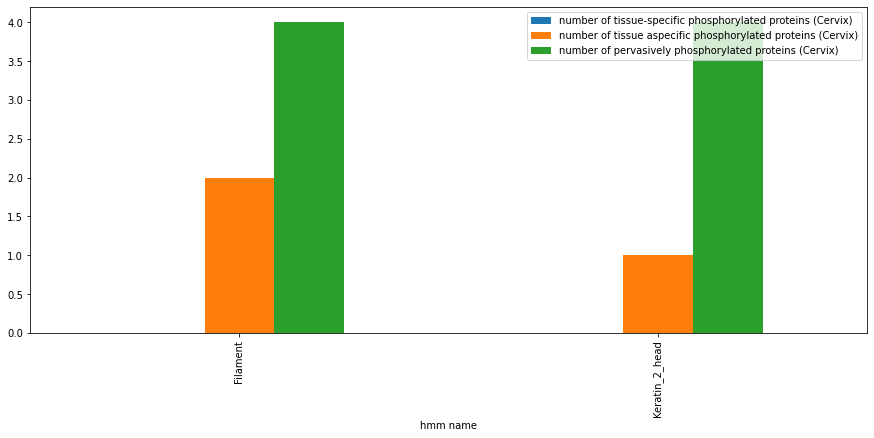

In [84]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Cervix"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Cervix)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Cervix"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Cervix)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Cervix"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Cervix)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Cervix)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Cervix)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Cervix)"]>1))].plot(kind="bar", figsize=(15,6))

## Dental plaque

<AxesSubplot:xlabel='clan'>

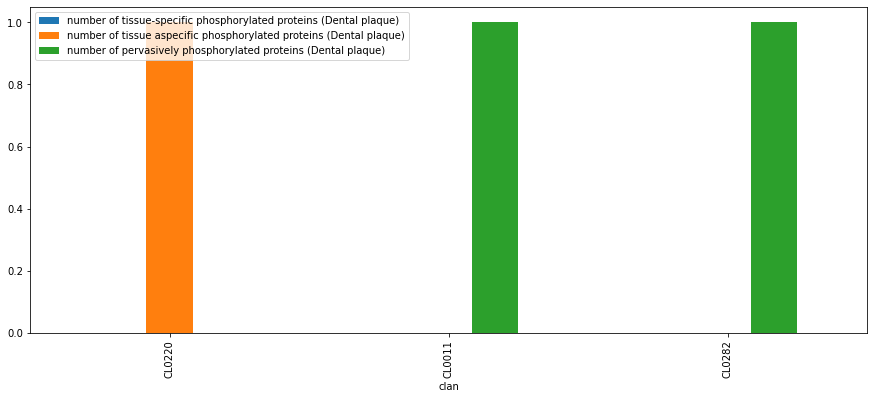

In [85]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Dental plaque"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Dental plaque)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Dental plaque"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Dental plaque)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Dental plaque"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Dental plaque)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Dental plaque)"]>=1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Dental plaque)"]>=1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Dental plaque)"]>=1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

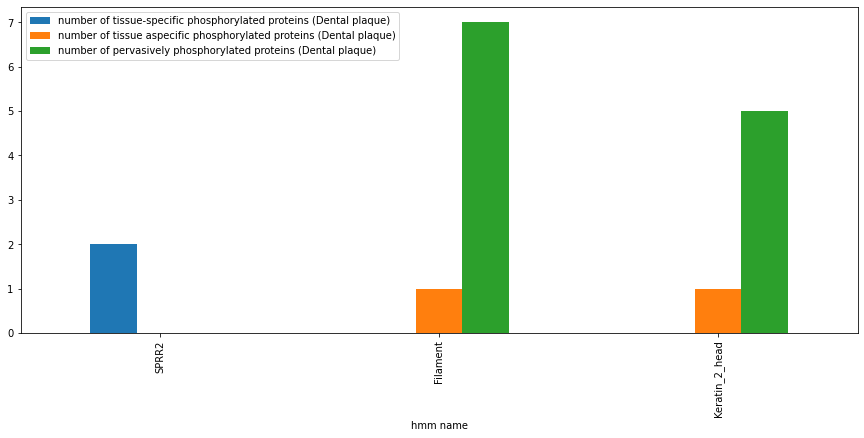

In [86]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Dental plaque"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Dental plaque)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Dental plaque"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Dental plaque)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Dental plaque"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Dental plaque)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Dental plaque)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Dental plaque)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Dental plaque)"]>1))].plot(kind="bar", figsize=(15,6))

## Esophagus

<AxesSubplot:xlabel='clan'>

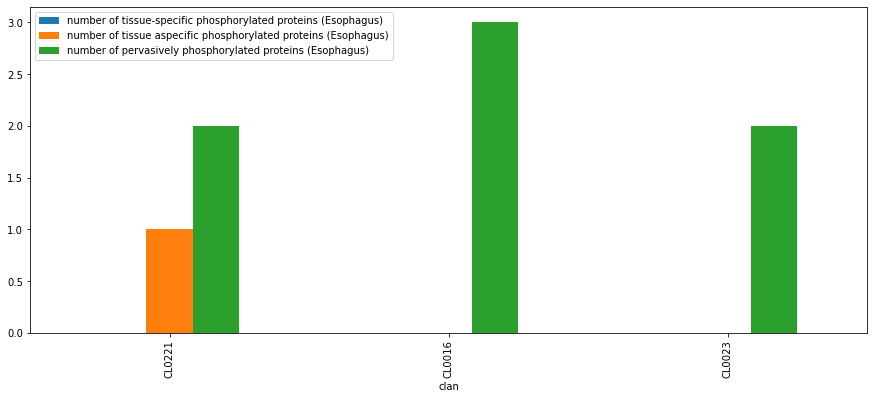

In [87]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Esophagus"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Esophagus)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Esophagus"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Esophagus)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Esophagus"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Esophagus)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Esophagus)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Esophagus)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Esophagus)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

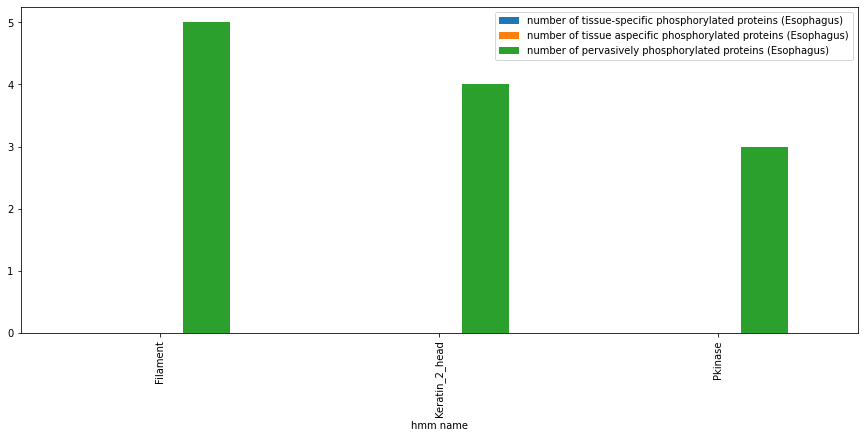

In [88]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Esophagus"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Esophagus)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Esophagus"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Esophagus)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Esophagus"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Esophagus)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Esophagus)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Esophagus)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Esophagus)"]>1))].plot(kind="bar", figsize=(15,6))

## Eye

<AxesSubplot:xlabel='clan'>

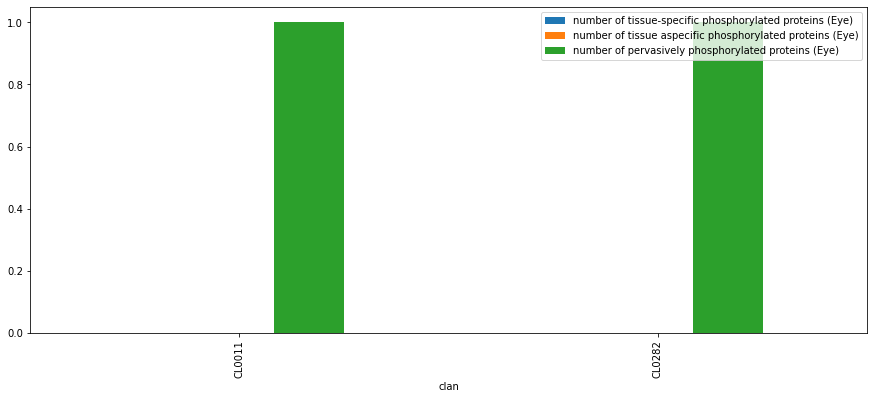

In [89]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Eye"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Eye)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Eye"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Eye)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Eye"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Eye)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Eye)"]>=1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Eye)"]>=1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Eye)"]>=1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

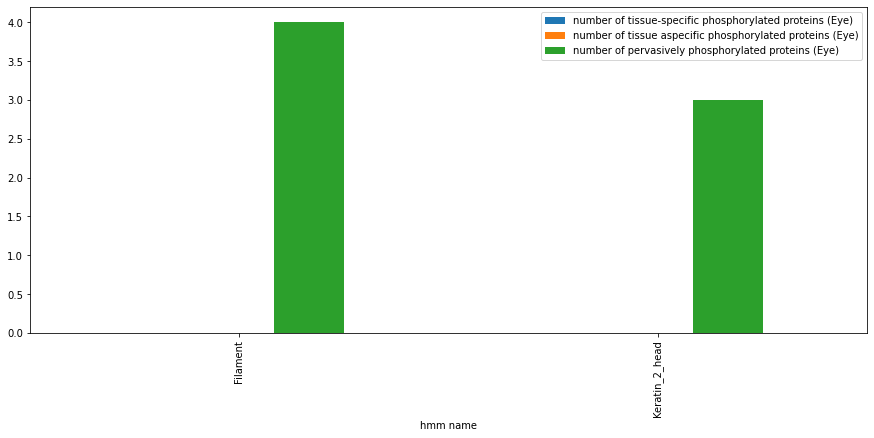

In [90]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Eye"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Eye)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Eye"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Eye)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Eye"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Eye)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Eye)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Eye)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Eye)"]>1))].plot(kind="bar", figsize=(15,6))

## Follicular fluid

In [91]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Follicular fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Follicular fluid)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Follicular fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Follicular fluid)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Follicular fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Follicular fluid)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue

#Family A G protein-coupled receptor-like superfamily

number of tissue-specific phosphorylated proteins (Follicular fluid)  \
clan                                                                           
CL0192                                                NaN                      

        number of tissue aspecific phosphorylated proteins (Follicular fluid)  \
clan                                                                            
CL0192                                                  1                       

        number of pervasively phosphorylated proteins (Follicular fluid)  
clan                                                                      
CL0192                                                NaN

In [92]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Follicular fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Follicular fluid)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Follicular fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Follicular fluid)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Follicular fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Follicular fluid)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue#[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Follicular fluid)"]>1)|
                 #(df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Follicular fluid)"]>1)|
                 #(df_hmm_all_tissue["number of pervasively phosphorylated proteins (Follicular fluid)"]>1))].plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphorylated proteins (Follicular fluid)  \
hmm name                                                                         
TAS2R                                                   NaN                      

          number of tissue aspecific phosphorylated proteins (Follicular fluid)  \
hmm name                                                                          
TAS2R                                                     1                       

          number of pervasively phosphorylated proteins (Follicular fluid)  
hmm name                                                                    
TAS2R                                                   NaN

## Heart

<AxesSubplot:xlabel='clan'>

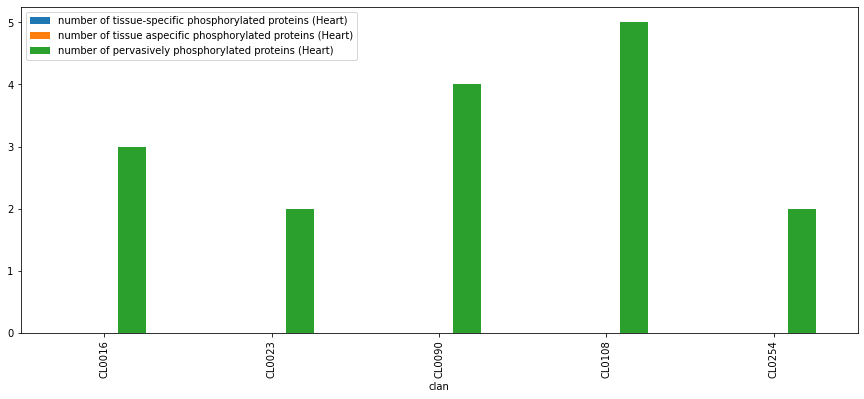

In [93]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Heart"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Heart)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Heart"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Heart)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Heart"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Heart)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Heart)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Heart)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Heart)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

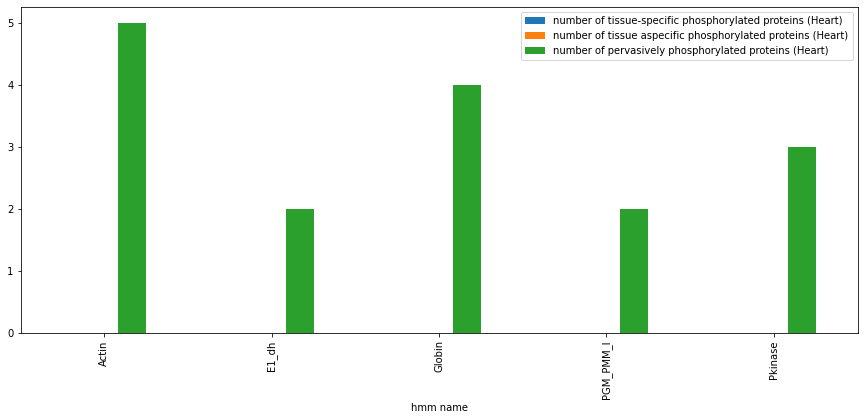

In [94]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Heart"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Heart)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Heart"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Heart)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Heart"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Heart)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Heart)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Heart)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Heart)"]>1))].plot(kind="bar", figsize=(15,6))

## HeLa

<AxesSubplot:xlabel='clan'>

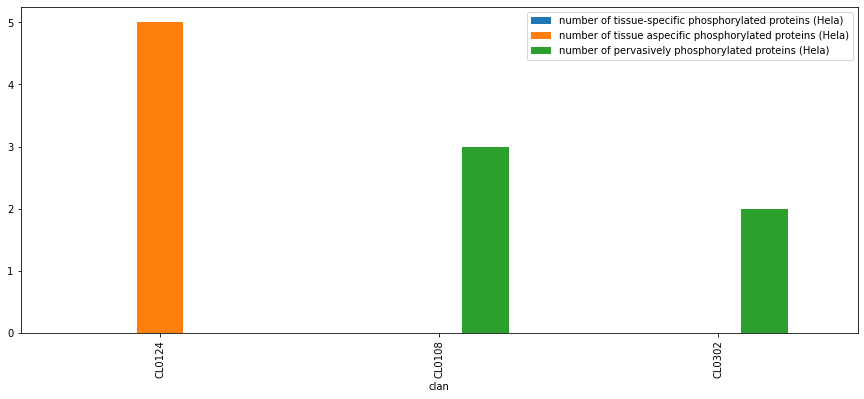

In [95]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Hela"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Hela)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Hela"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Hela)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Hela"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Hela)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Hela)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Hela)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Hela)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

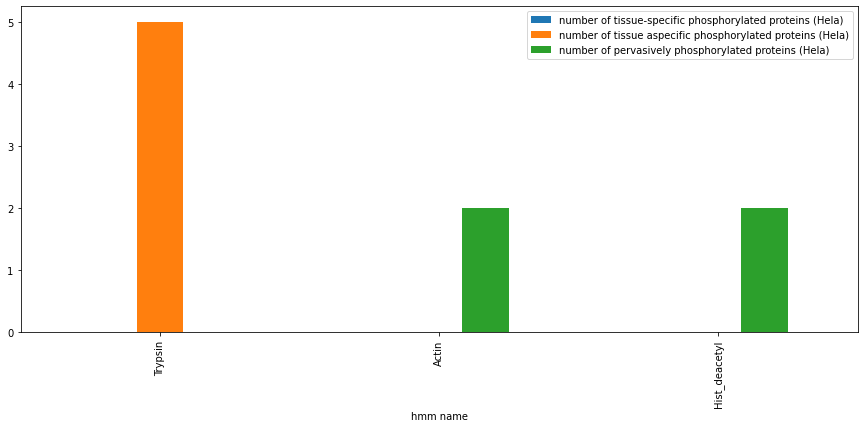

In [96]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Hela"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Hela)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Hela"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Hela)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Hela"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Hela)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Hela)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Hela)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Hela)"]>1))].plot(kind="bar", figsize=(15,6))

## Kidney

<AxesSubplot:xlabel='clan'>

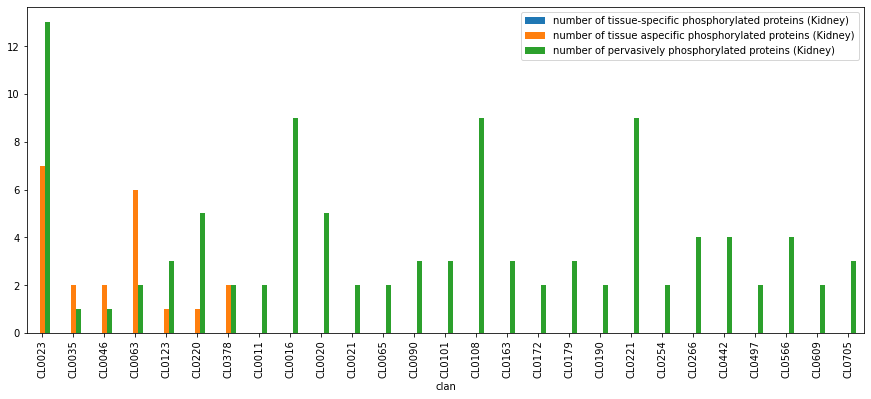

In [97]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Kidney"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Kidney"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Kidney"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Kidney)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Kidney)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Kidney)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

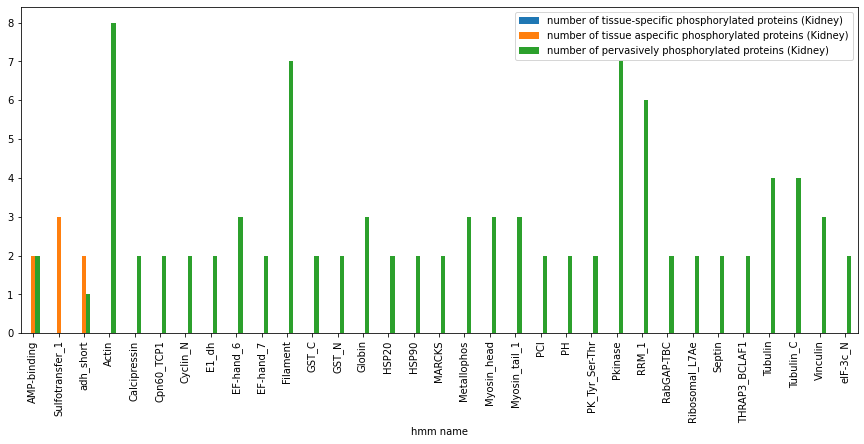

In [98]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Kidney"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Kidney"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Kidney"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Kidney)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Kidney)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Kidney)"]>1))].plot(kind="bar", figsize=(15,6))

## Liver

<AxesSubplot:xlabel='clan'>

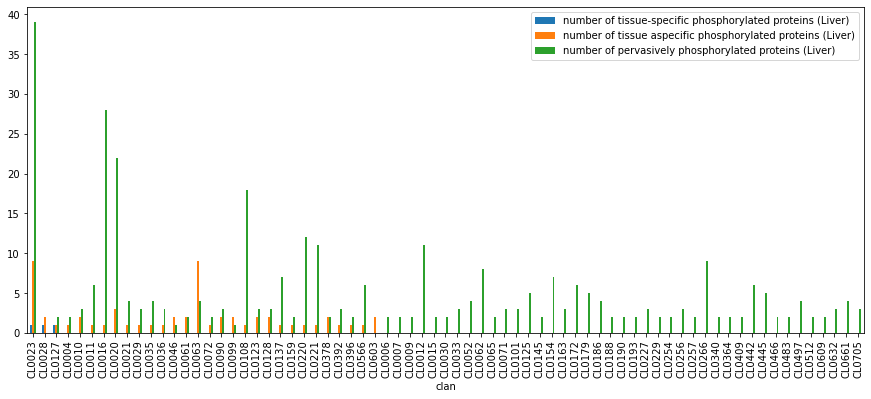

In [99]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Liver)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Liver)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Liver)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

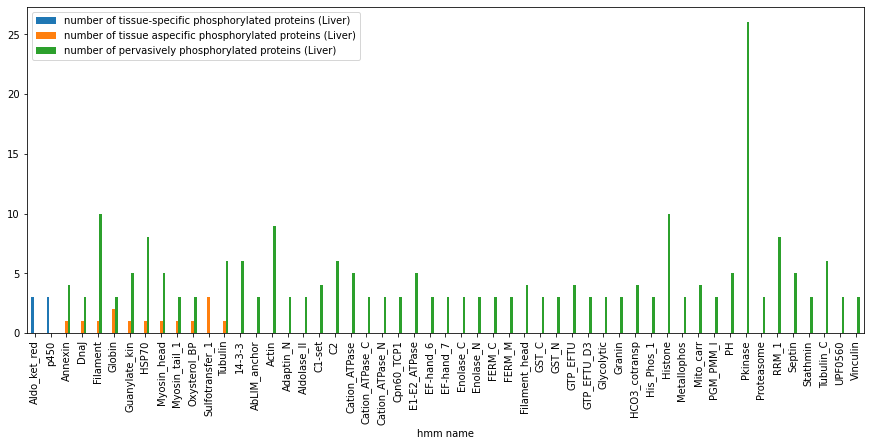

In [100]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Liver)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Liver)"]>2)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Liver)"]>2))].plot(kind="bar", figsize=(15,6))

## Lung

<AxesSubplot:xlabel='clan'>

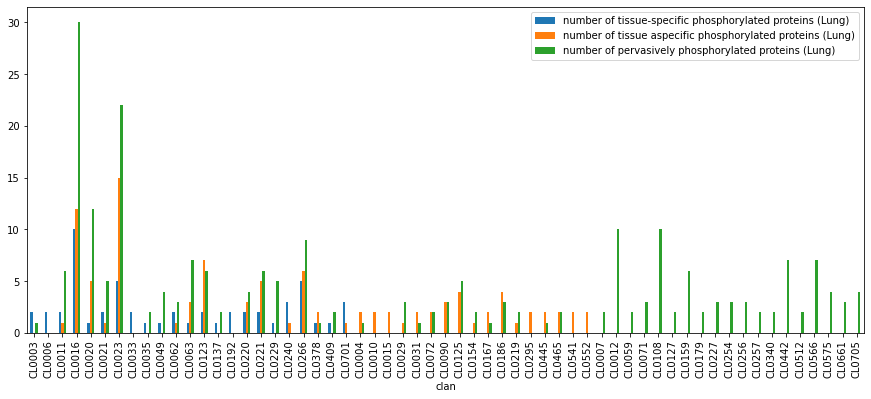

In [101]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Lung)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Lung)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Lung)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

## Lymph node

<AxesSubplot:xlabel='clan'>

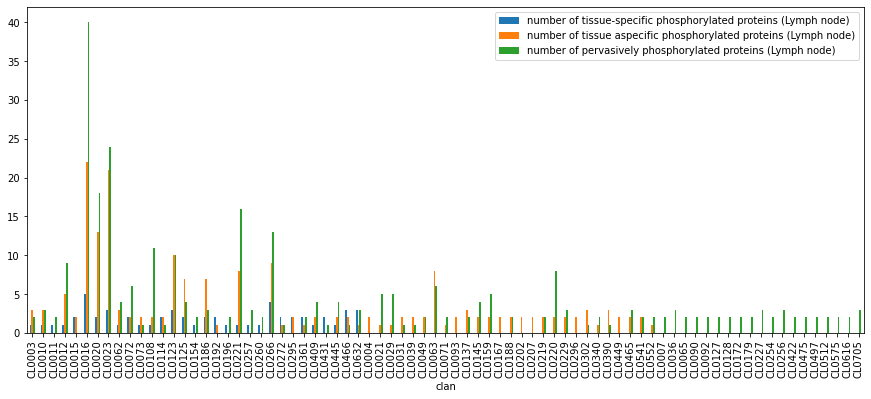

In [102]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Lymph node)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Lymph node)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Lymph node)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

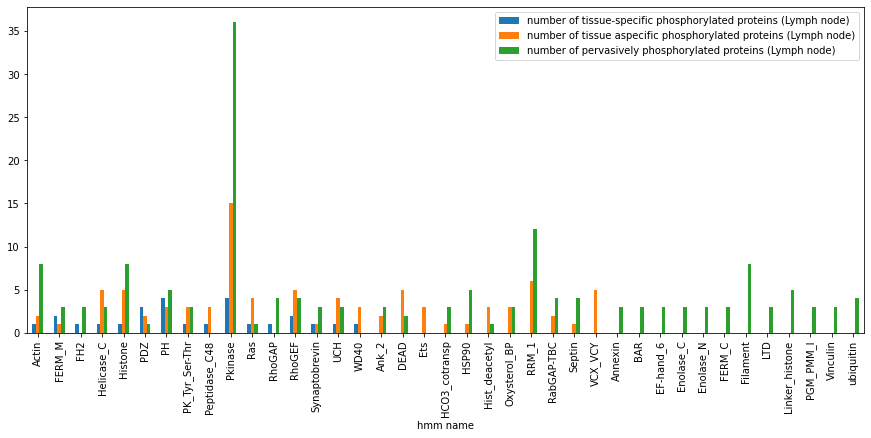

In [103]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Lymph node)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Lymph node)"]>2)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Lymph node)"]>2))].plot(kind="bar", figsize=(15,6))

## Menstrual fluid

In [104]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Menstrual fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Menstrual fluid)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Menstrual fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Menstrual fluid)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Menstrual fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Menstrual fluid)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Menstrual fluid)"]>1)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Menstrual fluid)"]>1)|
                 #(df_clan_all_tissue["number of pervasively phosphorylated proteins (Menstrual fluid)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphorylated proteins (Menstrual fluid)  \
clan                                                                           
CL0011                                                 1.0                     
CL0029                                                 NaN                     
CL0090                                                 NaN                     
CL0128                                                 NaN                     
No_clan                                                NaN                     

         number of tissue aspecific phosphorylated proteins (Menstrual fluid)  \
clan                                                                            
CL0011                                                 NaN                      
CL0029                                                 NaN                      
CL0090                                                 NaN                      
CL0128                                                 NaN                      
No_clan                                                NaN                      

         number of pervasively phosphorylated proteins (Menstrual fluid)  
clan                                                                      
CL0011                                                   1                
CL0029                                                   1                
CL0090                                                   1                
CL0128                                                   1                
No_clan                                                  2

In [105]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Menstrual fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Menstrual fluid)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Menstrual fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Menstrual fluid)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Menstrual fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Menstrual fluid)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue#[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Menstrual fluid)"]>1)|
                 #(df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Menstrual fluid)"]>1)|
                 #(df_hmm_all_tissue["number of pervasively phosphorylated proteins (Menstrual fluid)"]>1))].plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphorylated proteins (Menstrual fluid)  \
hmm name                                                                        
V-set                                                   1.0                     
C1-set                                                  NaN                     
Globin                                                  NaN                     
ITI_HC_C                                                NaN                     
Serpin                                                  NaN                     
VIT                                                     NaN                     
VWA                                                     NaN                     

          number of tissue aspecific phosphorylated proteins (Menstrual fluid)  \
hmm name                                                                         
V-set                                                   NaN                      
C1-set                                                  NaN                      
Globin                                                  NaN                      
ITI_HC_C                                                NaN                      
Serpin                                                  NaN                      
VIT                                                     NaN                      
VWA                                                     NaN                      

          number of pervasively phosphorylated proteins (Menstrual fluid)  
hmm name                                                                   
V-set                                                   NaN                
C1-set                                                  1.0                
Globin                                                  1.0                
ITI_HC_C                                                1.0                
Serpin                                                  1.0                
VIT                                                     1.0                
VWA                                                     1.0

## Monocytes

<AxesSubplot:xlabel='clan'>

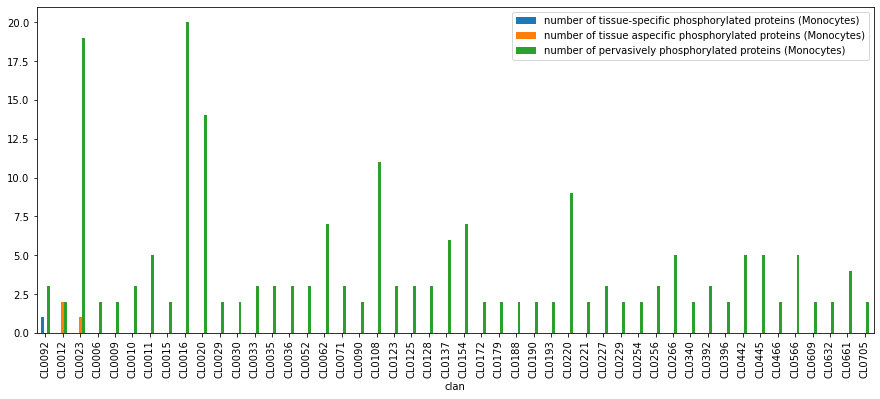

In [106]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Monocytes)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Monocytes)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Monocytes)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

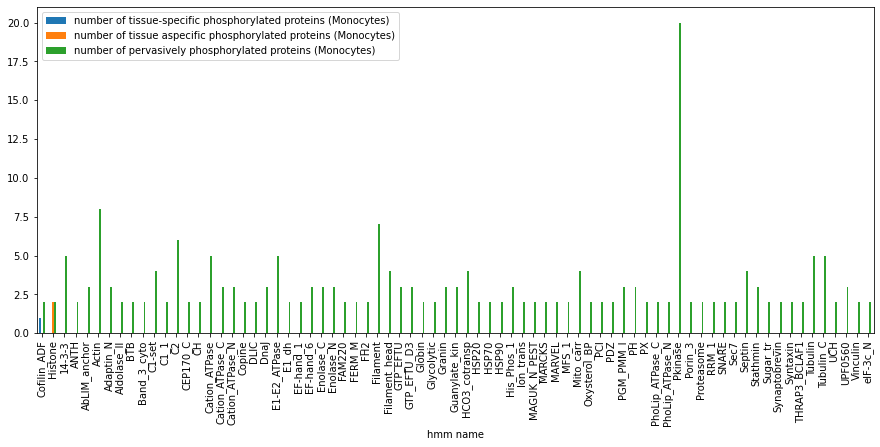

In [107]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Monocytes)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Monocytes)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Monocytes)"]>1))].plot(kind="bar", figsize=(15,6))

## Nasal polyps

<AxesSubplot:xlabel='clan'>

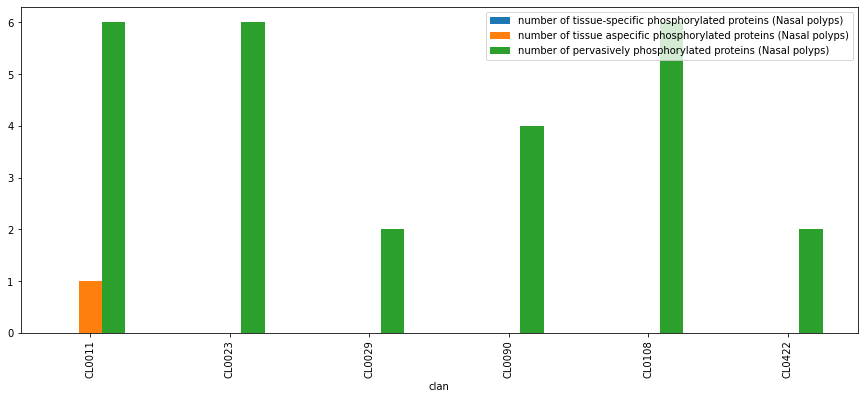

In [108]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Nasal polyps"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Nasal polyps)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Nasal polyps"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Nasal polyps)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Nasal polyps"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Nasal polyps)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Nasal polyps)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Nasal polyps)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Nasal polyps)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

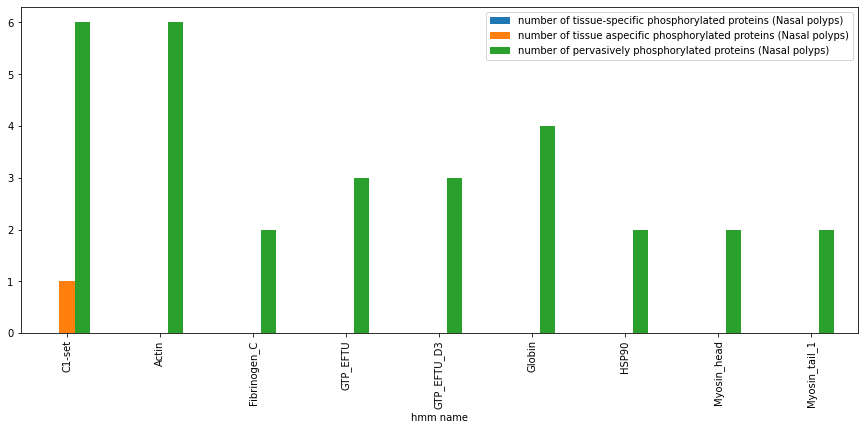

In [109]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Nasal polyps"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Nasal polyps)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Nasal polyps"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Nasal polyps)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Nasal polyps"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Nasal polyps)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Nasal polyps)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Nasal polyps)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Nasal polyps)"]>1))].plot(kind="bar", figsize=(15,6))

## NK-cells

<AxesSubplot:xlabel='clan'>

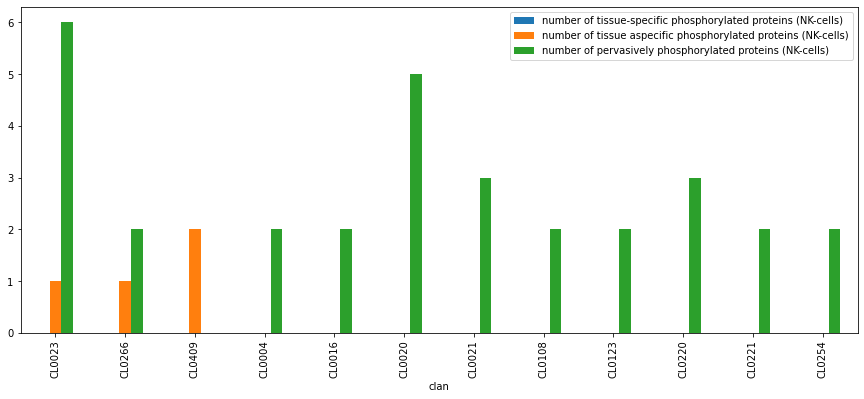

In [110]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["NK-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (NK-cells)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["NK-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (NK-cells)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["NK-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (NK-cells)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (NK-cells)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (NK-cells)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (NK-cells)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

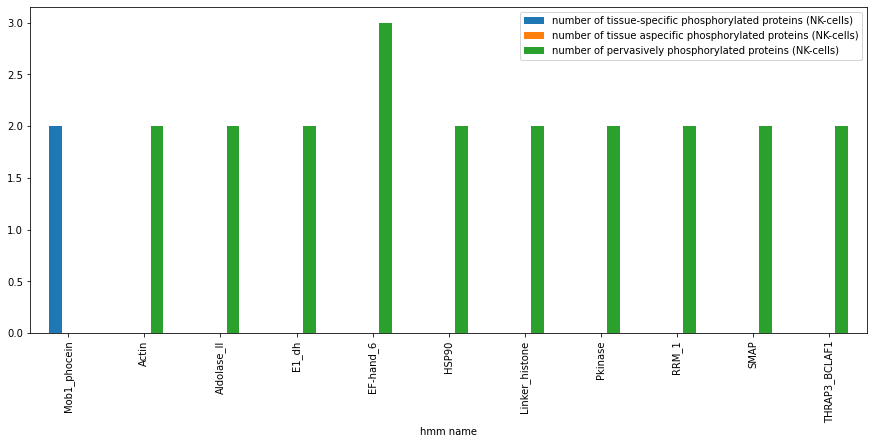

In [111]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["NK-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (NK-cells)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["NK-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (NK-cells)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["NK-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (NK-cells)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (NK-cells)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (NK-cells)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (NK-cells)"]>1))].plot(kind="bar", figsize=(15,6))

## Ovary

<AxesSubplot:xlabel='clan'>

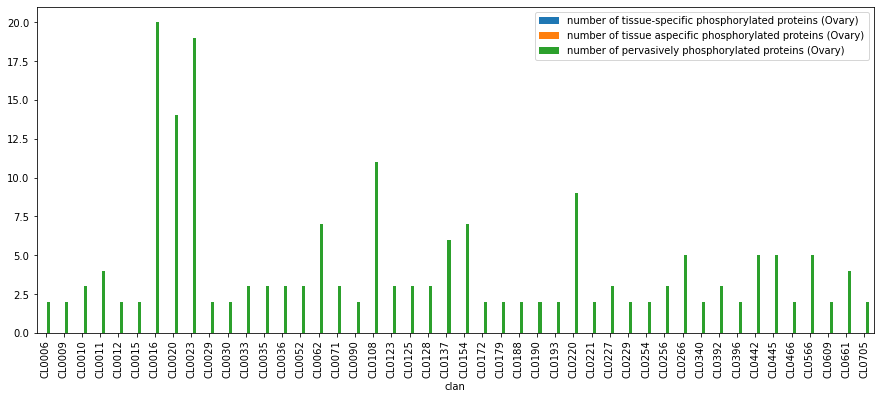

In [112]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Ovary)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Ovary)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Ovary)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

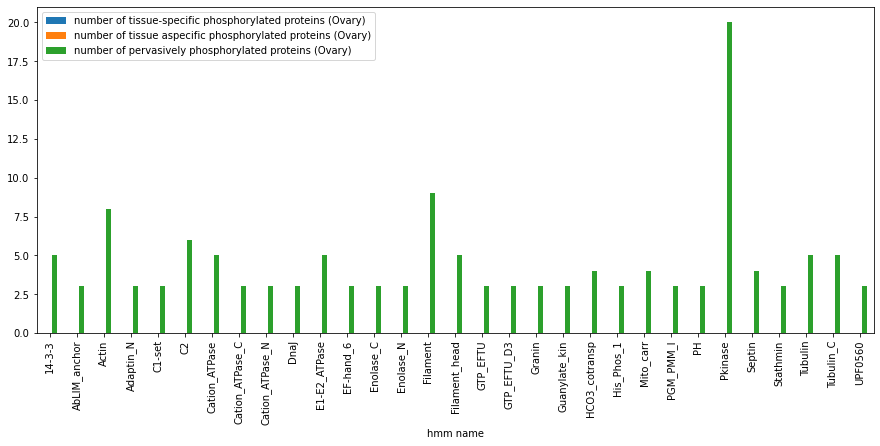

In [113]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Ovary)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Ovary)"]>2)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Ovary)"]>2))].plot(kind="bar", figsize=(15,6))

## Pancreas

<AxesSubplot:xlabel='clan'>

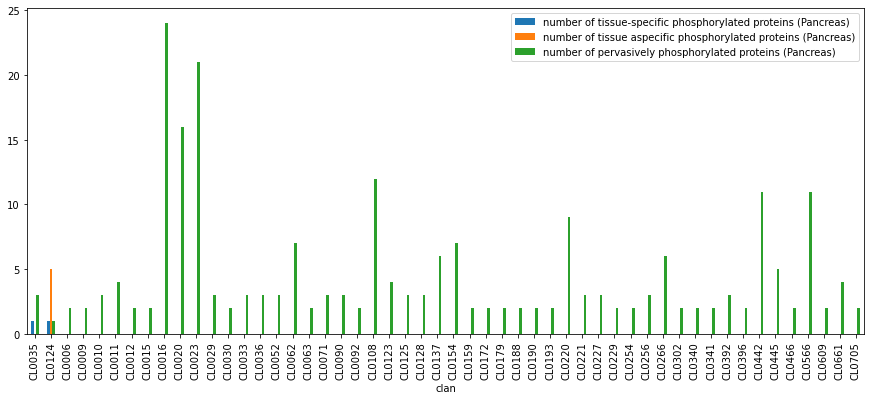

In [114]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Pancreas)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Pancreas)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Pancreas)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

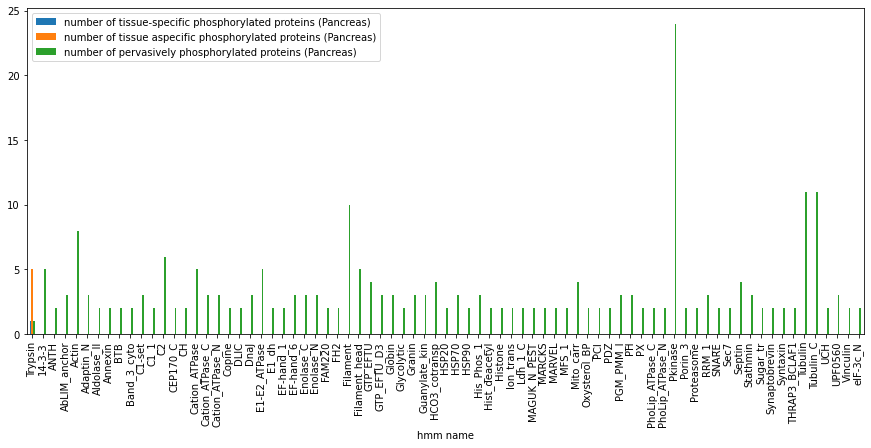

In [115]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Pancreas)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Pancreas)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Pancreas)"]>1))].plot(kind="bar", figsize=(15,6))

## Palatine tonsils

<AxesSubplot:xlabel='clan'>

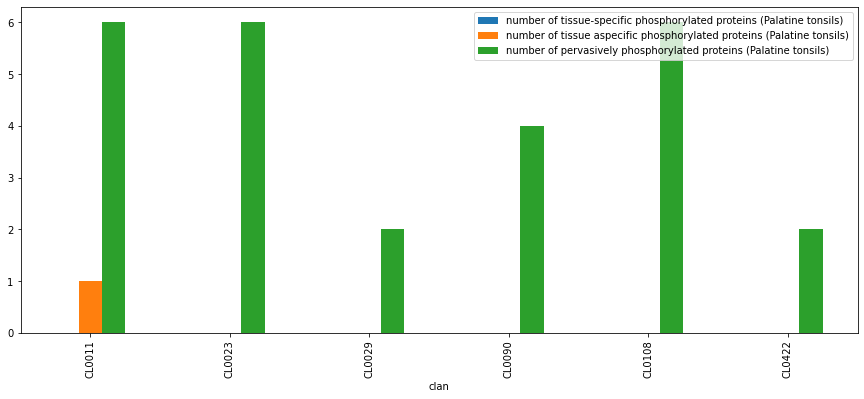

In [116]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Palatine tonsils"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Palatine tonsils)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Palatine tonsils"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Palatine tonsils)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Palatine tonsils"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Palatine tonsils)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Palatine tonsils)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Palatine tonsils)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Palatine tonsils)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

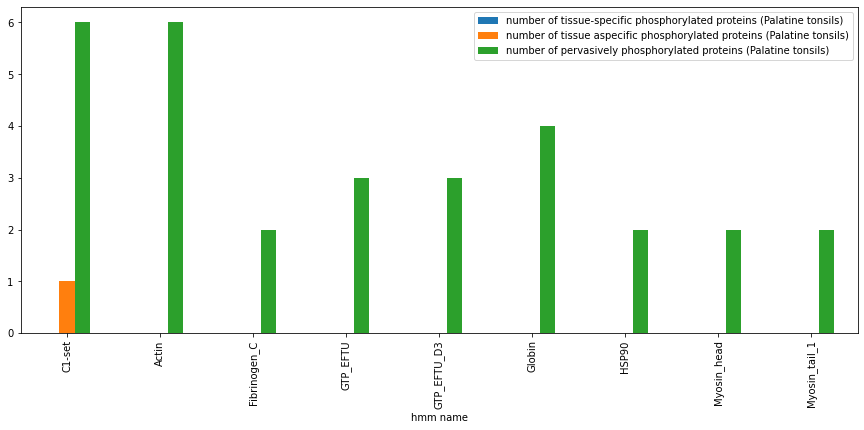

In [117]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Palatine tonsils"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Palatine tonsils)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Palatine tonsils"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Palatine tonsils)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Palatine tonsils"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Palatine tonsils)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Palatine tonsils)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Palatine tonsils)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Palatine tonsils)"]>1))].plot(kind="bar", figsize=(15,6))

## Parotid gland

<AxesSubplot:xlabel='clan'>

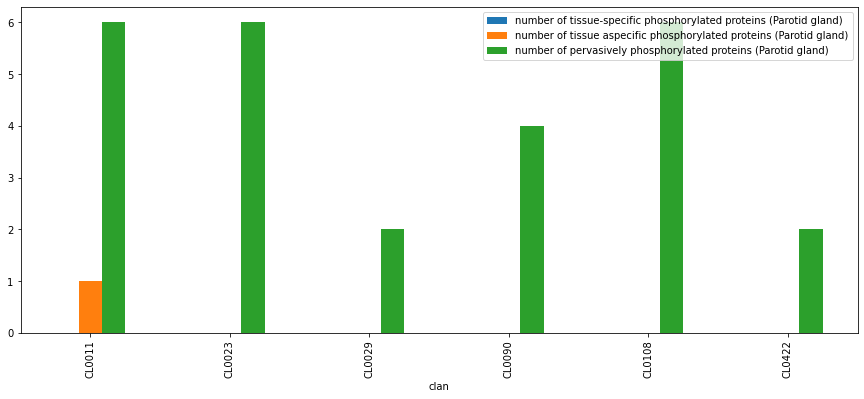

In [118]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Parotid gland"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Parotid gland)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Parotid gland"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Parotid gland)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Parotid gland"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Parotid gland)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Parotid gland)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Parotid gland)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Parotid gland)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

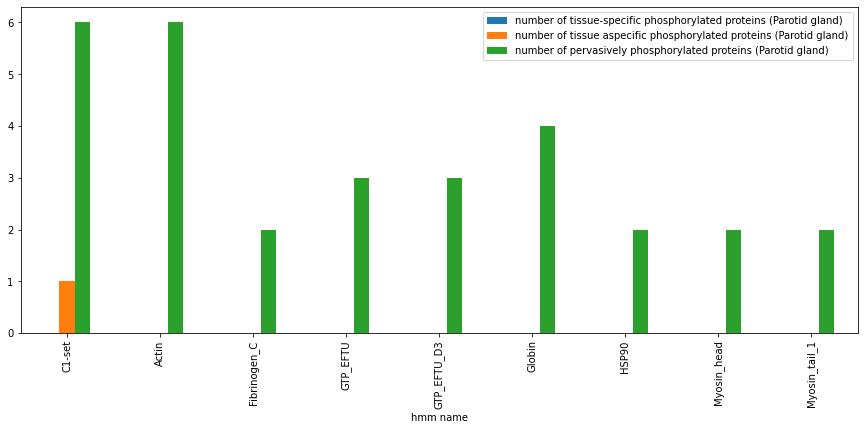

In [119]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Parotid gland"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Parotid gland)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Parotid gland"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Parotid gland)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Parotid gland"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Parotid gland)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Parotid gland)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Parotid gland)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Parotid gland)"]>1))].plot(kind="bar", figsize=(15,6))

## PBMC

<AxesSubplot:xlabel='clan'>

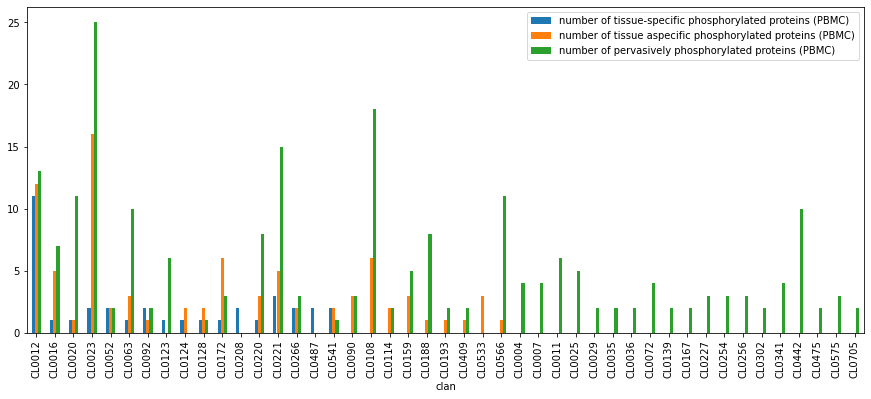

In [120]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (PBMC)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (PBMC)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (PBMC)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

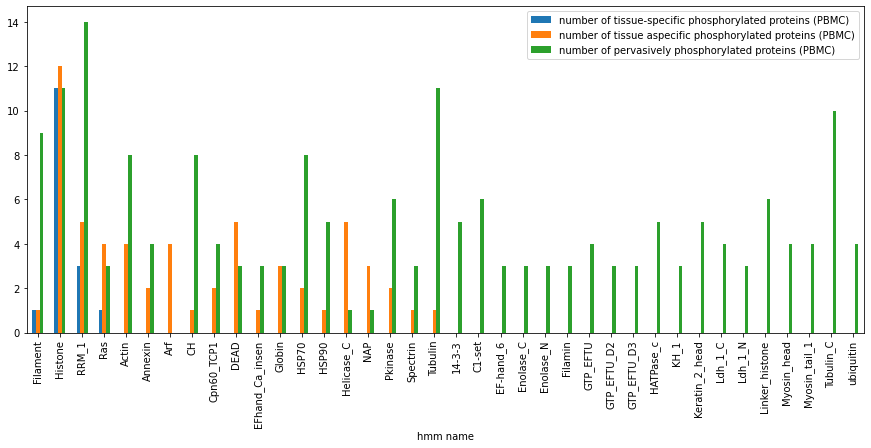

In [121]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (PBMC)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (PBMC)"]>2)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (PBMC)"]>2))].plot(kind="bar", figsize=(15,6))

## Peritoneal dialysis fluid

In [122]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue

number of tissue-specific phosphorylated proteins (Peritoneal dialysis fluid)  \
clan                                                                                     
No_clan                                                NaN                               

         number of tissue aspecific phosphorylated proteins (Peritoneal dialysis fluid)  \
clan                                                                                      
No_clan                                                NaN                                

         number of pervasively phosphorylated proteins (Peritoneal dialysis fluid)  
clan                                                                                
No_clan                                                  1

In [123]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue

number of tissue-specific phosphorylated proteins (Peritoneal dialysis fluid)  \
hmm name                                                                                        
Filament                                                      NaN                               
Keratin_2_head                                                NaN                               
Keratin_2_tail                                                NaN                               

                number of tissue aspecific phosphorylated proteins (Peritoneal dialysis fluid)  \
hmm name                                                                                         
Filament                                                      NaN                                
Keratin_2_head                                                NaN                                
Keratin_2_tail                                                NaN                                

                number of pervasively phosphorylated proteins (Peritoneal dialysis fluid)  
hmm name                                                                                   
Filament                                                        1                          
Keratin_2_head                                                  1                          
Keratin_2_tail                                                  1

## Placenta

<AxesSubplot:xlabel='clan'>

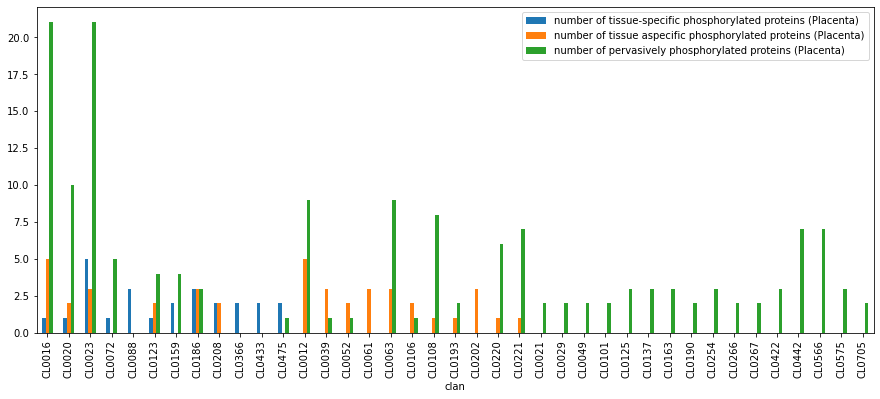

In [124]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Placenta)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Placenta)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Placenta)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

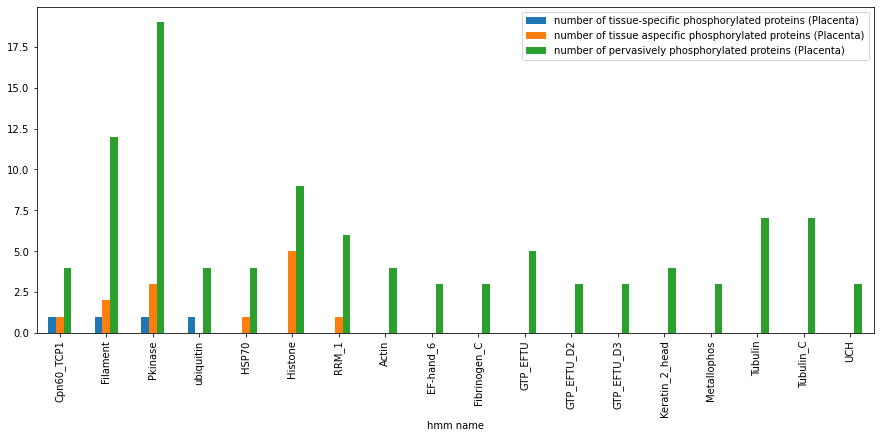

In [125]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Placenta)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Placenta)"]>2)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Placenta)"]>2))].plot(kind="bar", figsize=(15,6))

## Skeletal muscle

<AxesSubplot:xlabel='clan'>

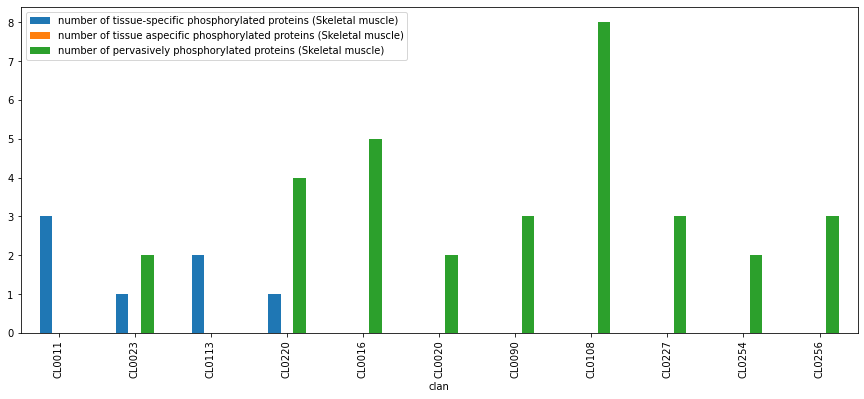

In [126]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Skeletal muscle"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Skeletal muscle"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Skeletal muscle"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Skeletal muscle)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Skeletal muscle)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Skeletal muscle)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

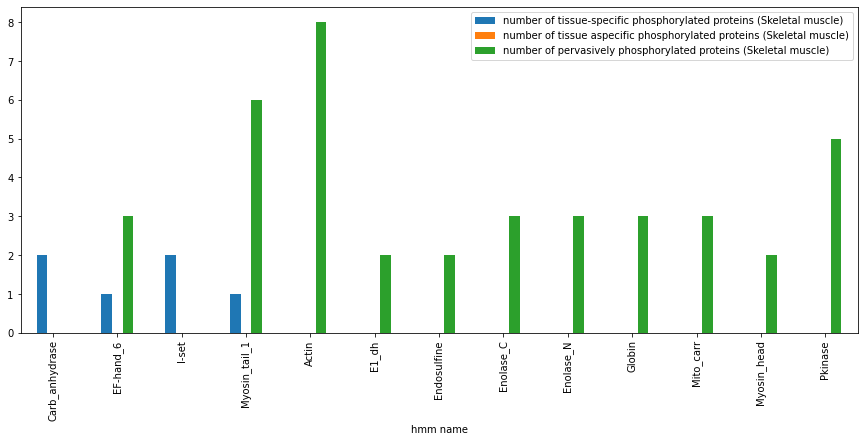

In [127]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Skeletal muscle"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Skeletal muscle"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Skeletal muscle"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Skeletal muscle)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Skeletal muscle)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Skeletal muscle)"]>1))].plot(kind="bar", figsize=(15,6))

## Skin

<AxesSubplot:xlabel='clan'>

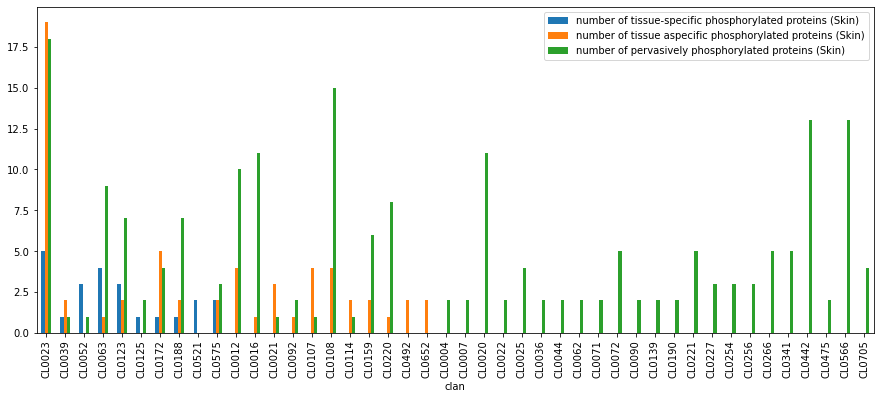

In [128]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Skin)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Skin)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Skin)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

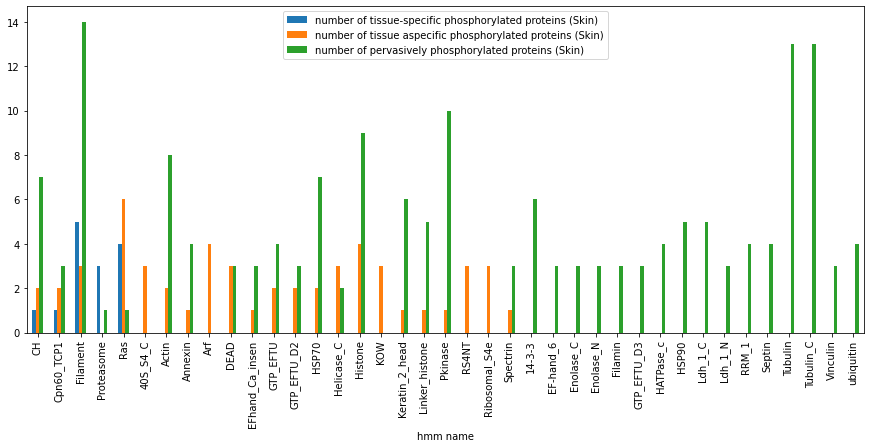

In [129]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Skin)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Skin)"]>2)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Skin)"]>2))].plot(kind="bar", figsize=(15,6))

## Small intestine

<AxesSubplot:xlabel='clan'>

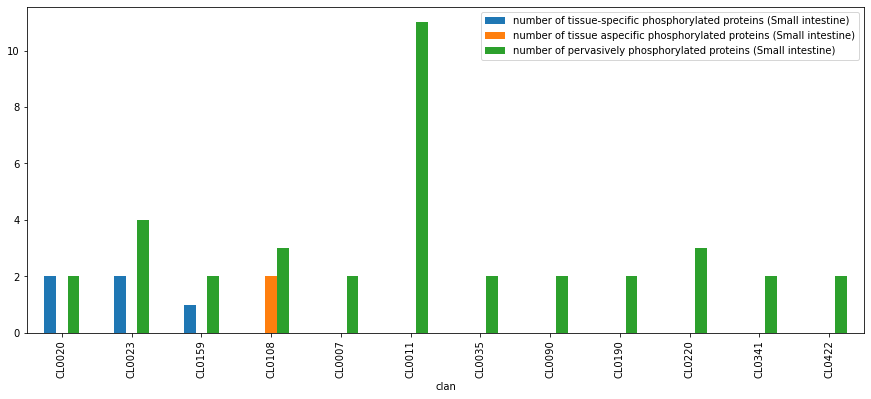

In [130]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Small intestine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Small intestine)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Small intestine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Small intestine)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Small intestine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Small intestine)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Small intestine)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Small intestine)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Small intestine)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

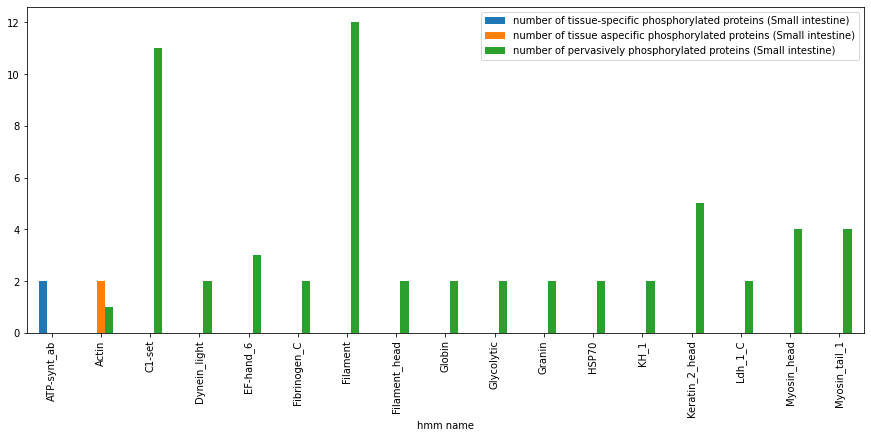

In [131]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Small intestine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Small intestine)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Small intestine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Small intestine)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Small intestine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Small intestine)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Small intestine)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Small intestine)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Small intestine)"]>1))].plot(kind="bar", figsize=(15,6))

## Synovial tissue

In [132]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Synovial tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Synovial tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Synovial tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Synovial tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Synovial tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Synovial tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Synovial tissue)"]>1)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Synovial tissue)"]>1)|
                 #(df_clan_all_tissue["number of pervasively phosphorylated proteins (Synovial tissue)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphorylated proteins (Synovial tissue)  \
clan                                                                           
CL0029                                                 NaN                     
CL0128                                                 NaN                     
CL0422                                                 NaN                     
No_clan                                                NaN                     

         number of tissue aspecific phosphorylated proteins (Synovial tissue)  \
clan                                                                            
CL0029                                                 NaN                      
CL0128                                                 NaN                      
CL0422                                                 NaN                      
No_clan                                                NaN                      

         number of pervasively phosphorylated proteins (Synovial tissue)  
clan                                                                      
CL0029                                                   1                
CL0128                                                   1                
CL0422                                                   1                
No_clan                                                  2

In [133]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Synovial tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Synovial tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Synovial tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Synovial tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Synovial tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Synovial tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue

number of tissue-specific phosphorylated proteins (Synovial tissue)  \
hmm name                                                                            
Fibrinogen_C                                                NaN                     
ITI_HC_C                                                    NaN                     
Serpin                                                      NaN                     
VIT                                                         NaN                     
VWA                                                         NaN                     

              number of tissue aspecific phosphorylated proteins (Synovial tissue)  \
hmm name                                                                             
Fibrinogen_C                                                NaN                      
ITI_HC_C                                                    NaN                      
Serpin                                                      NaN                      
VIT                                                         NaN                      
VWA                                                         NaN                      

              number of pervasively phosphorylated proteins (Synovial tissue)  
hmm name                                                                       
Fibrinogen_C                                                  1                
ITI_HC_C                                                      1                
Serpin                                                        1                
VIT                                                           1                
VWA                                                           1

## T-cells

In [134]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["T-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (T-cells)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["T-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (T-cells)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["T-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (T-cells)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (T-cells)"]>1)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (T-cells)"]>1)|
                 #(df_clan_all_tissue["number of pervasively phosphorylated proteins (T-cells)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphorylated proteins (T-cells)  \
clan                                                                  
CL0035                                                NaN             
CL0705                                                NaN             

        number of tissue aspecific phosphorylated proteins (T-cells)  \
clan                                                                   
CL0035                                                1.0              
CL0705                                                NaN              

        number of pervasively phosphorylated proteins (T-cells)  
clan                                                             
CL0035                                                NaN        
CL0705                                                2.0

<AxesSubplot:xlabel='hmm name'>

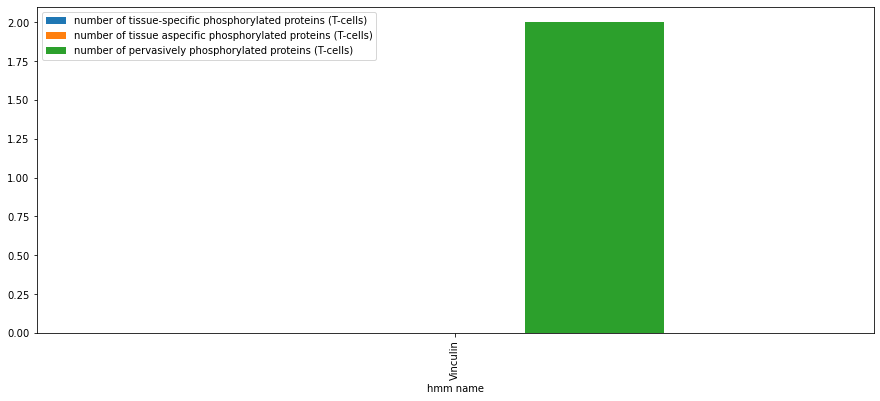

In [135]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["T-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (T-cells)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["T-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (T-cells)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["T-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (T-cells)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (T-cells)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (T-cells)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (T-cells)"]>1))].plot(kind="bar", figsize=(15,6))

## Testis

<AxesSubplot:xlabel='clan'>

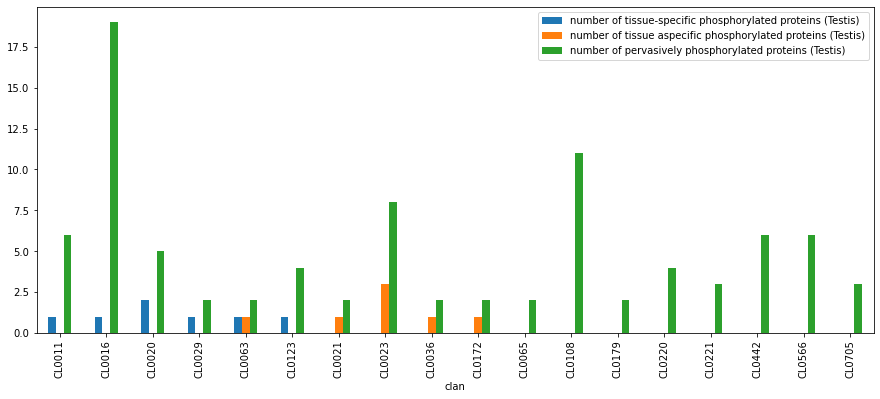

In [136]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Testis"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Testis"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Testis"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Testis)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Testis)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Testis)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

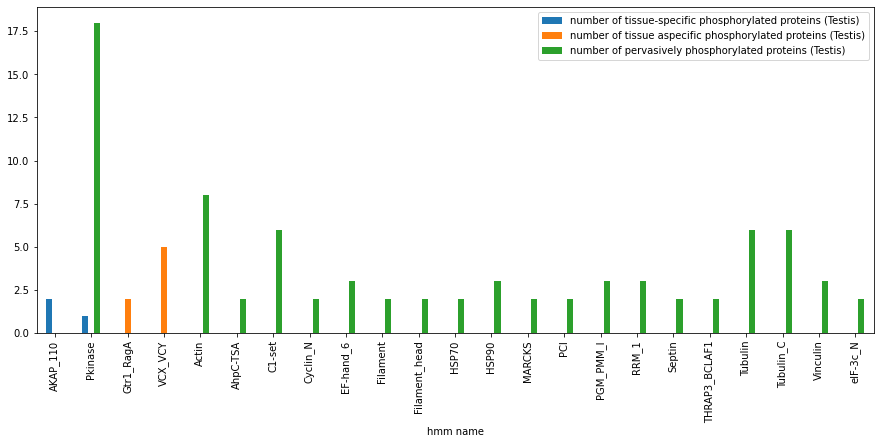

In [137]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Testis"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Testis"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Testis"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Testis)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Testis)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Testis)"]>1))].plot(kind="bar", figsize=(15,6))

## Tooth

In [138]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Tooth"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Tooth)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Tooth"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Tooth)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Tooth"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Tooth)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Tooth)"]>1)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Tooth)"]>1)|
                 #(df_clan_all_tissue["number of pervasively phosphorylated proteins (Tooth)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

Empty DataFrame
Columns: [number of tissue-specific phosphorylated proteins (Tooth), number of tissue aspecific phosphorylated proteins (Tooth), number of pervasively phosphorylated proteins (Tooth)]
Index: []

In [139]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Tooth"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Tooth)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Tooth"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Tooth)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Tooth"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Tooth)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue

Empty DataFrame
Columns: [number of tissue-specific phosphorylated proteins (Tooth), number of tissue aspecific phosphorylated proteins (Tooth), number of pervasively phosphorylated proteins (Tooth)]
Index: []

## Umbilical cord

<AxesSubplot:xlabel='clan'>

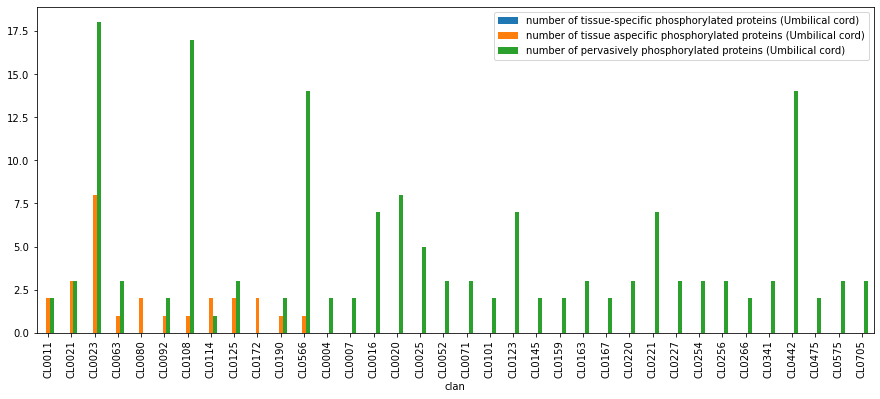

In [140]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Umbilical cord"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Umbilical cord"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Umbilical cord"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Umbilical cord)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Umbilical cord)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Umbilical cord)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

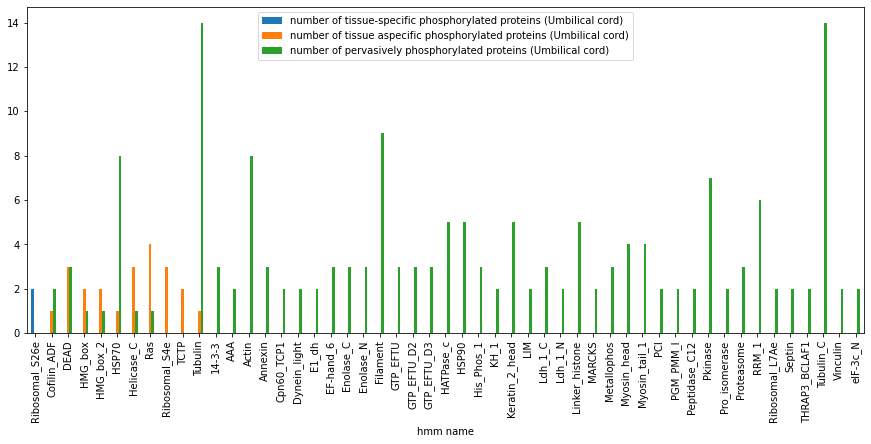

In [141]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Umbilical cord"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Umbilical cord"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Umbilical cord"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Umbilical cord)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Umbilical cord)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Umbilical cord)"]>1))].plot(kind="bar", figsize=(15,6))

## Ureter

In [142]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Ureter"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Ureter)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Ureter"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Ureter)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Ureter"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Ureter)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Ureter)"]>1)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Ureter)"]>1)|
                 #(df_clan_all_tissue["number of pervasively phosphorylated proteins (Ureter)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphorylated proteins (Ureter)  \
clan                                                                  
CL0190                                                 1.0            
No_clan                                                NaN            
CL0023                                                 NaN            
CL0090                                                 NaN            
CL0092                                                 NaN            
CL0159                                                 NaN            
CL0179                                                 NaN            
CL0506                                                 NaN            

         number of tissue aspecific phosphorylated proteins (Ureter)  \
clan                                                                   
CL0190                                                 NaN             
No_clan                                                1.0             
CL0023                                                 NaN             
CL0090                                                 NaN             
CL0092                                                 NaN             
CL0159                                                 NaN             
CL0179                                                 NaN             
CL0506                                                 NaN             

         number of pervasively phosphorylated proteins (Ureter)  
clan                                                             
CL0190                                                   1       
No_clan                                                  4       
CL0023                                                   1       
CL0090                                                   1       
CL0092                                                   1       
CL0159                                                   1       
CL0179                                                   1       
CL0506                                                   1

In [143]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Ureter"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Ureter)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Ureter"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Ureter)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Ureter"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Ureter)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue

number of tissue-specific phosphorylated proteins (Ureter)  \
hmm name                                                                    
HSP20                                                        1.0            
GAGE                                                         NaN            
ATP-grasp_2                                                  NaN            
Filament                                                     NaN            
Filament_head                                                NaN            
Gelsolin                                                     NaN            
Globin                                                       NaN            
LTD                                                          NaN            
Ligase_CoA                                                   NaN            
PTRF_SDPR                                                    NaN            
Septin                                                       NaN            
VHP                                                          NaN            

               number of tissue aspecific phosphorylated proteins (Ureter)  \
hmm name                                                                     
HSP20                                                        NaN             
GAGE                                                         1.0             
ATP-grasp_2                                                  NaN             
Filament                                                     NaN             
Filament_head                                                NaN             
Gelsolin                                                     NaN             
Globin                                                       NaN             
LTD                                                          NaN             
Ligase_CoA                                                   NaN             
PTRF_SDPR                                                    NaN             
Septin                                                       NaN             
VHP                                                          NaN             

               number of pervasively phosphorylated proteins (Ureter)  
hmm name                                                               
HSP20                                                        1.0       
GAGE                                                         NaN       
ATP-grasp_2                                                  1.0       
Filament                                                     2.0       
Filament_head                                                1.0       
Gelsolin                                                     1.0       
Globin                                                       1.0       
LTD                                                          1.0       
Ligase_CoA                                                   1.0       
PTRF_SDPR                                                    1.0       
Septin                                                       1.0       
VHP                                                          1.0

## Urinary bladder

<AxesSubplot:xlabel='clan'>

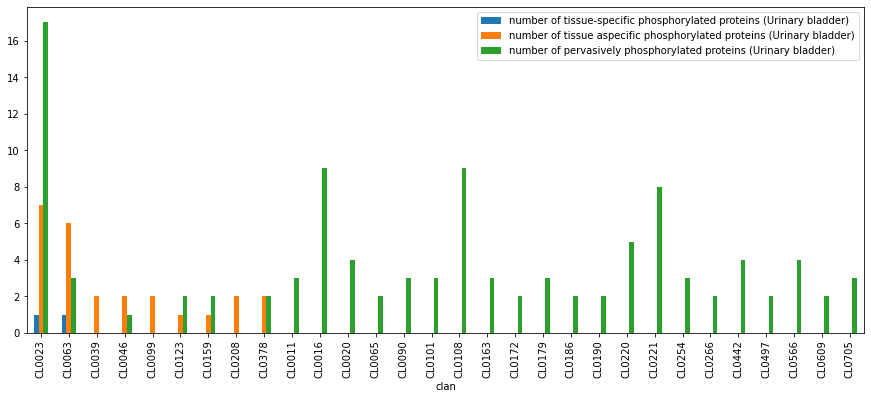

In [144]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Urinary bladder"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Urinary bladder"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Urinary bladder"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Urinary bladder)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Urinary bladder)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Urinary bladder)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

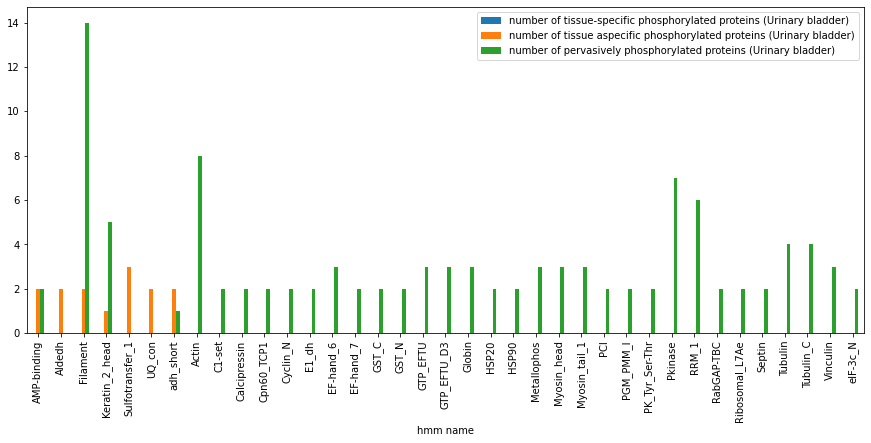

In [145]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Urinary bladder"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Urinary bladder"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Urinary bladder"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Urinary bladder)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Urinary bladder)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Urinary bladder)"]>1))].plot(kind="bar", figsize=(15,6))

## Urine

<AxesSubplot:xlabel='clan'>

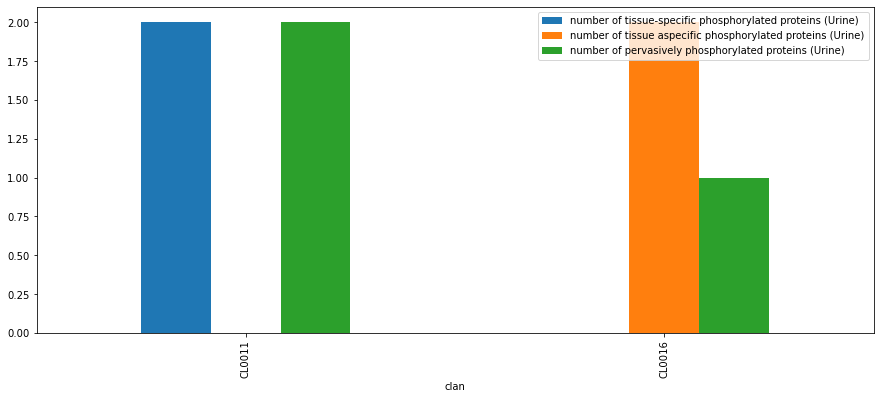

In [146]:
df_clan_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Urine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Urine)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Urine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Urine)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Urine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Urine)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphorylated proteins (Urine)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphorylated proteins (Urine)"]>1)|
                 (df_clan_all_tissue["number of pervasively phosphorylated proteins (Urine)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

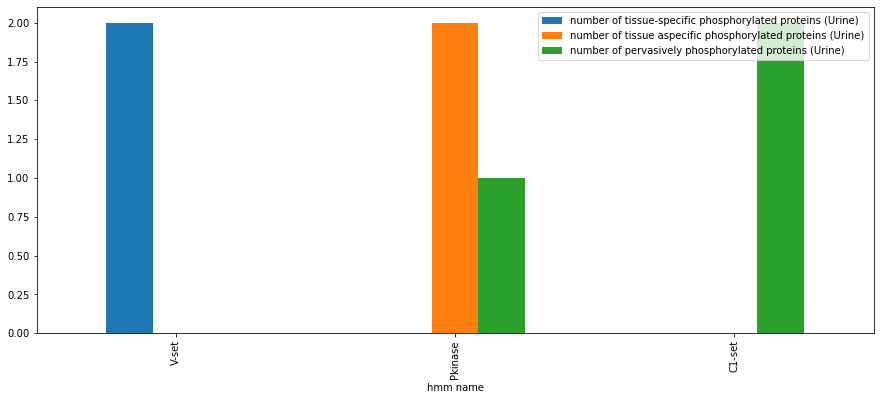

In [147]:
df_hmm_tspec_tissue = tspec_proteins_pfam.loc[tspec_proteins_pfam["Urine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Urine)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_proteins_pfam.loc[taspec_proteins_pfam["Urine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphorylated proteins (Urine)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_proteins_pfam.loc[gen_proteins_pfam["Urine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasively phosphorylated proteins (Urine)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphorylated proteins (Urine)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphorylated proteins (Urine)"]>1)|
                 (df_hmm_all_tissue["number of pervasively phosphorylated proteins (Urine)"]>1))].plot(kind="bar", figsize=(15,6))

# 7. Comparison across tissues

We now aim to identify the clans and domains with the highest ratio per tissue. Ratio is calculated as the amount of proteins associated with a clan/tissue in comparison to the total amount of proteins for which at least one P-site occured in a Pfam annotation. The clans/domains with a ratio higher than 75% of the ratios (distribution) are shown.

## 7.1 Clans

In [148]:
df_clan_tspec_Blood = tspec_proteins_pfam.loc[tspec_proteins_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_clan_tspec_Blood["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Blood"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Blood["ratio of tissue-specific phosphorylated proteins (Blood)"] = df_clan_tspec_Blood["number of tissue-specific phosphorylated proteins (Blood)"]*100/df_clan_tspec_Blood["Total"]
df_clan_tspec_Blood.drop(["number of tissue-specific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_clan_tspec_Blood.set_index(["clan"], inplace=True)
df_clan_tspec_Brain = tspec_proteins_pfam.loc[tspec_proteins_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_clan_tspec_Brain["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Brain"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Brain["ratio of tissue-specific phosphorylated proteins (Brain)"] = df_clan_tspec_Brain["number of tissue-specific phosphorylated proteins (Brain)"]*100/df_clan_tspec_Brain["Total"]
df_clan_tspec_Brain.drop(["number of tissue-specific phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_clan_tspec_Brain.set_index(["clan"], inplace=True)
df_clan_tspec_Cerebrospinal_fluid = tspec_proteins_pfam.loc[tspec_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_tspec_Cerebrospinal_fluid["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Cerebrospinal_fluid["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"] = df_clan_tspec_Cerebrospinal_fluid["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]*100/df_clan_tspec_Cerebrospinal_fluid["Total"]
df_clan_tspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_tspec_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
df_clan_tspec_Colon = tspec_proteins_pfam.loc[tspec_proteins_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_clan_tspec_Colon["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Colon"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Colon["ratio of tissue-specific phosphorylated proteins (Colon)"] = df_clan_tspec_Colon["number of tissue-specific phosphorylated proteins (Colon)"]*100/df_clan_tspec_Colon["Total"]
df_clan_tspec_Colon.drop(["number of tissue-specific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_clan_tspec_Colon.set_index(["clan"], inplace=True)
df_clan_tspec_Liver = tspec_proteins_pfam.loc[tspec_proteins_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_clan_tspec_Liver["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Liver"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Liver["ratio of tissue-specific phosphorylated proteins (Liver)"] = df_clan_tspec_Liver["number of tissue-specific phosphorylated proteins (Liver)"]*100/df_clan_tspec_Liver["Total"]
df_clan_tspec_Liver.drop(["number of tissue-specific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_clan_tspec_Liver.set_index(["clan"], inplace=True)
df_clan_tspec_Lung = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_clan_tspec_Lung["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lung"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Lung["ratio of tissue-specific phosphorylated proteins (Lung)"] = df_clan_tspec_Lung["number of tissue-specific phosphorylated proteins (Lung)"]*100/df_clan_tspec_Lung["Total"]
df_clan_tspec_Lung.drop(["number of tissue-specific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_clan_tspec_Lung.set_index(["clan"], inplace=True)
df_clan_tspec_Lymph_node = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_clan_tspec_Lymph_node["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lymph node"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Lymph_node["ratio of tissue-specific phosphorylated proteins (Lymph node)"] = df_clan_tspec_Lymph_node["number of tissue-specific phosphorylated proteins (Lymph node)"]*100/df_clan_tspec_Lymph_node["Total"]
df_clan_tspec_Lymph_node.drop(["number of tissue-specific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_tspec_Lymph_node.set_index(["clan"], inplace=True)
df_clan_tspec_Monocytes = tspec_proteins_pfam.loc[tspec_proteins_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_clan_tspec_Monocytes["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Monocytes"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Monocytes["ratio of tissue-specific phosphorylated proteins (Monocytes)"] = df_clan_tspec_Monocytes["number of tissue-specific phosphorylated proteins (Monocytes)"]*100/df_clan_tspec_Monocytes["Total"]
df_clan_tspec_Monocytes.drop(["number of tissue-specific phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_tspec_Monocytes.set_index(["clan"], inplace=True)
df_clan_tspec_Ovary = tspec_proteins_pfam.loc[tspec_proteins_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_clan_tspec_Ovary["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Ovary"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Ovary["ratio of tissue-specific phosphorylated proteins (Ovary)"] = df_clan_tspec_Ovary["number of tissue-specific phosphorylated proteins (Ovary)"]*100/df_clan_tspec_Ovary["Total"]
df_clan_tspec_Ovary.drop(["number of tissue-specific phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_clan_tspec_Ovary.set_index(["clan"], inplace=True)
df_clan_tspec_Pancreas = tspec_proteins_pfam.loc[tspec_proteins_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_clan_tspec_Pancreas["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Pancreas"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Pancreas["ratio of tissue-specific phosphorylated proteins (Pancreas)"] = df_clan_tspec_Pancreas["number of tissue-specific phosphorylated proteins (Pancreas)"]*100/df_clan_tspec_Pancreas["Total"]
df_clan_tspec_Pancreas.drop(["number of tissue-specific phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_tspec_Pancreas.set_index(["clan"], inplace=True)
df_clan_tspec_PBMC = tspec_proteins_pfam.loc[tspec_proteins_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_clan_tspec_PBMC["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["PBMC"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_PBMC["ratio of tissue-specific phosphorylated proteins (PBMC)"] = df_clan_tspec_PBMC["number of tissue-specific phosphorylated proteins (PBMC)"]*100/df_clan_tspec_PBMC["Total"]
df_clan_tspec_PBMC.drop(["number of tissue-specific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_clan_tspec_PBMC.set_index(["clan"], inplace=True)
df_clan_tspec_Placenta = tspec_proteins_pfam.loc[tspec_proteins_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_tspec_Placenta["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Placenta"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Placenta["ratio of tissue-specific phosphorylated proteins (Placenta)"] = df_clan_tspec_Placenta["number of tissue-specific phosphorylated proteins (Placenta)"]*100/df_clan_tspec_Placenta["Total"]
df_clan_tspec_Placenta.drop(["number of tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_clan_tspec_Placenta.set_index(["clan"], inplace=True)
df_clan_tspec_Skin = tspec_proteins_pfam.loc[tspec_proteins_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_tspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_clan_tspec_Skin["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Skin"]==1, :]["ACC_ID"].nunique()
df_clan_tspec_Skin["ratio of tissue-specific phosphorylated proteins (Skin)"] = df_clan_tspec_Skin["number of tissue-specific phosphorylated proteins (Skin)"]*100/df_clan_tspec_Skin["Total"]
df_clan_tspec_Skin.drop(["number of tissue-specific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_clan_tspec_Skin.set_index(["clan"], inplace=True)

In [149]:
df_clan_tspec_all = pd.concat([df_clan_tspec_Blood, 
                              df_clan_tspec_Colon, df_clan_tspec_Liver, df_clan_tspec_Lung, df_clan_tspec_Lymph_node,
                              df_clan_tspec_PBMC,
                               df_clan_tspec_Skin], axis=1)
df_clan_tspec_all

ratio of tissue-specific phosphorylated proteins (Blood)  \
clan                                                               
CL0011                                              12.50          
CL0012                                               1.25          
CL0016                                               5.00          
CL0020                                               2.50          
CL0023                                               2.50          
...                                                   ...          
CL0353                                                NaN          
CL0408                                                NaN          
CL0452                                                NaN          
CL0521                                                NaN          
CL0600                                                NaN          

        ratio of tissue-specific phosphorylated proteins (Colon)  \
clan                                                               
CL0011                                                NaN          
CL0012                                           0.574713          
CL0016                                           2.298851          
CL0020                                           2.873563          
CL0023                                           6.896552          
...                                                   ...          
CL0353                                                NaN          
CL0408                                                NaN          
CL0452                                                NaN          
CL0521                                                NaN          
CL0600                                                NaN          

        ratio of tissue-specific phosphorylated proteins (Liver)  \
clan                                                               
CL0011                                                NaN          
CL0012                                                NaN          
CL0016                                                NaN          
CL0020                                                NaN          
CL0023                                           4.761905          
...                                                   ...          
CL0353                                                NaN          
CL0408                                                NaN          
CL0452                                                NaN          
CL0521                                                NaN          
CL0600                                                NaN          

        ratio of tissue-specific phosphorylated proteins (Lung)  \
clan                                                              
CL0011                                               2.50         
CL0012                                                NaN         
CL0016                                              12.50         
CL0020                                               1.25         
CL0023                                               6.25         
...                                                   ...         
CL0353                                                NaN         
CL0408                                                NaN         
CL0452                                                NaN         
CL0521                                                NaN         
CL0600                                                NaN         

        ratio of tissue-specific phosphorylated proteins (Lymph node)  \
clan                                                                    
CL0011                                                1.0               
CL0012                                                1.0               
CL0016                                                5.0               
CL0020                                                2.0               
CL0023                                     

In [150]:
for column in df_clan_tspec_all.columns:
    print(df_clan_tspec_all[column].describe())

count    41.000000
mean      2.865854
std       6.232751
min       1.250000
25%       1.250000
50%       1.250000
75%       2.500000
max      40.000000
Name: ratio of tissue-specific phosphorylated proteins (Blood), dtype: float64
count    72.000000
mean      1.628352
std       5.720352
min       0.574713
25%       0.574713
50%       0.574713
75%       1.149425
max      48.850575
Name: ratio of tissue-specific phosphorylated proteins (Colon), dtype: float64
count    12.000000
mean      8.730159
std      13.746435
min       4.761905
25%       4.761905
50%       4.761905
75%       4.761905
max      52.380952
Name: ratio of tissue-specific phosphorylated proteins (Liver), dtype: float64
count    45.000000
mean      2.888889
std       5.453980
min       1.250000
25%       1.250000
50%       1.250000
75%       2.500000
max      36.250000
Name: ratio of tissue-specific phosphorylated proteins (Lung), dtype: float64
count    57.000000
mean      2.245614
std       5.959029
min       1.000000
2

<AxesSubplot:title={'center':'Number of tissue-specific phosphoryalted proteins in a tissue having phosphosites in a clan for clans highly associated with a specific tissue'}, xlabel='clan'>

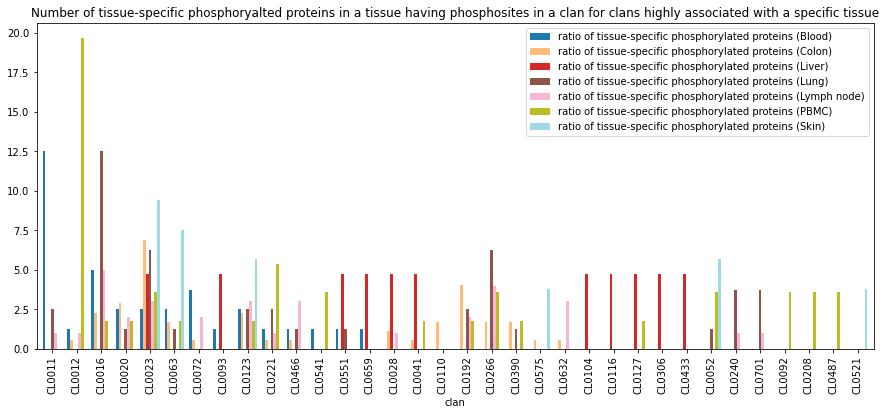

In [151]:
df_clan_tspec_all[(df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Blood)"]>2.5)|
                 #(df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Brain)"]>8.33)|
                 #(df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]>5)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Colon)"]>1.15)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Liver)"]>4.76)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Lung)"]>2.5)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Lymph node)"]>2)|
                 #(df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Monocytes)"]>20)|
                 #(df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Ovary)"]>2)|
                 #(df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Pancreas)"]>25)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (PBMC)"]>3.57)|
                 #(df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Placenta)"]>1.15)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Skin)"]>3.77)].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8, title="Number of tissue-specific phosphoryalted proteins in a tissue having phosphosites in a clan for clans highly associated with a specific tissue")

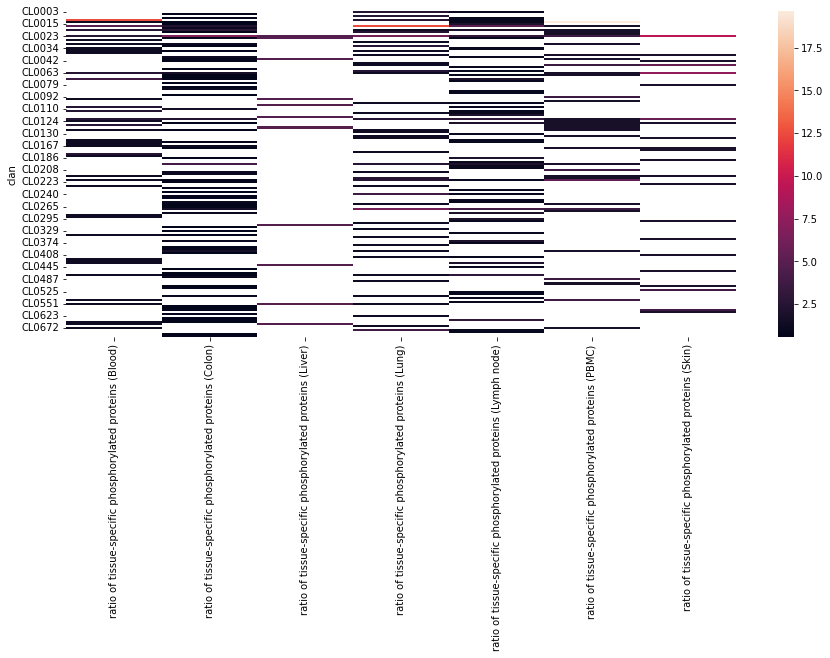

In [152]:
df_clan_tspec_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_tspec_all.drop("No_clan"))
plt.show()

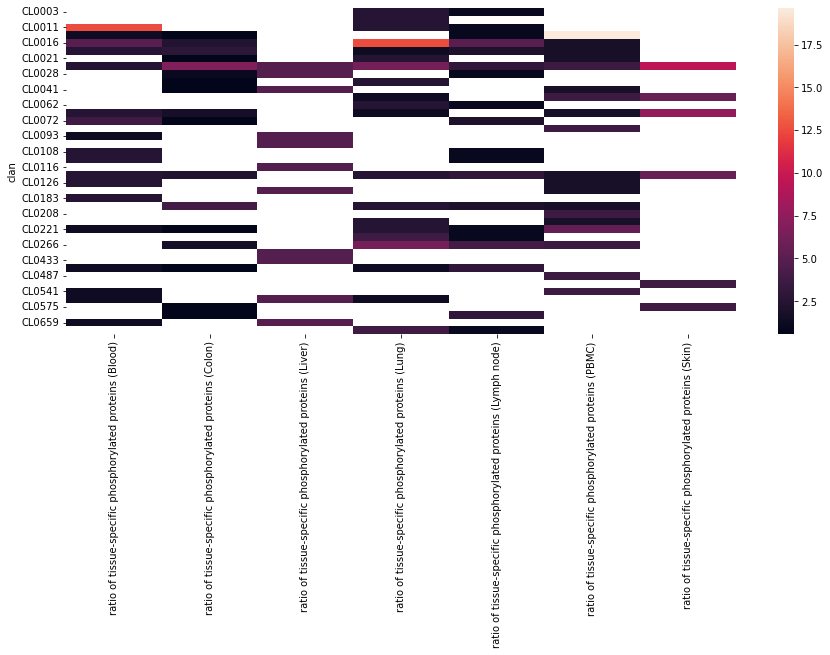

In [153]:
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_tspec_all[(df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Blood)"]>2)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Colon)"]>2)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Liver)"]>2)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Lung)"]>2)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Lymph node)"]>2)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (PBMC)"]>2)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Skin)"]>2)].drop(["No_clan"]))
plt.show()

In [154]:
df_clan_tspec_all[df_clan_tspec_all["ratio of tissue-specific phosphorylated proteins (Lung)"]>20]

ratio of tissue-specific phosphorylated proteins (Blood)  \
clan                                                                
No_clan                                               40.0          

         ratio of tissue-specific phosphorylated proteins (Colon)  \
clan                                                                
No_clan                                          48.850575          

         ratio of tissue-specific phosphorylated proteins (Liver)  \
clan                                                                
No_clan                                          52.380952          

         ratio of tissue-specific phosphorylated proteins (Lung)  \
clan                                                               
No_clan                                              36.25         

         ratio of tissue-specific phosphorylated proteins (Lymph node)  \
clan                                                                     
No_clan                                               46.0               

         ratio of tissue-specific phosphorylated proteins (PBMC)  \
clan                                                               
No_clan                                          19.642857         

         ratio of tissue-specific phosphorylated proteins (Skin)  
clan                                                              
No_clan                                          37.735849

In [155]:
df_clan_taspec_Blood = taspec_proteins_pfam.loc[taspec_proteins_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_clan_taspec_Blood["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Blood"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Blood["ratio of tissue-specific phosphorylated proteins (Blood)"] = df_clan_taspec_Blood["number of tissue-specific phosphorylated proteins (Blood)"]*100/df_clan_taspec_Blood["Total"]
df_clan_taspec_Blood.drop(["number of tissue-specific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_clan_taspec_Blood.set_index(["clan"], inplace=True)
df_clan_taspec_Brain = taspec_proteins_pfam.loc[taspec_proteins_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_clan_taspec_Brain["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Brain"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Brain["ratio of tissue-specific phosphorylated proteins (Brain)"] = df_clan_taspec_Brain["number of tissue-specific phosphorylated proteins (Brain)"]*100/df_clan_taspec_Brain["Total"]
df_clan_taspec_Brain.drop(["number of tissue-specific phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_clan_taspec_Brain.set_index(["clan"], inplace=True)
df_clan_taspec_Cerebrospinal_fluid = taspec_proteins_pfam.loc[taspec_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_taspec_Cerebrospinal_fluid["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Cerebrospinal_fluid["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"] = df_clan_taspec_Cerebrospinal_fluid["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]*100/df_clan_taspec_Cerebrospinal_fluid["Total"]
df_clan_taspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_taspec_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
df_clan_taspec_Colon = taspec_proteins_pfam.loc[taspec_proteins_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_clan_taspec_Colon["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Colon"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Colon["ratio of tissue-specific phosphorylated proteins (Colon)"] = df_clan_taspec_Colon["number of tissue-specific phosphorylated proteins (Colon)"]*100/df_clan_taspec_Colon["Total"]
df_clan_taspec_Colon.drop(["number of tissue-specific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_clan_taspec_Colon.set_index(["clan"], inplace=True)
df_clan_taspec_Liver = taspec_proteins_pfam.loc[taspec_proteins_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_clan_taspec_Liver["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Liver"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Liver["ratio of tissue-specific phosphorylated proteins (Liver)"] = df_clan_taspec_Liver["number of tissue-specific phosphorylated proteins (Liver)"]*100/df_clan_taspec_Liver["Total"]
df_clan_taspec_Liver.drop(["number of tissue-specific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_clan_taspec_Liver.set_index(["clan"], inplace=True)
df_clan_taspec_Lung = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_clan_taspec_Lung["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lung"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Lung["ratio of tissue-specific phosphorylated proteins (Lung)"] = df_clan_taspec_Lung["number of tissue-specific phosphorylated proteins (Lung)"]*100/df_clan_taspec_Lung["Total"]
df_clan_taspec_Lung.drop(["number of tissue-specific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_clan_taspec_Lung.set_index(["clan"], inplace=True)
df_clan_taspec_Lymph_node = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_clan_taspec_Lymph_node["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lymph node"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Lymph_node["ratio of tissue-specific phosphorylated proteins (Lymph node)"] = df_clan_taspec_Lymph_node["number of tissue-specific phosphorylated proteins (Lymph node)"]*100/df_clan_taspec_Lymph_node["Total"]
df_clan_taspec_Lymph_node.drop(["number of tissue-specific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_taspec_Lymph_node.set_index(["clan"], inplace=True)
df_clan_taspec_Monocytes = taspec_proteins_pfam.loc[taspec_proteins_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_clan_taspec_Monocytes["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Monocytes"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Monocytes["ratio of tissue-specific phosphorylated proteins (Monocytes)"] = df_clan_taspec_Monocytes["number of tissue-specific phosphorylated proteins (Monocytes)"]*100/df_clan_taspec_Monocytes["Total"]
df_clan_taspec_Monocytes.drop(["number of tissue-specific phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_taspec_Monocytes.set_index(["clan"], inplace=True)
df_clan_taspec_Ovary = taspec_proteins_pfam.loc[taspec_proteins_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_clan_taspec_Ovary["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Ovary"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Ovary["ratio of tissue-specific phosphorylated proteins (Ovary)"] = df_clan_taspec_Ovary["number of tissue-specific phosphorylated proteins (Ovary)"]*100/df_clan_taspec_Ovary["Total"]
df_clan_taspec_Ovary.drop(["number of tissue-specific phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_clan_taspec_Ovary.set_index(["clan"], inplace=True)
df_clan_taspec_Pancreas = taspec_proteins_pfam.loc[taspec_proteins_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_clan_taspec_Pancreas["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Pancreas"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Pancreas["ratio of tissue-specific phosphorylated proteins (Pancreas)"] = df_clan_taspec_Pancreas["number of tissue-specific phosphorylated proteins (Pancreas)"]*100/df_clan_taspec_Pancreas["Total"]
df_clan_taspec_Pancreas.drop(["number of tissue-specific phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_taspec_Pancreas.set_index(["clan"], inplace=True)
df_clan_taspec_PBMC = taspec_proteins_pfam.loc[taspec_proteins_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_clan_taspec_PBMC["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["PBMC"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_PBMC["ratio of tissue-specific phosphorylated proteins (PBMC)"] = df_clan_taspec_PBMC["number of tissue-specific phosphorylated proteins (PBMC)"]*100/df_clan_taspec_PBMC["Total"]
df_clan_taspec_PBMC.drop(["number of tissue-specific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_clan_taspec_PBMC.set_index(["clan"], inplace=True)
df_clan_taspec_Placenta = taspec_proteins_pfam.loc[taspec_proteins_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_taspec_Placenta["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Placenta"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Placenta["ratio of tissue-specific phosphorylated proteins (Placenta)"] = df_clan_taspec_Placenta["number of tissue-specific phosphorylated proteins (Placenta)"]*100/df_clan_taspec_Placenta["Total"]
df_clan_taspec_Placenta.drop(["number of tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_clan_taspec_Placenta.set_index(["clan"], inplace=True)
df_clan_taspec_Skin = taspec_proteins_pfam.loc[taspec_proteins_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_taspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_clan_taspec_Skin["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Skin"]==1, :]["ACC_ID"].nunique()
df_clan_taspec_Skin["ratio of tissue-specific phosphorylated proteins (Skin)"] = df_clan_taspec_Skin["number of tissue-specific phosphorylated proteins (Skin)"]*100/df_clan_taspec_Skin["Total"]
df_clan_taspec_Skin.drop(["number of tissue-specific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_clan_taspec_Skin.set_index(["clan"], inplace=True)

In [156]:
df_clan_taspec_all = pd.concat([df_clan_taspec_Blood, df_clan_taspec_Brain, df_clan_taspec_Cerebrospinal_fluid,
                              df_clan_taspec_Colon, df_clan_taspec_Liver, df_clan_taspec_Lung, df_clan_taspec_Lymph_node,
                              #df_clan_taspec_Monocytes, df_clan_taspec_Ovary,
                                df_clan_taspec_Pancreas,
                              df_clan_taspec_PBMC, df_clan_taspec_Placenta,
                               df_clan_taspec_Skin], axis=1)
df_clan_taspec_all

ratio of tissue-specific phosphorylated proteins (Blood)  \
clan                                                               
CL0003                                           0.653595          
CL0004                                           0.980392          
CL0005                                           0.326797          
CL0012                                           1.633987          
CL0015                                           0.326797          
...                                                   ...          
CL0433                                                NaN          
CL0452                                                NaN          
CL0575                                                NaN          
CL0666                                                NaN          
CL0721                                                NaN          

        ratio of tissue-specific phosphorylated proteins (Brain)  \
clan                                                               
CL0003                                                NaN          
CL0004                                                NaN          
CL0005                                                NaN          
CL0012                                                NaN          
CL0015                                          11.111111          
...                                                   ...          
CL0433                                                NaN          
CL0452                                                NaN          
CL0575                                                NaN          
CL0666                                                NaN          
CL0721                                                NaN          

        ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)  \
clan                                                                             
CL0003                                                NaN                        
CL0004                                                NaN                        
CL0005                                                NaN                        
CL0012                                                NaN                        
CL0015                                                NaN                        
...                                                   ...                        
CL0433                                                NaN                        
CL0452                                                NaN                        
CL0575                                                NaN                        
CL0666                                                NaN                        
CL0721                                                NaN                        

        ratio of tissue-specific phosphorylated proteins (Colon)  \
clan                                                               
CL0003                                           0.421941          
CL0004                                           0.632911          
CL0005                                           0.210970          
CL0012                                                NaN          
CL0015                                           0.632911          
...                                                   ...          
CL0433                                                NaN          
CL0452                                                NaN          
CL0575                                                NaN          
CL0666                                                NaN          
CL0721                                                NaN          

        ratio of tissue-specific phosphorylated proteins (Liver)  \
clan                                                               
CL0003                                                NaN          
CL0004                                           1.190476          
CL0005        

In [157]:
for column in df_clan_taspec_all.columns:
    print(df_clan_taspec_all[column].describe())

count    94.000000
mean      1.282854
std       5.210330
min       0.326797
25%       0.326797
50%       0.326797
75%       0.653595
max      50.326797
Name: ratio of tissue-specific phosphorylated proteins (Blood), dtype: float64
count    17.000000
mean      7.843137
std       6.820795
min       5.555556
25%       5.555556
50%       5.555556
75%       5.555556
max      33.333333
Name: ratio of tissue-specific phosphorylated proteins (Brain), dtype: float64
count     3.000000
mean     33.333333
std       0.000000
min      33.333333
25%      33.333333
50%      33.333333
75%      33.333333
max      33.333333
Name: ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid), dtype: float64
count    120.000000
mean       1.017932
std        4.754770
min        0.210970
25%        0.210970
50%        0.210970
75%        0.632911
max       51.476793
Name: ratio of tissue-specific phosphorylated proteins (Colon), dtype: float64
count    45.000000
mean      2.619048
std       4.9254

<AxesSubplot:title={'center':'Number of tissue aspecific phosphoryalted proteins in a tissue having phosphosites in a clan for clans highly associated with a specific tissue'}, xlabel='clan'>

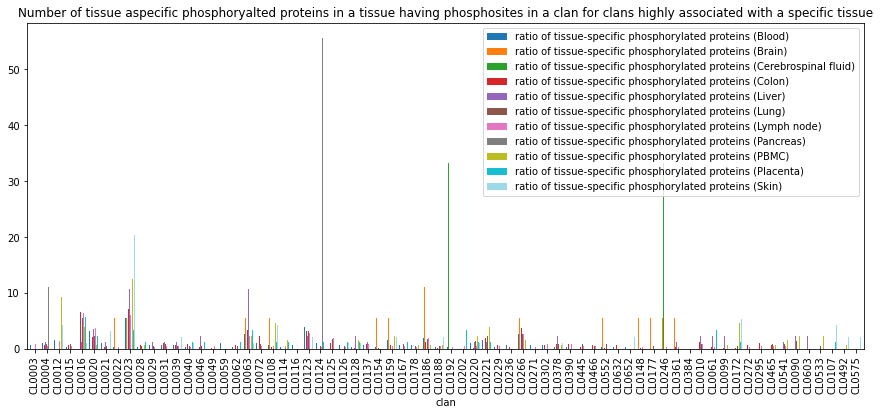

In [158]:
df_clan_taspec_all[(df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Blood)"]>0.65)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Brain)"]>5.55)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]>33.33)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Colon)"]>0.63)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Liver)"]>2.38)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Lung)"]>0.92)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Lymph node)"]>0.58)|
                 #(df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Monocytes)"]>20)|
                 #(df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Ovary)"]>2)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Pancreas)"]>30.56)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (PBMC)"]>1.76)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Placenta)"]>2.3)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Skin)"]>2.15)].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8, title="Number of tissue aspecific phosphoryalted proteins in a tissue having phosphosites in a clan for clans highly associated with a specific tissue")

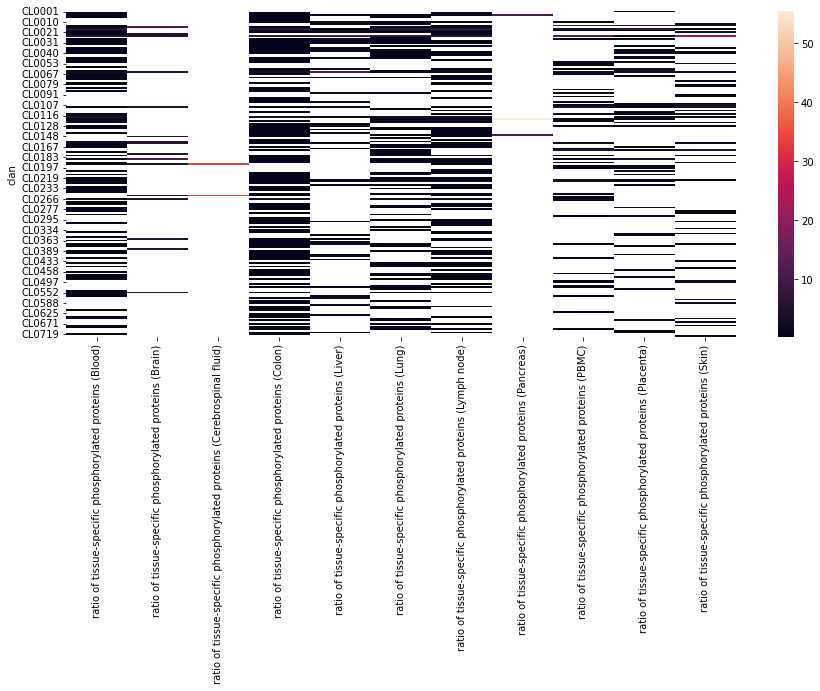

In [159]:
df_clan_taspec_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_taspec_all.drop("No_clan"))
plt.show()

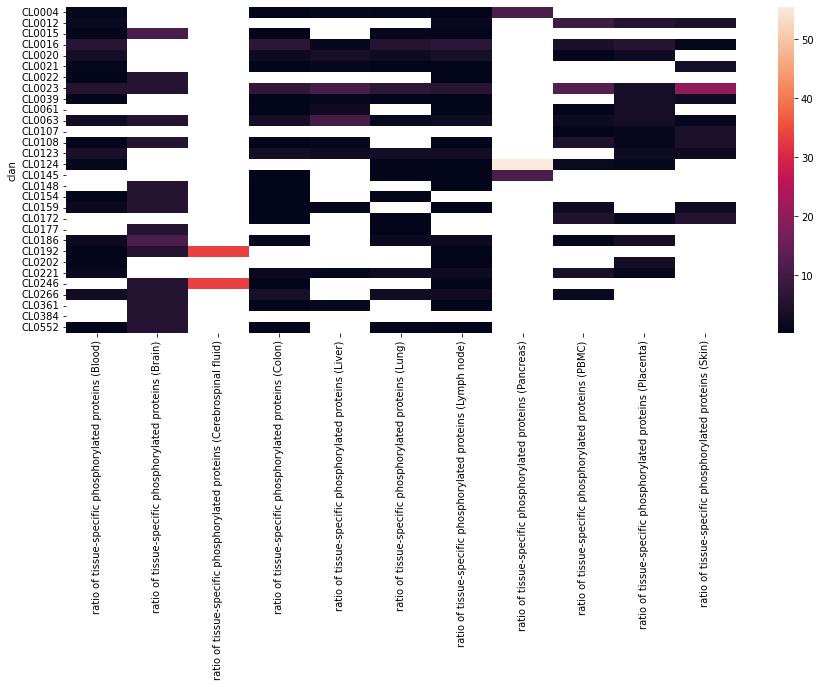

In [160]:
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_taspec_all[(df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Blood)"]>3)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Brain)"]>3)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]>3)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Colon)"]>3)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Liver)"]>3)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Lung)"]>3)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Lymph node)"]>3)|
                 #(df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Monocytes)"]>20)|
                 #(df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Ovary)"]>2)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Pancreas)"]>3)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (PBMC)"]>3)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Placenta)"]>3)|
                 (df_clan_taspec_all["ratio of tissue-specific phosphorylated proteins (Skin)"]>3)].drop("No_clan"))
plt.show()

In [161]:
df_clan_gen_Blood = gen_proteins_pfam.loc[gen_proteins_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Blood.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_clan_gen_Blood["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Blood"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Blood["ratio of tissue-specific phosphorylated proteins (Blood)"] = df_clan_gen_Blood["number of tissue-specific phosphorylated proteins (Blood)"]*100/df_clan_gen_Blood["Total"]
df_clan_gen_Blood.drop(["number of tissue-specific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_clan_gen_Blood.set_index(["clan"], inplace=True)
df_clan_gen_Brain = gen_proteins_pfam.loc[gen_proteins_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Brain.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_clan_gen_Brain["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Brain"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Brain["ratio of tissue-specific phosphorylated proteins (Brain)"] = df_clan_gen_Brain["number of tissue-specific phosphorylated proteins (Brain)"]*100/df_clan_gen_Brain["Total"]
df_clan_gen_Brain.drop(["number of tissue-specific phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_clan_gen_Brain.set_index(["clan"], inplace=True)
df_clan_gen_Cerebrospinal_fluid = gen_proteins_pfam.loc[gen_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_gen_Cerebrospinal_fluid["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Cerebrospinal_fluid["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"] = df_clan_gen_Cerebrospinal_fluid["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]*100/df_clan_gen_Cerebrospinal_fluid["Total"]
df_clan_gen_Cerebrospinal_fluid.drop(["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_gen_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
df_clan_gen_Colon = gen_proteins_pfam.loc[gen_proteins_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Colon.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_clan_gen_Colon["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Colon"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Colon["ratio of tissue-specific phosphorylated proteins (Colon)"] = df_clan_gen_Colon["number of tissue-specific phosphorylated proteins (Colon)"]*100/df_clan_gen_Colon["Total"]
df_clan_gen_Colon.drop(["number of tissue-specific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_clan_gen_Colon.set_index(["clan"], inplace=True)
df_clan_gen_Liver = gen_proteins_pfam.loc[gen_proteins_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Liver.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_clan_gen_Liver["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Liver"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Liver["ratio of tissue-specific phosphorylated proteins (Liver)"] = df_clan_gen_Liver["number of tissue-specific phosphorylated proteins (Liver)"]*100/df_clan_gen_Liver["Total"]
df_clan_gen_Liver.drop(["number of tissue-specific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_clan_gen_Liver.set_index(["clan"], inplace=True)
df_clan_gen_Lung = gen_proteins_pfam.loc[gen_proteins_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Lung.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_clan_gen_Lung["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Lung"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Lung["ratio of tissue-specific phosphorylated proteins (Lung)"] = df_clan_gen_Lung["number of tissue-specific phosphorylated proteins (Lung)"]*100/df_clan_gen_Lung["Total"]
df_clan_gen_Lung.drop(["number of tissue-specific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_clan_gen_Lung.set_index(["clan"], inplace=True)
df_clan_gen_Lymph_node = gen_proteins_pfam.loc[gen_proteins_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_clan_gen_Lymph_node["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Lymph node"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Lymph_node["ratio of tissue-specific phosphorylated proteins (Lymph node)"] = df_clan_gen_Lymph_node["number of tissue-specific phosphorylated proteins (Lymph node)"]*100/df_clan_gen_Lymph_node["Total"]
df_clan_gen_Lymph_node.drop(["number of tissue-specific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_gen_Lymph_node.set_index(["clan"], inplace=True)
df_clan_gen_Monocytes = gen_proteins_pfam.loc[gen_proteins_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_clan_gen_Monocytes["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Monocytes"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Monocytes["ratio of tissue-specific phosphorylated proteins (Monocytes)"] = df_clan_gen_Monocytes["number of tissue-specific phosphorylated proteins (Monocytes)"]*100/df_clan_gen_Monocytes["Total"]
df_clan_gen_Monocytes.drop(["number of tissue-specific phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_gen_Monocytes.set_index(["clan"], inplace=True)
df_clan_gen_Ovary = gen_proteins_pfam.loc[gen_proteins_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Ovary.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_clan_gen_Ovary["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Ovary"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Ovary["ratio of tissue-specific phosphorylated proteins (Ovary)"] = df_clan_gen_Ovary["number of tissue-specific phosphorylated proteins (Ovary)"]*100/df_clan_gen_Ovary["Total"]
df_clan_gen_Ovary.drop(["number of tissue-specific phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_clan_gen_Ovary.set_index(["clan"], inplace=True)
df_clan_gen_Pancreas = gen_proteins_pfam.loc[gen_proteins_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_clan_gen_Pancreas["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Pancreas"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Pancreas["ratio of tissue-specific phosphorylated proteins (Pancreas)"] = df_clan_gen_Pancreas["number of tissue-specific phosphorylated proteins (Pancreas)"]*100/df_clan_gen_Pancreas["Total"]
df_clan_gen_Pancreas.drop(["number of tissue-specific phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_gen_Pancreas.set_index(["clan"], inplace=True)
df_clan_gen_PBMC = gen_proteins_pfam.loc[gen_proteins_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_PBMC.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_clan_gen_PBMC["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["PBMC"]==1, :]["ACC_ID"].nunique()
df_clan_gen_PBMC["ratio of tissue-specific phosphorylated proteins (PBMC)"] = df_clan_gen_PBMC["number of tissue-specific phosphorylated proteins (PBMC)"]*100/df_clan_gen_PBMC["Total"]
df_clan_gen_PBMC.drop(["number of tissue-specific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_clan_gen_PBMC.set_index(["clan"], inplace=True)
df_clan_gen_Placenta = gen_proteins_pfam.loc[gen_proteins_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_gen_Placenta["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Placenta"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Placenta["ratio of tissue-specific phosphorylated proteins (Placenta)"] = df_clan_gen_Placenta["number of tissue-specific phosphorylated proteins (Placenta)"]*100/df_clan_gen_Placenta["Total"]
df_clan_gen_Placenta.drop(["number of tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_clan_gen_Placenta.set_index(["clan"], inplace=True)
df_clan_gen_Skin = gen_proteins_pfam.loc[gen_proteins_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_clan_gen_Skin.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_clan_gen_Skin["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Skin"]==1, :]["ACC_ID"].nunique()
df_clan_gen_Skin["ratio of tissue-specific phosphorylated proteins (Skin)"] = df_clan_gen_Skin["number of tissue-specific phosphorylated proteins (Skin)"]*100/df_clan_gen_Skin["Total"]
df_clan_gen_Skin.drop(["number of tissue-specific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_clan_gen_Skin.set_index(["clan"], inplace=True)

In [162]:
df_clan_gen_all = pd.concat([df_clan_gen_Blood, df_clan_gen_Brain, df_clan_gen_Cerebrospinal_fluid,
                              df_clan_gen_Colon, df_clan_gen_Liver, df_clan_gen_Lung, df_clan_gen_Lymph_node,
                              df_clan_gen_Monocytes, df_clan_gen_Ovary,
                                df_clan_gen_Pancreas,
                              df_clan_gen_PBMC, df_clan_gen_Placenta,
                               df_clan_gen_Skin], axis=1)
df_clan_gen_all

ratio of tissue-specific phosphorylated proteins (Blood)  \
clan                                                               
CL0001                                           0.169779          
CL0003                                           0.169779          
CL0004                                           0.169779          
CL0006                                           0.509338          
CL0007                                           0.339559          
...                                                   ...          
CL0649                                                NaN          
CL0051                                                NaN          
CL0085                                                NaN          
CL0311                                                NaN          
CL0547                                                NaN          

        ratio of tissue-specific phosphorylated proteins (Brain)  \
clan                                                               
CL0001                                                NaN          
CL0003                                                NaN          
CL0004                                           0.284091          
CL0006                                           0.568182          
CL0007                                           0.568182          
...                                                   ...          
CL0649                                                NaN          
CL0051                                                NaN          
CL0085                                                NaN          
CL0311                                                NaN          
CL0547                                                NaN          

        ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)  \
clan                                                                             
CL0001                                                NaN                        
CL0003                                                NaN                        
CL0004                                           0.313480                        
CL0006                                           0.626959                        
CL0007                                           0.313480                        
...                                                   ...                        
CL0649                                                NaN                        
CL0051                                                NaN                        
CL0085                                                NaN                        
CL0311                                                NaN                        
CL0547                                                NaN                        

        ratio of tissue-specific phosphorylated proteins (Colon)  \
clan                                                               
CL0001                                                NaN          
CL0003                                           0.195312          
CL0004                                                NaN          
CL0006                                                NaN          
CL0007                                           0.390625          
...                                                   ...          
CL0649                                                NaN          
CL0051                                                NaN          
CL0085                                                NaN          
CL0311                                                NaN          
CL0547                                                NaN          

        ratio of tissue-specific phosphorylated proteins (Liver)  \
clan                                                               
CL0001                                                NaN          
CL0003                                                NaN          
CL0004        

In [163]:
for column in df_clan_gen_all.columns:
    print(df_clan_gen_all[column].describe())

count    151.000000
mean       0.830907
std        3.529295
min        0.169779
25%        0.169779
50%        0.169779
75%        0.509338
max       42.275042
Name: ratio of tissue-specific phosphorylated proteins (Blood), dtype: float64
count    100.000000
mean       1.201705
std        4.190829
min        0.284091
25%        0.284091
50%        0.568182
75%        0.852273
max       41.477273
Name: ratio of tissue-specific phosphorylated proteins (Brain), dtype: float64
count    96.000000
mean      1.260449
std       4.358911
min       0.313480
25%       0.313480
50%       0.470219
75%       0.940439
max      42.319749
Name: ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid), dtype: float64
count    131.000000
mean       0.948235
std        4.056032
min        0.195312
25%        0.195312
50%        0.195312
75%        0.585938
max       45.507812
Name: ratio of tissue-specific phosphorylated proteins (Colon), dtype: float64
count    136.000000
mean       0.90273

<AxesSubplot:title={'center':'Number of pervasively phosphoryalted proteins in a tissue having phosphosites in a clan for clans highly associated with a specific tissue'}, xlabel='clan'>

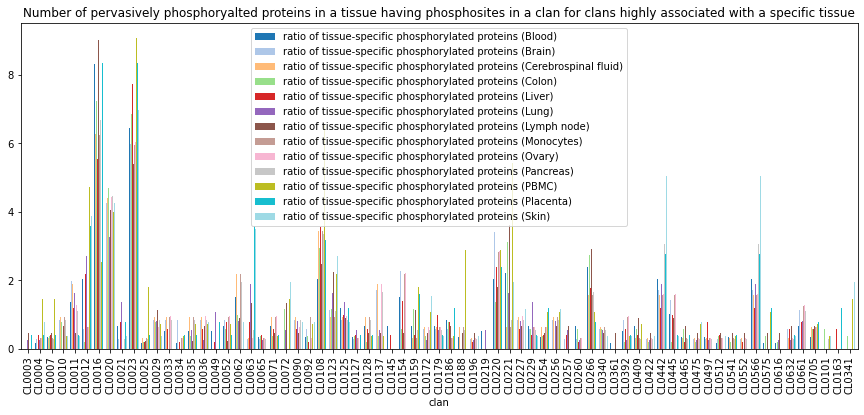

In [164]:
df_clan_gen_all[(df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Blood)"]>0.51)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Brain)"]>0.85)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]>0.94)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Colon)"]>0.59)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Liver)"]>0.59)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Lung)"]>0.81)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Lymph node)"]>0.45)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Monocytes)"]>0.94)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Ovary)"]>0.95)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Pancreas)"]>0.84)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (PBMC)"]>1.08)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Placenta)"]>1.19)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Skin)"]>1.16)].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8, title="Number of pervasively phosphoryalted proteins in a tissue having phosphosites in a clan for clans highly associated with a specific tissue")

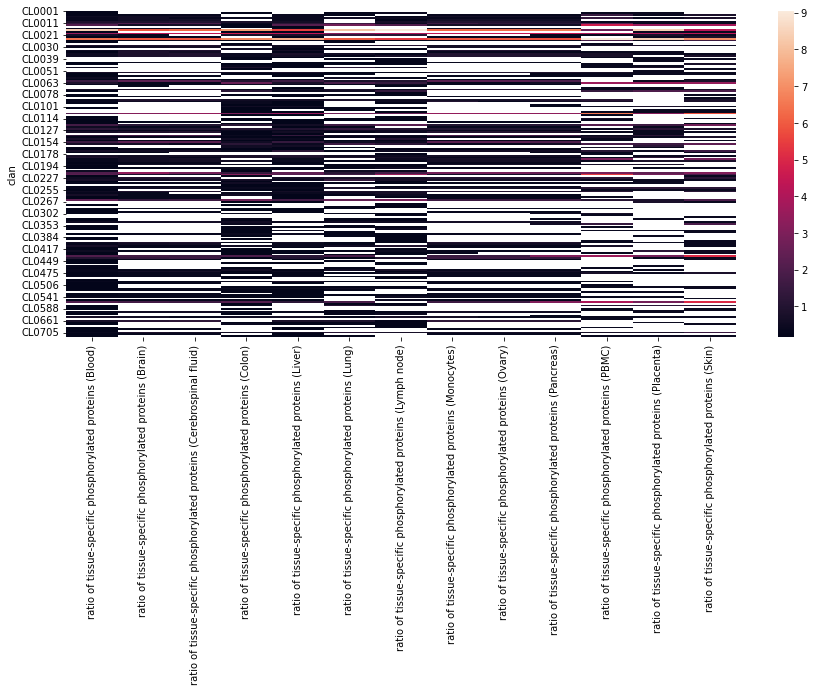

In [165]:
df_clan_gen_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_gen_all.drop("No_clan"))
plt.show()

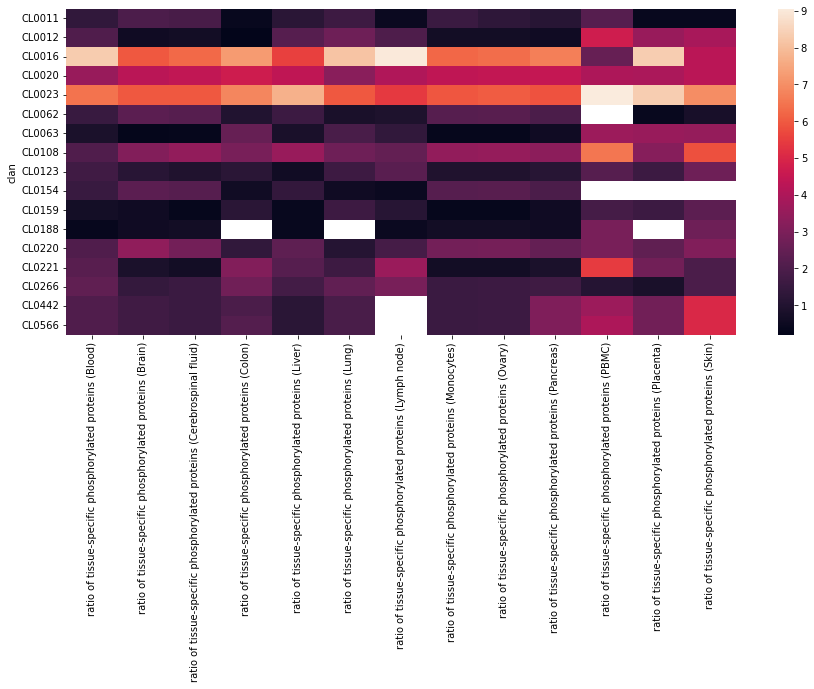

In [166]:
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_gen_all[(df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Blood)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Brain)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Colon)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Liver)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Lung)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Lymph node)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Monocytes)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Ovary)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Pancreas)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (PBMC)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Placenta)"]>2)|
                 (df_clan_gen_all["ratio of tissue-specific phosphorylated proteins (Skin)"]>2)].drop(["No_clan"]))
plt.show()

In [167]:
df_hmm_name_tspec_Blood = tspec_proteins_pfam.loc[tspec_proteins_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_name_tspec_Blood["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Blood"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Blood["ratio of tissue-specific phosphorylated proteins (Blood)"] = df_hmm_name_tspec_Blood["number of tissue-specific phosphorylated proteins (Blood)"]*100/df_hmm_name_tspec_Blood["Total"]
df_hmm_name_tspec_Blood.drop(["number of tissue-specific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Blood.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Brain = tspec_proteins_pfam.loc[tspec_proteins_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_hmm_name_tspec_Brain["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Brain"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Brain["ratio of tissue-specific phosphorylated proteins (Brain)"] = df_hmm_name_tspec_Brain["number of tissue-specific phosphorylated proteins (Brain)"]*100/df_hmm_name_tspec_Brain["Total"]
df_hmm_name_tspec_Brain.drop(["number of tissue-specific phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Brain.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Cerebrospinal_fluid = tspec_proteins_pfam.loc[tspec_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_tspec_Cerebrospinal_fluid["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Cerebrospinal_fluid["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"] = df_hmm_name_tspec_Cerebrospinal_fluid["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]*100/df_hmm_name_tspec_Cerebrospinal_fluid["Total"]
df_hmm_name_tspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Colon = tspec_proteins_pfam.loc[tspec_proteins_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_name_tspec_Colon["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Colon"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Colon["ratio of tissue-specific phosphorylated proteins (Colon)"] = df_hmm_name_tspec_Colon["number of tissue-specific phosphorylated proteins (Colon)"]*100/df_hmm_name_tspec_Colon["Total"]
df_hmm_name_tspec_Colon.drop(["number of tissue-specific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Colon.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Liver = tspec_proteins_pfam.loc[tspec_proteins_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_name_tspec_Liver["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Liver"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Liver["ratio of tissue-specific phosphorylated proteins (Liver)"] = df_hmm_name_tspec_Liver["number of tissue-specific phosphorylated proteins (Liver)"]*100/df_hmm_name_tspec_Liver["Total"]
df_hmm_name_tspec_Liver.drop(["number of tissue-specific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Liver.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Lung = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lung"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_hmm_name_tspec_Lung["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lung"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Lung["ratio of tissue-specific phosphorylated proteins (Lung)"] = df_hmm_name_tspec_Lung["number of tissue-specific phosphorylated proteins (Lung)"]*100/df_hmm_name_tspec_Lung["Total"]
df_hmm_name_tspec_Lung.drop(["number of tissue-specific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Lung.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Lymph_node = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_tspec_Lymph_node["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Lymph node"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Lymph_node["ratio of tissue-specific phosphorylated proteins (Lymph node)"] = df_hmm_name_tspec_Lymph_node["number of tissue-specific phosphorylated proteins (Lymph node)"]*100/df_hmm_name_tspec_Lymph_node["Total"]
df_hmm_name_tspec_Lymph_node.drop(["number of tissue-specific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Lymph_node.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Monocytes = tspec_proteins_pfam.loc[tspec_proteins_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_tspec_Monocytes["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Monocytes"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Monocytes["ratio of tissue-specific phosphorylated proteins (Monocytes)"] = df_hmm_name_tspec_Monocytes["number of tissue-specific phosphorylated proteins (Monocytes)"]*100/df_hmm_name_tspec_Monocytes["Total"]
df_hmm_name_tspec_Monocytes.drop(["number of tissue-specific phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Monocytes.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Ovary = tspec_proteins_pfam.loc[tspec_proteins_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_hmm_name_tspec_Ovary["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Ovary"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Ovary["ratio of tissue-specific phosphorylated proteins (Ovary)"] = df_hmm_name_tspec_Ovary["number of tissue-specific phosphorylated proteins (Ovary)"]*100/df_hmm_name_tspec_Ovary["Total"]
df_hmm_name_tspec_Ovary.drop(["number of tissue-specific phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Ovary.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Pancreas = tspec_proteins_pfam.loc[tspec_proteins_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_tspec_Pancreas["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Pancreas"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Pancreas["ratio of tissue-specific phosphorylated proteins (Pancreas)"] = df_hmm_name_tspec_Pancreas["number of tissue-specific phosphorylated proteins (Pancreas)"]*100/df_hmm_name_tspec_Pancreas["Total"]
df_hmm_name_tspec_Pancreas.drop(["number of tissue-specific phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Pancreas.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_PBMC = tspec_proteins_pfam.loc[tspec_proteins_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_name_tspec_PBMC["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["PBMC"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_PBMC["ratio of tissue-specific phosphorylated proteins (PBMC)"] = df_hmm_name_tspec_PBMC["number of tissue-specific phosphorylated proteins (PBMC)"]*100/df_hmm_name_tspec_PBMC["Total"]
df_hmm_name_tspec_PBMC.drop(["number of tissue-specific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_PBMC.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Placenta = tspec_proteins_pfam.loc[tspec_proteins_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_tspec_Placenta["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Placenta"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Placenta["ratio of tissue-specific phosphorylated proteins (Placenta)"] = df_hmm_name_tspec_Placenta["number of tissue-specific phosphorylated proteins (Placenta)"]*100/df_hmm_name_tspec_Placenta["Total"]
df_hmm_name_tspec_Placenta.drop(["number of tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Placenta.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Skin = tspec_proteins_pfam.loc[tspec_proteins_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_tspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_name_tspec_Skin["Total"] = tspec_proteins_pfam.loc[tspec_proteins_pfam["Skin"]==1, :]["ACC_ID"].nunique()
df_hmm_name_tspec_Skin["ratio of tissue-specific phosphorylated proteins (Skin)"] = df_hmm_name_tspec_Skin["number of tissue-specific phosphorylated proteins (Skin)"]*100/df_hmm_name_tspec_Skin["Total"]
df_hmm_name_tspec_Skin.drop(["number of tissue-specific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Skin.set_index(["hmm name"], inplace=True)

In [168]:
df_hmm_name_tspec_all = pd.concat([df_hmm_name_tspec_Blood, df_hmm_name_tspec_Brain, df_hmm_name_tspec_Cerebrospinal_fluid,
                              df_hmm_name_tspec_Colon, df_hmm_name_tspec_Liver, df_hmm_name_tspec_Lung, df_hmm_name_tspec_Lymph_node,
                              df_hmm_name_tspec_Monocytes, df_hmm_name_tspec_Ovary,
                                df_hmm_name_tspec_Pancreas,
                              df_hmm_name_tspec_PBMC, df_hmm_name_tspec_Placenta,
                               df_hmm_name_tspec_Skin], axis=1)
df_hmm_name_tspec_all

ratio of tissue-specific phosphorylated proteins (Blood)  \
hmm name                                                                   
ALG3                                                         1.25          
AMP_deaminase                                                1.25          
Actin                                                        1.25          
Apolipoprotein                                               1.25          
Arm                                                          1.25          
...                                                           ...          
Ribosomal_S25                                                 NaN          
Thioredoxin_6                                                 NaN          
Tropomyosin                                                   NaN          
tRNA-synt_1                                                   NaN          
vATP-synt_AC39                                                NaN          

                ratio of tissue-specific phosphorylated proteins (Brain)  \
hmm name                                                                   
ALG3                                                          NaN          
AMP_deaminase                                                 NaN          
Actin                                                         NaN          
Apolipoprotein                                                NaN          
Arm                                                           NaN          
...                                                           ...          
Ribosomal_S25                                                 NaN          
Thioredoxin_6                                                 NaN          
Tropomyosin                                                   NaN          
tRNA-synt_1                                                   NaN          
vATP-synt_AC39                                                NaN          

                ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)  \
hmm name                                                                                 
ALG3                                                          NaN                        
AMP_deaminase                                                 NaN                        
Actin                                                         NaN                        
Apolipoprotein                                                NaN                        
Arm                                                           NaN                        
...                                                           ...                        
Ribosomal_S25                                                 NaN                        
Thioredoxin_6                                                 NaN                        
Tropomyosin                                                   NaN                        
tRNA-synt_1                                                   NaN                        
vATP-synt_AC39                                                NaN                        

                ratio of tissue-specific phosphorylated proteins (Colon)  \
hmm name                                                                   
ALG3                                                          NaN          
AMP_deaminase                                                 NaN          
Actin                                                         NaN          
Apolipoprotein                                                NaN          
Arm                                                           NaN          
...                                                           ...          
Ribosomal_S25                                                 NaN          
Thioredoxin_6                                                 NaN          
Tropomyosin                                                   NaN          
tRNA-synt_1                    

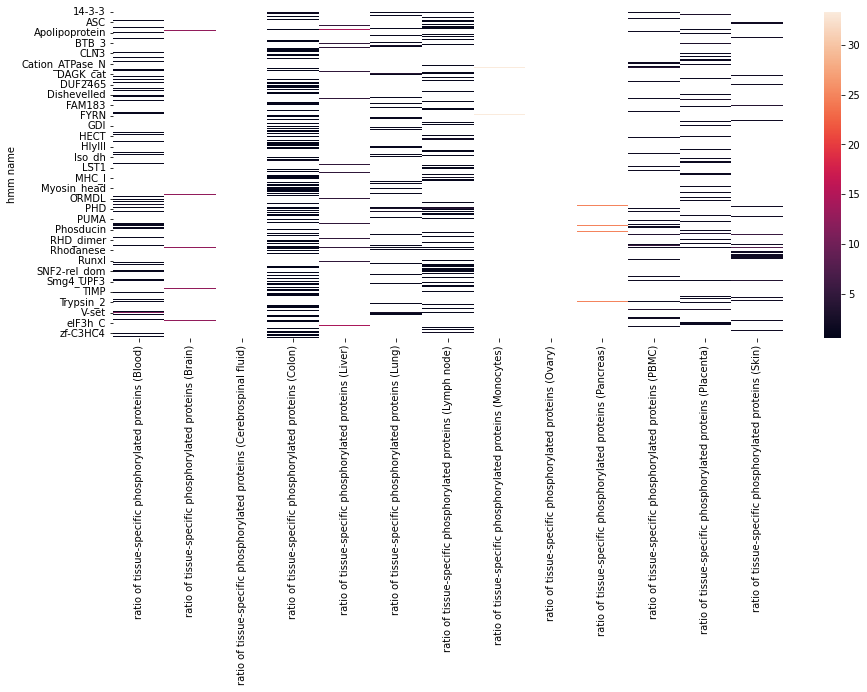

In [169]:
df_hmm_name_tspec_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_tspec_all)
plt.show()

In [170]:
df_hmm_name_taspec_Blood = taspec_proteins_pfam.loc[taspec_proteins_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_name_taspec_Blood["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Blood"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Blood["ratio of tissue-specific phosphorylated proteins (Blood)"] = df_hmm_name_taspec_Blood["number of tissue-specific phosphorylated proteins (Blood)"]*100/df_hmm_name_taspec_Blood["Total"]
df_hmm_name_taspec_Blood.drop(["number of tissue-specific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Blood.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Brain = taspec_proteins_pfam.loc[taspec_proteins_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_hmm_name_taspec_Brain["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Brain"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Brain["ratio of tissue-specific phosphorylated proteins (Brain)"] = df_hmm_name_taspec_Brain["number of tissue-specific phosphorylated proteins (Brain)"]*100/df_hmm_name_taspec_Brain["Total"]
df_hmm_name_taspec_Brain.drop(["number of tissue-specific phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Brain.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Cerebrospinal_fluid = taspec_proteins_pfam.loc[taspec_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_taspec_Cerebrospinal_fluid["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Cerebrospinal_fluid["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"] = df_hmm_name_taspec_Cerebrospinal_fluid["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]*100/df_hmm_name_taspec_Cerebrospinal_fluid["Total"]
df_hmm_name_taspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Colon = taspec_proteins_pfam.loc[taspec_proteins_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_name_taspec_Colon["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Colon"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Colon["ratio of tissue-specific phosphorylated proteins (Colon)"] = df_hmm_name_taspec_Colon["number of tissue-specific phosphorylated proteins (Colon)"]*100/df_hmm_name_taspec_Colon["Total"]
df_hmm_name_taspec_Colon.drop(["number of tissue-specific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Colon.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Liver = taspec_proteins_pfam.loc[taspec_proteins_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_name_taspec_Liver["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Liver"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Liver["ratio of tissue-specific phosphorylated proteins (Liver)"] = df_hmm_name_taspec_Liver["number of tissue-specific phosphorylated proteins (Liver)"]*100/df_hmm_name_taspec_Liver["Total"]
df_hmm_name_taspec_Liver.drop(["number of tissue-specific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Liver.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Lung = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lung"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_hmm_name_taspec_Lung["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lung"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Lung["ratio of tissue-specific phosphorylated proteins (Lung)"] = df_hmm_name_taspec_Lung["number of tissue-specific phosphorylated proteins (Lung)"]*100/df_hmm_name_taspec_Lung["Total"]
df_hmm_name_taspec_Lung.drop(["number of tissue-specific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Lung.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Lymph_node = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_taspec_Lymph_node["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Lymph node"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Lymph_node["ratio of tissue-specific phosphorylated proteins (Lymph node)"] = df_hmm_name_taspec_Lymph_node["number of tissue-specific phosphorylated proteins (Lymph node)"]*100/df_hmm_name_taspec_Lymph_node["Total"]
df_hmm_name_taspec_Lymph_node.drop(["number of tissue-specific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Lymph_node.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Monocytes = taspec_proteins_pfam.loc[taspec_proteins_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_taspec_Monocytes["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Monocytes"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Monocytes["ratio of tissue-specific phosphorylated proteins (Monocytes)"] = df_hmm_name_taspec_Monocytes["number of tissue-specific phosphorylated proteins (Monocytes)"]*100/df_hmm_name_taspec_Monocytes["Total"]
df_hmm_name_taspec_Monocytes.drop(["number of tissue-specific phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Monocytes.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Ovary = taspec_proteins_pfam.loc[taspec_proteins_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_hmm_name_taspec_Ovary["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Ovary"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Ovary["ratio of tissue-specific phosphorylated proteins (Ovary)"] = df_hmm_name_taspec_Ovary["number of tissue-specific phosphorylated proteins (Ovary)"]*100/df_hmm_name_taspec_Ovary["Total"]
df_hmm_name_taspec_Ovary.drop(["number of tissue-specific phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Ovary.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Pancreas = taspec_proteins_pfam.loc[taspec_proteins_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_taspec_Pancreas["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Pancreas"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Pancreas["ratio of tissue-specific phosphorylated proteins (Pancreas)"] = df_hmm_name_taspec_Pancreas["number of tissue-specific phosphorylated proteins (Pancreas)"]*100/df_hmm_name_taspec_Pancreas["Total"]
df_hmm_name_taspec_Pancreas.drop(["number of tissue-specific phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Pancreas.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_PBMC = taspec_proteins_pfam.loc[taspec_proteins_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_name_taspec_PBMC["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["PBMC"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_PBMC["ratio of tissue-specific phosphorylated proteins (PBMC)"] = df_hmm_name_taspec_PBMC["number of tissue-specific phosphorylated proteins (PBMC)"]*100/df_hmm_name_taspec_PBMC["Total"]
df_hmm_name_taspec_PBMC.drop(["number of tissue-specific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_PBMC.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Placenta = taspec_proteins_pfam.loc[taspec_proteins_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_taspec_Placenta["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Placenta"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Placenta["ratio of tissue-specific phosphorylated proteins (Placenta)"] = df_hmm_name_taspec_Placenta["number of tissue-specific phosphorylated proteins (Placenta)"]*100/df_hmm_name_taspec_Placenta["Total"]
df_hmm_name_taspec_Placenta.drop(["number of tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Placenta.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Skin = taspec_proteins_pfam.loc[taspec_proteins_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_taspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_name_taspec_Skin["Total"] = taspec_proteins_pfam.loc[taspec_proteins_pfam["Skin"]==1, :]["ACC_ID"].nunique()
df_hmm_name_taspec_Skin["ratio of tissue-specific phosphorylated proteins (Skin)"] = df_hmm_name_taspec_Skin["number of tissue-specific phosphorylated proteins (Skin)"]*100/df_hmm_name_taspec_Skin["Total"]
df_hmm_name_taspec_Skin.drop(["number of tissue-specific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Skin.set_index(["hmm name"], inplace=True)

In [171]:
df_hmm_name_taspec_all = pd.concat([df_hmm_name_taspec_Blood, df_hmm_name_taspec_Brain, df_hmm_name_taspec_Cerebrospinal_fluid,
                              df_hmm_name_taspec_Colon, df_hmm_name_taspec_Liver, df_hmm_name_taspec_Lung, df_hmm_name_taspec_Lymph_node,
                              df_hmm_name_taspec_Monocytes, df_hmm_name_taspec_Ovary,
                                df_hmm_name_taspec_Pancreas,
                              df_hmm_name_taspec_PBMC, df_hmm_name_taspec_Placenta,
                               df_hmm_name_taspec_Skin], axis=1)
df_hmm_name_taspec_all

ratio of tissue-specific phosphorylated proteins (Blood)  \
hmm name                                                                
A2M                                                   0.326797          
A2M_BRD                                               0.980392          
A2M_recep                                             0.326797          
AAA                                                   0.653595          
AMP-binding                                           0.326797          
...                                                        ...          
Vault_2                                                    NaN          
Vault_3                                                    NaN          
Vault_4                                                    NaN          
eIF2_C                                                     NaN          
eIF3_N                                                     NaN          

             ratio of tissue-specific phosphorylated proteins (Brain)  \
hmm name                                                                
A2M                                                        NaN          
A2M_BRD                                                    NaN          
A2M_recep                                                  NaN          
AAA                                                        NaN          
AMP-binding                                                NaN          
...                                                        ...          
Vault_2                                                    NaN          
Vault_3                                                    NaN          
Vault_4                                                    NaN          
eIF2_C                                                     NaN          
eIF3_N                                                     NaN          

             ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)  \
hmm name                                                                              
A2M                                                        NaN                        
A2M_BRD                                                    NaN                        
A2M_recep                                                  NaN                        
AAA                                                        NaN                        
AMP-binding                                                NaN                        
...                                                        ...                        
Vault_2                                                    NaN                        
Vault_3                                                    NaN                        
Vault_4                                                    NaN                        
eIF2_C                                                     NaN                        
eIF3_N                                                     NaN                        

             ratio of tissue-specific phosphorylated proteins (Colon)  \
hmm name                                                                
A2M                                                        NaN          
A2M_BRD                                                    NaN          
A2M_recep                                                  NaN          
AAA                                                   0.843882          
AMP-binding                                           0.843882          
...                                                        ...          
Vault_2                                                    NaN          
Vault_3                                                    NaN          
Vault_4                                                    NaN          
eIF2_C                                                     NaN          
eIF3_N                                                     NaN          

             ratio of tissue-sp

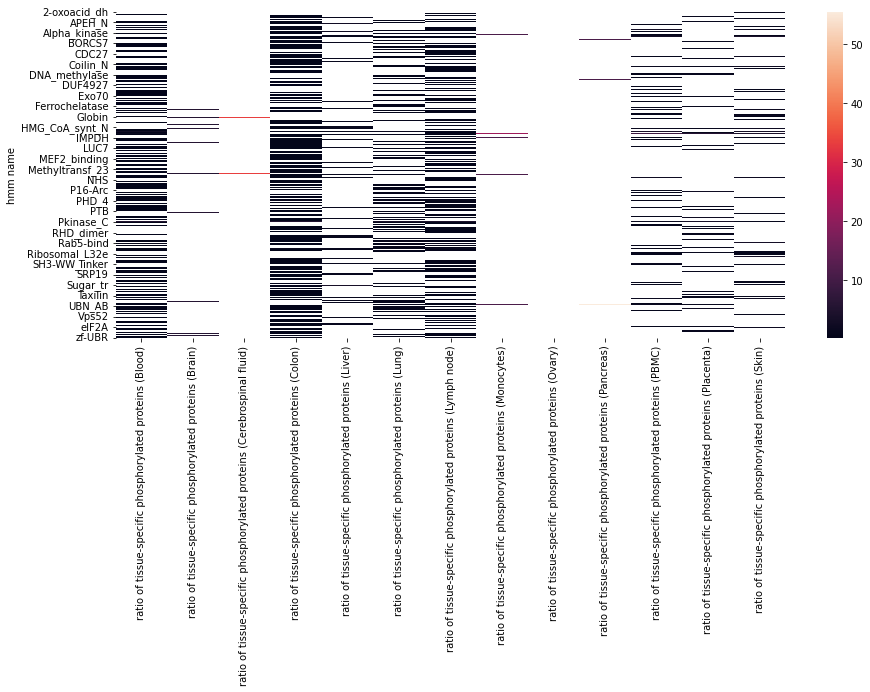

In [172]:
df_hmm_name_taspec_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_taspec_all)
plt.show()

In [173]:
df_hmm_name_gen_Blood = gen_proteins_pfam.loc[gen_proteins_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Blood.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_name_gen_Blood["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Blood"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Blood["ratio of tissue-specific phosphorylated proteins (Blood)"] = df_hmm_name_gen_Blood["number of tissue-specific phosphorylated proteins (Blood)"]*100/df_hmm_name_gen_Blood["Total"]
df_hmm_name_gen_Blood.drop(["number of tissue-specific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Blood.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Brain = gen_proteins_pfam.loc[gen_proteins_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Brain.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_hmm_name_gen_Brain["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Brain"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Brain["ratio of tissue-specific phosphorylated proteins (Brain)"] = df_hmm_name_gen_Brain["number of tissue-specific phosphorylated proteins (Brain)"]*100/df_hmm_name_gen_Brain["Total"]
df_hmm_name_gen_Brain.drop(["number of tissue-specific phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Brain.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Cerebrospinal_fluid = gen_proteins_pfam.loc[gen_proteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_gen_Cerebrospinal_fluid["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Cerebrospinal_fluid["ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"] = df_hmm_name_gen_Cerebrospinal_fluid["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]*100/df_hmm_name_gen_Cerebrospinal_fluid["Total"]
df_hmm_name_gen_Cerebrospinal_fluid.drop(["number of tissue-specific phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Colon = gen_proteins_pfam.loc[gen_proteins_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Colon.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_name_gen_Colon["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Colon"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Colon["ratio of tissue-specific phosphorylated proteins (Colon)"] = df_hmm_name_gen_Colon["number of tissue-specific phosphorylated proteins (Colon)"]*100/df_hmm_name_gen_Colon["Total"]
df_hmm_name_gen_Colon.drop(["number of tissue-specific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Colon.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Liver = gen_proteins_pfam.loc[gen_proteins_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Liver.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_name_gen_Liver["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Liver"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Liver["ratio of tissue-specific phosphorylated proteins (Liver)"] = df_hmm_name_gen_Liver["number of tissue-specific phosphorylated proteins (Liver)"]*100/df_hmm_name_gen_Liver["Total"]
df_hmm_name_gen_Liver.drop(["number of tissue-specific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Liver.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Lung = gen_proteins_pfam.loc[gen_proteins_pfam["Lung"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Lung.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_hmm_name_gen_Lung["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Lung"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Lung["ratio of tissue-specific phosphorylated proteins (Lung)"] = df_hmm_name_gen_Lung["number of tissue-specific phosphorylated proteins (Lung)"]*100/df_hmm_name_gen_Lung["Total"]
df_hmm_name_gen_Lung.drop(["number of tissue-specific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Lung.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Lymph_node = gen_proteins_pfam.loc[gen_proteins_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_gen_Lymph_node["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Lymph node"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Lymph_node["ratio of tissue-specific phosphorylated proteins (Lymph node)"] = df_hmm_name_gen_Lymph_node["number of tissue-specific phosphorylated proteins (Lymph node)"]*100/df_hmm_name_gen_Lymph_node["Total"]
df_hmm_name_gen_Lymph_node.drop(["number of tissue-specific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Lymph_node.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Monocytes = gen_proteins_pfam.loc[gen_proteins_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_gen_Monocytes["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Monocytes"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Monocytes["ratio of tissue-specific phosphorylated proteins (Monocytes)"] = df_hmm_name_gen_Monocytes["number of tissue-specific phosphorylated proteins (Monocytes)"]*100/df_hmm_name_gen_Monocytes["Total"]
df_hmm_name_gen_Monocytes.drop(["number of tissue-specific phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Monocytes.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Ovary = gen_proteins_pfam.loc[gen_proteins_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Ovary.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_hmm_name_gen_Ovary["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Ovary"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Ovary["ratio of tissue-specific phosphorylated proteins (Ovary)"] = df_hmm_name_gen_Ovary["number of tissue-specific phosphorylated proteins (Ovary)"]*100/df_hmm_name_gen_Ovary["Total"]
df_hmm_name_gen_Ovary.drop(["number of tissue-specific phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Ovary.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Pancreas = gen_proteins_pfam.loc[gen_proteins_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_gen_Pancreas["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Pancreas"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Pancreas["ratio of tissue-specific phosphorylated proteins (Pancreas)"] = df_hmm_name_gen_Pancreas["number of tissue-specific phosphorylated proteins (Pancreas)"]*100/df_hmm_name_gen_Pancreas["Total"]
df_hmm_name_gen_Pancreas.drop(["number of tissue-specific phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Pancreas.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_PBMC = gen_proteins_pfam.loc[gen_proteins_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_PBMC.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_name_gen_PBMC["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["PBMC"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_PBMC["ratio of tissue-specific phosphorylated proteins (PBMC)"] = df_hmm_name_gen_PBMC["number of tissue-specific phosphorylated proteins (PBMC)"]*100/df_hmm_name_gen_PBMC["Total"]
df_hmm_name_gen_PBMC.drop(["number of tissue-specific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_PBMC.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Placenta = gen_proteins_pfam.loc[gen_proteins_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_gen_Placenta["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Placenta"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Placenta["ratio of tissue-specific phosphorylated proteins (Placenta)"] = df_hmm_name_gen_Placenta["number of tissue-specific phosphorylated proteins (Placenta)"]*100/df_hmm_name_gen_Placenta["Total"]
df_hmm_name_gen_Placenta.drop(["number of tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Placenta.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Skin = gen_proteins_pfam.loc[gen_proteins_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_name_gen_Skin.rename({"ACC_ID": "number of tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_name_gen_Skin["Total"] = gen_proteins_pfam.loc[gen_proteins_pfam["Skin"]==1, :]["ACC_ID"].nunique()
df_hmm_name_gen_Skin["ratio of tissue-specific phosphorylated proteins (Skin)"] = df_hmm_name_gen_Skin["number of tissue-specific phosphorylated proteins (Skin)"]*100/df_hmm_name_gen_Skin["Total"]
df_hmm_name_gen_Skin.drop(["number of tissue-specific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Skin.set_index(["hmm name"], inplace=True)

In [174]:
df_hmm_name_gen_all = pd.concat([df_hmm_name_gen_Blood, df_hmm_name_gen_Brain, df_hmm_name_gen_Cerebrospinal_fluid,
                              df_hmm_name_gen_Colon, df_hmm_name_gen_Liver, df_hmm_name_gen_Lung, df_hmm_name_gen_Lymph_node,
                              df_hmm_name_gen_Monocytes, df_hmm_name_gen_Ovary,
                                df_hmm_name_gen_Pancreas,
                              df_hmm_name_gen_PBMC, df_hmm_name_gen_Placenta,
                               df_hmm_name_gen_Skin], axis=1)
df_hmm_name_gen_all

ratio of tissue-specific phosphorylated proteins (Blood)  \
hmm name                                                                   
14-3-3                                                   0.848896          
2OG-FeII_Oxy_2                                           0.169779          
4_1_CTD                                                  0.339559          
7tm_4                                                    0.169779          
A2M                                                      0.169779          
...                                                           ...          
Nudc_N                                                        NaN          
Recep_L_domain                                                NaN          
SCP2                                                          NaN          
SIR2                                                          NaN          
Thioredoxin                                                   NaN          

                ratio of tissue-specific phosphorylated proteins (Brain)  \
hmm name                                                                   
14-3-3                                                   1.420455          
2OG-FeII_Oxy_2                                                NaN          
4_1_CTD                                                  0.284091          
7tm_4                                                    0.284091          
A2M                                                           NaN          
...                                                           ...          
Nudc_N                                                        NaN          
Recep_L_domain                                                NaN          
SCP2                                                          NaN          
SIR2                                                          NaN          
Thioredoxin                                                   NaN          

                ratio of tissue-specific phosphorylated proteins (Cerebrospinal fluid)  \
hmm name                                                                                 
14-3-3                                                   1.567398                        
2OG-FeII_Oxy_2                                                NaN                        
4_1_CTD                                                  0.313480                        
7tm_4                                                    0.313480                        
A2M                                                           NaN                        
...                                                           ...                        
Nudc_N                                                        NaN                        
Recep_L_domain                                                NaN                        
SCP2                                                          NaN                        
SIR2                                                          NaN                        
Thioredoxin                                                   NaN                        

                ratio of tissue-specific phosphorylated proteins (Colon)  \
hmm name                                                                   
14-3-3                                                   1.171875          
2OG-FeII_Oxy_2                                                NaN          
4_1_CTD                                                  0.390625          
7tm_4                                                         NaN          
A2M                                                           NaN          
...                                                           ...          
Nudc_N                                                        NaN          
Recep_L_domain                                                NaN          
SCP2                                                          NaN          
SIR2                           

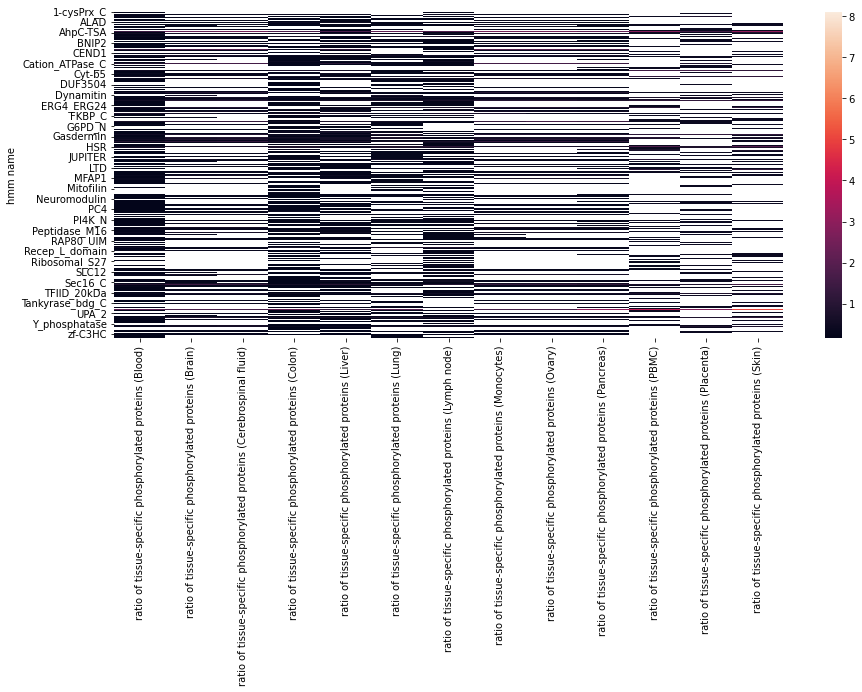

In [175]:
df_hmm_name_gen_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_gen_all)
plt.show()

# 8. Comparison with the UniProtKB proteins

In [176]:
Uniprot = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot.rename({"Entry": "ACC_ID"}, axis=1, inplace=True)
Uniprot_pfam = pd.merge(Uniprot["ACC_ID"], pfam_sub, on=["ACC_ID"], how="inner")
Uniprot_pfam

ACC_ID  hmm start  hmm end         hmm name    type     clan  \
0      Q00266          2       99  S-AdoMet_synt_N  Domain  No_clan   
1      Q00266          2      120  S-AdoMet_synt_M  Domain  No_clan   
2      Q00266          1      137  S-AdoMet_synt_C  Domain  No_clan   
3      Q8NB16         17      259   PK_Tyr_Ser-Thr  Domain   CL0016   
4      O94851          6      108               CH  Domain   CL0188   
...       ...        ...      ...              ...     ...      ...   
45902  Q8IUX8          1       34           EGF_CA  Domain   CL0001   
45903  O15372          1      117              JAB  Family   CL0366   
45904  O15372          1      194          eIF3h_C  Family  No_clan   
45905  P54852          1      166    PMP22_Claudin  Family   CL0375   
45906  P50402          1       39              LEM  Domain   CL0306   

             E-value  
0       2.300000e-39  
1       1.400000e-42  
2       9.300000e-65  
3       1.000000e-36  
4       6.400000e-20  
...              ...  
45902   1.200000e-02  
45903   2.800000e-20  
45904  5.300000e-106  
45905   7.700000e-44  
45906   7.800000e-11  

[45907 rows x 7 columns]

In [177]:
tspec_proteins_all = pd.merge(tspec_proteins, pfam_sub, on=["ACC_ID"], how="inner")
taspec_proteins_all = pd.merge(taspec_proteins, pfam_sub, on=["ACC_ID"], how="inner")
gen_proteins_all = pd.merge(gen_proteins, pfam_sub, on=["ACC_ID"], how="inner")

## 8.1 Type of annotation

We compare the type of annotation for our three categories of proteins, to the annotation of UniprotKB proteins. A relatively high percentage of proteins is associated with disorderedness.

In [178]:
df_types_tissue = pd.DataFrame({"Type": list_types})
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
list_total = []
for element in list_types:
    count_tspec = tspec_proteins_all.loc[(tspec_proteins_all["type"]==element), :]["ACC_ID"].nunique()
    count_taspec = taspec_proteins_all.loc[(taspec_proteins_all["type"]==element), :]["ACC_ID"].nunique()
    count_gen = gen_proteins_all.loc[(gen_proteins_all["type"]==element), :]["ACC_ID"].nunique()
    list_counts_tspec.append(count_tspec)
    list_counts_taspec.append(count_taspec)
    list_counts_gen.append(count_gen)
    count_total = Uniprot_pfam.loc[(Uniprot_pfam["type"]==element), :]["ACC_ID"].nunique()
    list_total.append(count_total)
df_types_tissue["Number of tissue-specific phosphorylated proteins"] = list_counts_tspec
df_types_tissue["Number of tissue aspecific phosphoryalted proteins"] = list_counts_taspec
df_types_tissue["Number of pervasively phosphorylated proteins"] = list_counts_gen
df_types_tissue["Number of proteins in UniProtKB"] = list_total
df_types_tissue

Type  Number of tissue-specific phosphorylated proteins  \
0       Domain                                               1277   
1       Family                                                873   
2       Repeat                                                193   
3  Coiled-coil                                                 48   
4   Disordered                                                 15   
5        Motif                                                 30   

   Number of tissue aspecific phosphoryalted proteins  \
0                                               1366    
1                                                893    
2                                                211    
3                                                 61    
4                                                 39    
5                                                 29    

   Number of pervasively phosphorylated proteins  \
0                                           1169   
1                                            758   
2                                            224   
3                                             74   
4                                             18   
5                                             35   

   Number of proteins in UniProtKB  
0                            11306  
1                             9223  
2                             1702  
3                              396  
4                              110  
5                              259

In [179]:
print(tspec_proteins_all["ACC_ID"].nunique()*100/Uniprot_pfam["ACC_ID"].nunique())
print(taspec_proteins_all["ACC_ID"].nunique()*100/Uniprot_pfam["ACC_ID"].nunique())
print(gen_proteins_all["ACC_ID"].nunique()*100/Uniprot_pfam["ACC_ID"].nunique())

10.259294974820529
10.666452373299046
9.069966784528019


<AxesSubplot:title={'center':'Ratio of proteins with a certain kind of domain'}, xlabel='Type'>

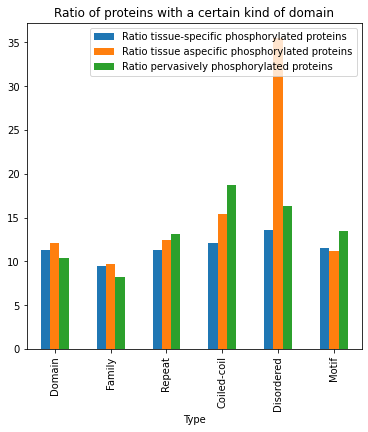

In [180]:
df_types_tissue["Ratio tissue-specific phosphorylated proteins"] = df_types_tissue["Number of tissue-specific phosphorylated proteins"]*100/df_types_tissue["Number of proteins in UniProtKB"]
df_types_tissue["Ratio tissue aspecific phosphorylated proteins"] = df_types_tissue["Number of tissue aspecific phosphoryalted proteins"]*100/df_types_tissue["Number of proteins in UniProtKB"]
df_types_tissue["Ratio pervasively phosphorylated proteins"] = df_types_tissue["Number of pervasively phosphorylated proteins"]*100/df_types_tissue["Number of proteins in UniProtKB"]

df_types_tissue[["Type", "Ratio tissue-specific phosphorylated proteins", "Ratio tissue aspecific phosphorylated proteins", "Ratio pervasively phosphorylated proteins"]].plot(kind="bar", x="Type", figsize=(6,6), title="Ratio of proteins with a certain kind of domain")
#plt.savefig("WP2 Pfam_annotation_phosphoproteins.png", format="png", bbox_inches="tight")

## 8.2 Clans

We do the same for the percentages proteins associated with a certain clan and a certain domain/region.

In [181]:
df_gr_clan_tspec = tspec_proteins_all.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_tspec.rename({"ACC_ID": "Number of tissue-specific phosphorylated proteins"}, axis=1, inplace=True)
df_gr_clan_tspec.set_index(["clan"], inplace=True)
df_gr_clan_taspec = taspec_proteins_all.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_taspec.rename({"ACC_ID": "Number of tissue aspecific phosphorylated proteins"}, axis=1, inplace=True)
df_gr_clan_taspec.set_index(["clan"], inplace=True)
df_gr_clan_gen = gen_proteins_all.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_gen.rename({"ACC_ID": "Number of pervasively phosphorylated proteins"}, axis=1, inplace=True)
df_gr_clan_gen.set_index(["clan"], inplace=True)
df_gr_clan_uni = Uniprot_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_uni.rename({"ACC_ID": "Number of proteins from Uniprot"}, axis=1, inplace=True)

df_gr_clan_data = pd.concat([df_gr_clan_tspec, df_gr_clan_taspec, df_gr_clan_gen])

df_gr_clan_data.reset_index(inplace=True)
df_gr_clan_data.rename({"index": "clan"}, axis=1, inplace=True)
df_gr_clan_data

clan  Number of tissue-specific phosphorylated proteins  \
0     CL0001                                               35.0   
1     CL0003                                               24.0   
2     CL0004                                               15.0   
3     CL0005                                                5.0   
4     CL0006                                               11.0   
..       ...                                                ...   
871   CL0715                                                NaN   
872   CL0716                                                NaN   
873   CL0718                                                NaN   
874   CL0719                                                NaN   
875  No_clan                                                NaN   

     Number of tissue aspecific phosphorylated proteins  \
0                                                  NaN    
1                                                  NaN    
2                                                  NaN    
3                                                  NaN    
4                                                  NaN    
..                                                 ...    
871                                                NaN    
872                                                NaN    
873                                                NaN    
874                                                NaN    
875                                                NaN    

     Number of pervasively phosphorylated proteins  
0                                              NaN  
1                                              NaN  
2                                              NaN  
3                                              NaN  
4                                              NaN  
..                                             ...  
871                                            1.0  
872                                            1.0  
873                                            1.0  
874                                            3.0  
875                                          844.0  

[876 rows x 4 columns]

In [182]:
df_gr_clan_all = pd.merge(df_gr_clan_data, df_gr_clan_uni, how="inner", on=["clan"])
df_gr_clan_all["Ratio tissue-specific phosphorylated proteins"] = df_gr_clan_all["Number of tissue-specific phosphorylated proteins"]*100/df_gr_clan_all["Number of proteins from Uniprot"]
df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins"] = df_gr_clan_all["Number of tissue aspecific phosphorylated proteins"]*100/df_gr_clan_all["Number of proteins from Uniprot"]
df_gr_clan_all["Ratio pervasively phosphorylated proteins"] = df_gr_clan_all["Number of pervasively phosphorylated proteins"]*100/df_gr_clan_all["Number of proteins from Uniprot"]
df_gr_clan_all = df_gr_clan_all.groupby(["clan"], as_index=False).max()
df_gr_clan_all.sort_values("clan", inplace=True)

df_gr_clan_all

clan  Number of tissue-specific phosphorylated proteins  \
0     CL0001                                               35.0   
1     CL0003                                               24.0   
2     CL0004                                               15.0   
3     CL0005                                                5.0   
4     CL0006                                               11.0   
..       ...                                                ...   
398   CL0718                                                2.0   
399   CL0719                                                1.0   
400   CL0720                                                1.0   
401   CL0721                                                NaN   
402  No_clan                                              849.0   

     Number of tissue aspecific phosphorylated proteins  \
0                                                 25.0    
1                                                 21.0    
2                                                 20.0    
3                                                  3.0    
4                                                 14.0    
..                                                 ...    
398                                                2.0    
399                                                1.0    
400                                                NaN    
401                                                1.0    
402                                              990.0    

     Number of pervasively phosphorylated proteins  \
0                                             12.0   
1                                             19.0   
2                                             10.0   
3                                              1.0   
4                                             18.0   
..                                             ...   
398                                            1.0   
399                                            3.0   
400                                            NaN   
401                                            NaN   
402                                          844.0   

     Number of proteins from Uniprot  \
0                                245   
1                                114   
2                                205   
3                                 45   
4                                 68   
..                               ...   
398                                5   
399                                5   
400                                3   
401                                7   
402                             8041   

     Ratio tissue-specific phosphorylated proteins  \
0                                        14.285714   
1                                        21.052632   
2                                         7.317073   
3                                        11.111111   
4                                        16.176471   
..                                             ...   
398                                      40.000000   
399                                      20.000000   
400                                      33.333333   
401                                            NaN   
402                                      10.558388   

     Ratio tissue aspecific phosphorylated proteins  \
0                                         10.204082   
1                                         18.421053   
2                                          9.756098   
3                                          6.666667   
4                                         20.588235   
..                                              ...   
398                                       40.000000   
399                                       20.000000   
400                                             NaN   
401                                       14.285714   
402                                       12.311902   

     Ratio pervasively phosphorylated proteins  
0    

In [183]:
print(df_gr_clan_all["Ratio tissue-specific phosphorylated proteins"].describe())
print(df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins"].describe())
print(df_gr_clan_all["Ratio pervasively phosphorylated proteins"].describe())

count    306.000000
mean      18.757898
std       15.432075
min        1.265823
25%       10.000000
50%       14.441277
75%       22.195513
max      100.000000
Name: Ratio tissue-specific phosphorylated proteins, dtype: float64
count    298.000000
mean      17.744211
std       14.700763
min        1.265823
25%        8.205782
50%       13.990319
75%       23.757036
max      100.000000
Name: Ratio tissue aspecific phosphorylated proteins, dtype: float64
count    272.000000
mean      20.522581
std       18.939018
min        0.892857
25%        8.333333
50%       15.000000
75%       25.000000
max      100.000000
Name: Ratio pervasively phosphorylated proteins, dtype: float64


In [184]:
whisker_tspec = 1.5*(22.20-10)
whisker_taspec = 1.5*(23.76-8.21)
whisker_gen =  1.5*(25-8.33)

In [185]:
df_gr_clan_all[df_gr_clan_all["clan"]=="CL0245"]

clan  Number of tissue-specific phosphorylated proteins  \
174  CL0245                                                NaN   

     Number of tissue aspecific phosphorylated proteins  \
174                                                NaN    

     Number of pervasively phosphorylated proteins  \
174                                            1.0   

     Number of proteins from Uniprot  \
174                                1   

     Ratio tissue-specific phosphorylated proteins  \
174                                            NaN   

     Ratio tissue aspecific phosphorylated proteins  \
174                                             NaN   

     Ratio pervasively phosphorylated proteins  
174                                      100.0

<AxesSubplot:title={'center':'Ratio of clans in each of the three categories'}, xlabel='clan'>

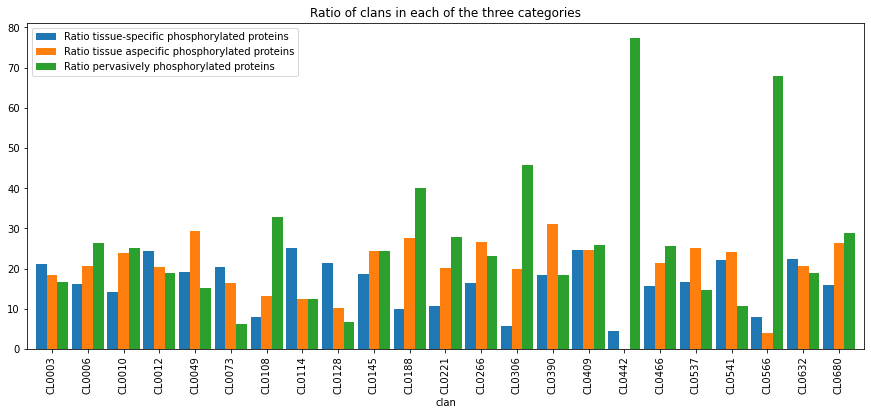

In [186]:
df_gr_clan_all[(((df_gr_clan_all["Ratio tissue-specific phosphorylated proteins"]>whisker_tspec)&(df_gr_clan_all["Number of tissue-specific phosphorylated proteins"]>=10))|
              ((df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins"]>whisker_taspec)&(df_gr_clan_all["Number of tissue aspecific phosphorylated proteins"]>=10))|
               ((df_gr_clan_all["Ratio pervasively phosphorylated proteins"]>whisker_gen)&(df_gr_clan_all["Number of pervasively phosphorylated proteins"]>=10)))][["clan",
   "Ratio tissue-specific phosphorylated proteins", "Ratio tissue aspecific phosphorylated proteins",
    "Ratio pervasively phosphorylated proteins"]].plot(kind="bar", x="clan", figsize=(15,6), width=0.9, title="Ratio of clans in each of the three categories")
#plt.savefig("WP2 Pfam_clans_phosphoproteins.png", format="png", bbox_inches="tight")

## 8.3 HMM name

In [187]:
df_gr_hmm_tspec = tspec_proteins_all.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_tspec.rename({"ACC_ID": "Number of tissue-specific phosphorylated proteins"}, axis=1, inplace=True)
df_gr_hmm_tspec.set_index(["hmm name"], inplace=True)
df_gr_hmm_taspec = taspec_proteins_all.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_taspec.rename({"ACC_ID": "Number of tissue aspecific phosphorylated proteins"}, axis=1, inplace=True)
df_gr_hmm_taspec.set_index(["hmm name"], inplace=True)
df_gr_hmm_gen = gen_proteins_all.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_gen.rename({"ACC_ID": "Number of pervasively phosphorylated proteins"}, axis=1, inplace=True)
df_gr_hmm_gen.set_index(["hmm name"], inplace=True)
df_gr_hmm_uni = Uniprot_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_uni.rename({"ACC_ID": "Number of proteins from Uniprot"}, axis=1, inplace=True)

df_gr_hmm_data = pd.concat([df_gr_hmm_tspec, df_gr_hmm_taspec, df_gr_hmm_gen])

df_gr_hmm_data.reset_index(inplace=True)
df_gr_hmm_data.rename({"index": "hmm name"}, axis=1, inplace=True)
df_gr_hmm_data

hmm name  Number of tissue-specific phosphorylated proteins  \
0           14-3-3                                                1.0   
1       2-Hacid_dh                                                1.0   
2     2-Hacid_dh_C                                                1.0   
3     2OG-FeII_Oxy                                                1.0   
4      5_nucleotid                                                1.0   
...            ...                                                ...   
5147        zf-UBP                                                NaN   
5148    zf-UBP_var                                                NaN   
5149        zf-UBR                                                NaN   
5150    zf-piccolo                                                NaN   
5151    zf_C2H2_10                                                NaN   

      Number of tissue aspecific phosphorylated proteins  \
0                                                   NaN    
1                                                   NaN    
2                                                   NaN    
3                                                   NaN    
4                                                   NaN    
...                                                 ...    
5147                                                NaN    
5148                                                NaN    
5149                                                NaN    
5150                                                NaN    
5151                                                NaN    

      Number of pervasively phosphorylated proteins  
0                                               NaN  
1                                               NaN  
2                                               NaN  
3                                               NaN  
4                                               NaN  
...                                             ...  
5147                                            4.0  
5148                                            1.0  
5149                                            1.0  
5150                                            2.0  
5151                                            1.0  

[5152 rows x 4 columns]

In [188]:
df_gr_hmm_all = pd.merge(df_gr_hmm_data, df_gr_hmm_uni, how="inner", on=["hmm name"])
df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins"] = df_gr_hmm_all["Number of tissue-specific phosphorylated proteins"]*100/df_gr_hmm_all["Number of proteins from Uniprot"]
df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins"] = df_gr_hmm_all["Number of tissue aspecific phosphorylated proteins"]*100/df_gr_hmm_all["Number of proteins from Uniprot"]
df_gr_hmm_all["Ratio pervasively phosphorylated proteins"] = df_gr_hmm_all["Number of pervasively phosphorylated proteins"]*100/df_gr_hmm_all["Number of proteins from Uniprot"]
df_gr_hmm_all = df_gr_hmm_all.groupby(["hmm name"], as_index=False).max()
df_gr_hmm_all.sort_values("hmm name", inplace=True)

df_gr_hmm_all

hmm name  Number of tissue-specific phosphorylated proteins  \
0         1-cysPrx_C                                                NaN   
1             14-3-3                                                1.0   
2         2-Hacid_dh                                                1.0   
3       2-Hacid_dh_C                                                1.0   
4       2-oxoacid_dh                                                NaN   
...              ...                                                ...   
3576       zf_CCCH_5                                                NaN   
3577        zf_Hakai                                                1.0   
3578  zinc_ribbon_10                                                NaN   
3579  zinc_ribbon_16                                                NaN   
3580   zinc_ribbon_2                                                NaN   

      Number of tissue aspecific phosphorylated proteins  \
0                                                   3.0    
1                                                   NaN    
2                                                   NaN    
3                                                   NaN    
4                                                   1.0    
...                                                 ...    
3576                                                1.0    
3577                                                NaN    
3578                                                1.0    
3579                                                1.0    
3580                                                1.0    

      Number of pervasively phosphorylated proteins  \
0                                               2.0   
1                                               6.0   
2                                               1.0   
3                                               1.0   
4                                               1.0   
...                                             ...   
3576                                            NaN   
3577                                            NaN   
3578                                            NaN   
3579                                            NaN   
3580                                            NaN   

      Number of proteins from Uniprot  \
0                                   5   
1                                   7   
2                                   4   
3                                   4   
4                                   4   
...                               ...   
3576                                2   
3577                                2   
3578                                1   
3579                                1   
3580                                1   

      Ratio tissue-specific phosphorylated proteins  \
0                                               NaN   
1                                         14.285714   
2                                         25.000000   
3                                         25.000000   
4                                               NaN   
...                                             ...   
3576                                            NaN   
3577                                      50.000000   
3578                                            NaN   
3579                                            NaN   
3580                                            NaN   

      Ratio tissue aspecific phosphorylated proteins  \
0                                               60.0   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                               25.0   
...                                              ...   
3576                                            50.0   
3577                                             NaN   
3578                                           100.0   
3579           

In [189]:
print(df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins"].describe())
print(df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins"].describe())
print(df_gr_hmm_all["Ratio pervasively phosphorylated proteins"].describe())

count    1675.000000
mean       44.169992
std        33.333376
min         0.941176
25%        16.666667
50%        33.333333
75%        60.000000
max       100.000000
Name: Ratio tissue-specific phosphorylated proteins, dtype: float64
count    1905.000000
mean       50.593646
std        34.762430
min         0.943396
25%        20.000000
50%        40.000000
75%       100.000000
max       100.000000
Name: Ratio tissue aspecific phosphorylated proteins, dtype: float64
count    1572.000000
mean       50.520642
std        34.342924
min         0.235294
25%        20.000000
50%        50.000000
75%       100.000000
max       100.000000
Name: Ratio pervasively phosphorylated proteins, dtype: float64


In [190]:
whisker_tspec = df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins"].mean()+df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins"].std()
whisker_taspec = df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins"].mean()+df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins"].std()
whisker_gen = df_gr_hmm_all["Ratio pervasively phosphorylated proteins"].mean()+df_gr_hmm_all["Ratio pervasively phosphorylated proteins"].std()

In [191]:
df_gr_hmm_all

hmm name  Number of tissue-specific phosphorylated proteins  \
0         1-cysPrx_C                                                NaN   
1             14-3-3                                                1.0   
2         2-Hacid_dh                                                1.0   
3       2-Hacid_dh_C                                                1.0   
4       2-oxoacid_dh                                                NaN   
...              ...                                                ...   
3576       zf_CCCH_5                                                NaN   
3577        zf_Hakai                                                1.0   
3578  zinc_ribbon_10                                                NaN   
3579  zinc_ribbon_16                                                NaN   
3580   zinc_ribbon_2                                                NaN   

      Number of tissue aspecific phosphorylated proteins  \
0                                                   3.0    
1                                                   NaN    
2                                                   NaN    
3                                                   NaN    
4                                                   1.0    
...                                                 ...    
3576                                                1.0    
3577                                                NaN    
3578                                                1.0    
3579                                                1.0    
3580                                                1.0    

      Number of pervasively phosphorylated proteins  \
0                                               2.0   
1                                               6.0   
2                                               1.0   
3                                               1.0   
4                                               1.0   
...                                             ...   
3576                                            NaN   
3577                                            NaN   
3578                                            NaN   
3579                                            NaN   
3580                                            NaN   

      Number of proteins from Uniprot  \
0                                   5   
1                                   7   
2                                   4   
3                                   4   
4                                   4   
...                               ...   
3576                                2   
3577                                2   
3578                                1   
3579                                1   
3580                                1   

      Ratio tissue-specific phosphorylated proteins  \
0                                               NaN   
1                                         14.285714   
2                                         25.000000   
3                                         25.000000   
4                                               NaN   
...                                             ...   
3576                                            NaN   
3577                                      50.000000   
3578                                            NaN   
3579                                            NaN   
3580                                            NaN   

      Ratio tissue aspecific phosphorylated proteins  \
0                                               60.0   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                               25.0   
...                                              ...   
3576                                            50.0   
3577                                             NaN   
3578                                           100.0   
3579           

<AxesSubplot:title={'center':'Ratio of domains in each of the three categories'}, xlabel='hmm name'>

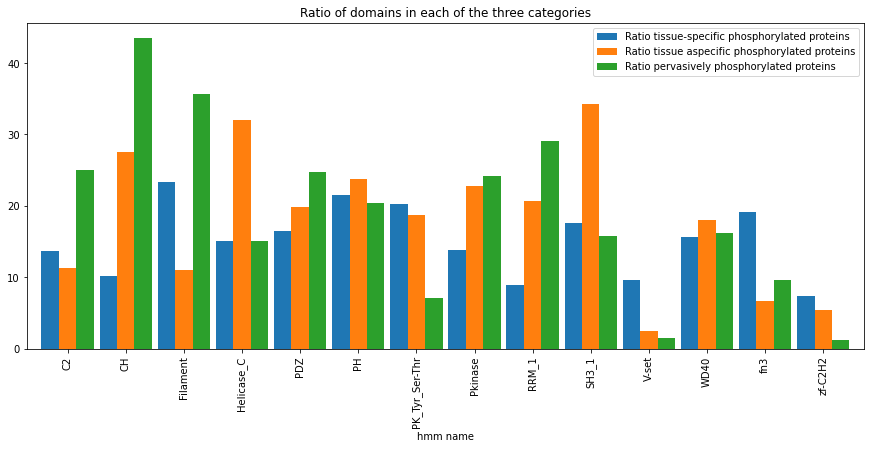

In [192]:
df_gr_hmm_all[(((df_gr_hmm_all["Number of tissue-specific phosphorylated proteins"]>=25))|
              ((df_gr_hmm_all["Number of tissue aspecific phosphorylated proteins"]>=25))|
               ((df_gr_hmm_all["Number of pervasively phosphorylated proteins"]>=25)))][["hmm name",
   "Ratio tissue-specific phosphorylated proteins", "Ratio tissue aspecific phosphorylated proteins",
    "Ratio pervasively phosphorylated proteins"]].plot(kind="bar", x="hmm name", figsize=(15,6), width=0.9, title="Ratio of domains in each of the three categories")

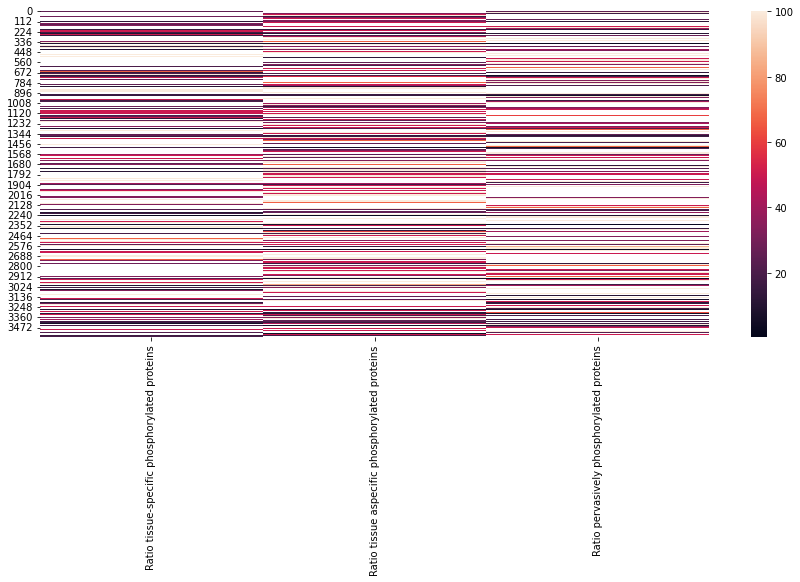

In [193]:
plt.figure(figsize=(15,6))
sns.heatmap(df_gr_hmm_all[["Ratio tissue-specific phosphorylated proteins", "Ratio tissue aspecific phosphorylated proteins",
    "Ratio pervasively phosphorylated proteins"]])
plt.show()